In [1]:
import numpy as np 
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import keras
from keras import layers,models,regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import math

2025-04-02 09:34:25.250096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import sys
import os

module_path = "/Users/bastienduboeuf/Documents/Recherche/MLForFlatDirections3D/MLFlatDirections"
sys.path.append(module_path)

import potentials as pot
import utils

In [4]:
import importlib
importlib.reload(utils)
#importlib.reload(pot)

<module 'utils' from '/Users/bastienduboeuf/Documents/Recherche/MLForFlatDirections3D/MLFlatDirections/utils.py'>

In [3]:
#np.save('Points_19_12_24',x_4d.numpy())
x_5d = np.load('Points_10_01_25.npy')
#x_5d = tf.Variable(x_5d)
#np.save('Points_10_01_25',x_5d.numpy())

In [5]:
# compute (||∇V||^2)
def grad_norm_squared(V, x ,factor=1):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    norm_squared = tf.reduce_sum(gradients**2, axis=1)  # ||∇V||^2 at each point
    return norm_squared * factor

def get_grad(V, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss = V(x)  # compute V at each point
    gradients = tape.gradient(loss, x)  # compute ∇V at each point
    return gradients

In [6]:
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
############################################## Gradient Descent ########################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

In [8]:
# randomly initialize the points

n_points = 100000
x_5d = tf.Variable(4*np.random.rand(n_points, 5)-2, dtype=tf.float32)

history_5d = []

#x_5d = tf.Variable(x_5d)

In [9]:
# Oprimizer for the gradient descent

init_alpha=10**(-2)
alpha = init_alpha

optimizer = tf.optimizers.Adam(learning_rate=alpha)

# Learning loop 
loss_prev_step=10**8

#update_alpha = False
update_opt = True
for step in range(1500):  
    with tf.GradientTape() as tape:
        loss = tf.reduce_sum(grad_norm_squared(pot.V5d_sugra_1_2_4_8_10, x_5d)) # minimize ||∇V||^2 for all points
    
    # Compute ||∇V||^2 with respect to x
    gradients = tape.gradient(loss, [x_5d])

    #if update_alpha and step % 300 == 0 and step != 0:
    #    alpha = alpha/2
    #    optimizer = tf.optimizers.Adam(learning_rate=alpha)
    if update_opt and step % 200 == 0 :
        print("Reinitializing the optimizer")
        optimizer = tf.optimizers.Adam(learning_rate=init_alpha)
    
    if step == 1300:
        update_opt = False 
        #optimizer.learning_rate.assign(0.01)
    
    # Apply gradient descent for all points
    optimizer.apply_gradients(zip(gradients, [x_5d]))
    
    history_5d.append(loss)
    
    if step % 10 == 0:
        print(f"""Step {step}: ||∇V||^2 = {loss.numpy()} with learning rate {optimizer.get_config()["learning_rate"]}""")
        
    if np.log(loss.numpy())/np.log(10)<-10: 
        print("Converged enough") 
        print(f"Step {step}: ||∇V||^2 = {loss.numpy()}")
        break

Reinitializing the optimizer
Step 0: ||∇V||^2 = 88239702016.0 with learning rate 0.009999999776482582
Step 10: ||∇V||^2 = 31185264640.0 with learning rate 0.009999999776482582
Step 20: ||∇V||^2 = 13544867840.0 with learning rate 0.009999999776482582
Step 30: ||∇V||^2 = 7488671744.0 with learning rate 0.009999999776482582
Step 40: ||∇V||^2 = 4965703680.0 with learning rate 0.009999999776482582
Step 50: ||∇V||^2 = 3696384000.0 with learning rate 0.009999999776482582
Step 60: ||∇V||^2 = 2947918848.0 with learning rate 0.009999999776482582
Step 70: ||∇V||^2 = 2449466880.0 with learning rate 0.009999999776482582
Step 80: ||∇V||^2 = 2087930880.0 with learning rate 0.009999999776482582
Step 90: ||∇V||^2 = 1810499072.0 with learning rate 0.009999999776482582
Step 100: ||∇V||^2 = 1589641216.0 with learning rate 0.009999999776482582
Step 110: ||∇V||^2 = 1409420288.0 with learning rate 0.009999999776482582
Step 120: ||∇V||^2 = 1259733888.0 with learning rate 0.009999999776482582
Step 130: ||∇V||^

Step 1060: ||∇V||^2 = 217.84542846679688 with learning rate 0.009999999776482582
Step 1070: ||∇V||^2 = 77.40170288085938 with learning rate 0.009999999776482582
Step 1080: ||∇V||^2 = 35.008949279785156 with learning rate 0.009999999776482582
Step 1090: ||∇V||^2 = 13.104792594909668 with learning rate 0.009999999776482582
Step 1100: ||∇V||^2 = 1.9679155349731445 with learning rate 0.009999999776482582
Step 1110: ||∇V||^2 = 1.4097692966461182 with learning rate 0.009999999776482582
Step 1120: ||∇V||^2 = 0.5239764451980591 with learning rate 0.009999999776482582
Step 1130: ||∇V||^2 = 0.14907023310661316 with learning rate 0.009999999776482582
Step 1140: ||∇V||^2 = 0.07613423466682434 with learning rate 0.009999999776482582
Step 1150: ||∇V||^2 = 0.07905857264995575 with learning rate 0.009999999776482582
Step 1160: ||∇V||^2 = 0.08045436441898346 with learning rate 0.009999999776482582
Step 1170: ||∇V||^2 = 0.05019356310367584 with learning rate 0.009999999776482582
Step 1180: ||∇V||^2 = 0.

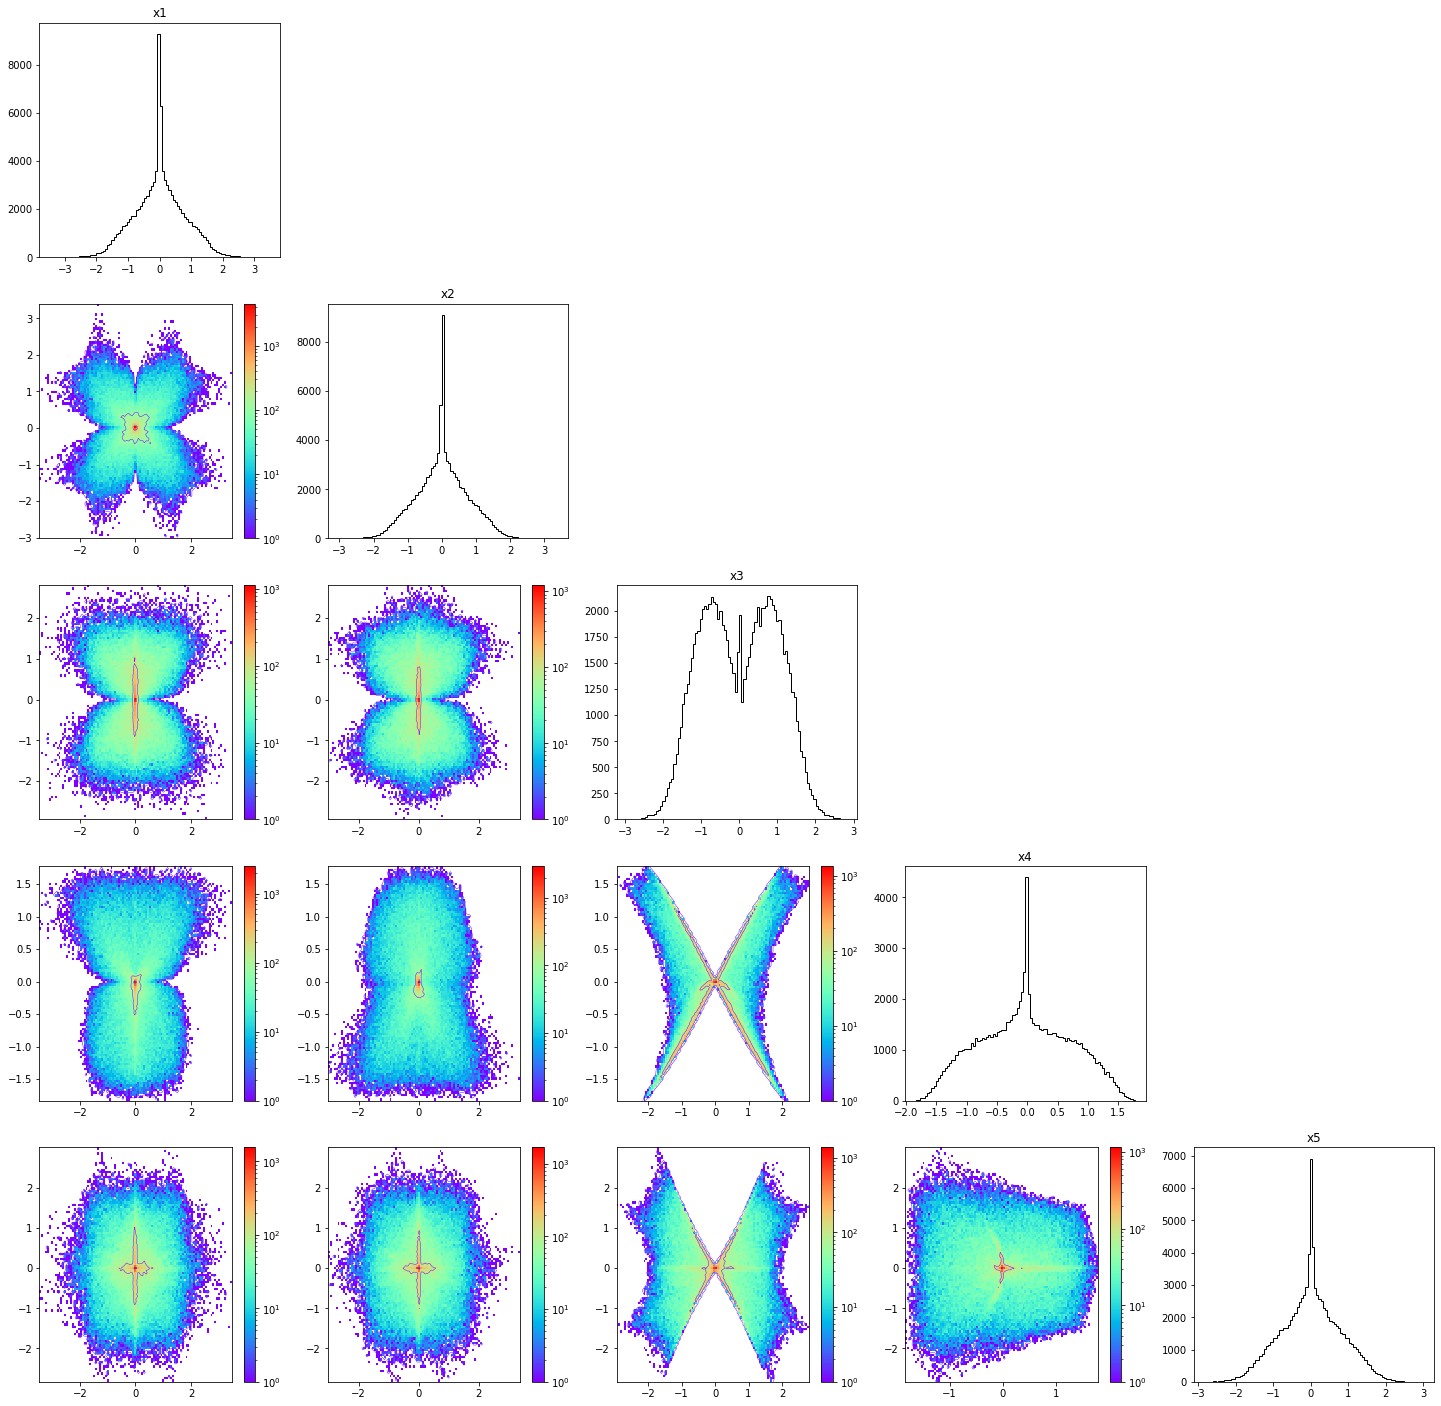

In [10]:
utils.triangular_plot(x_5d.numpy())
#utils.triangular_plot(x_5d)

In [11]:
np.save('Points_02_04_25_m2p2init.npy',x_5d.numpy())

In [12]:
val_points_5d = pot.V5d_sugra_1_2_4_8_10(x_5d)
print("Average error in % : ",100*np.sum(abs(val_points_5d+4)/x_5d.shape[0]))
#Quite big error, let's get it better

Average error in % :  0.0001675414978308254


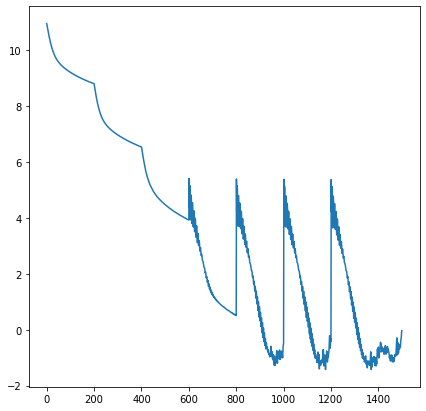

In [14]:
plt.figure(figsize=(7,7))
plt.plot(np.log(history_5d)/np.log(10))
plt.show()

In [15]:
for i in range(10):
    print(np.sum(np.sum(get_grad(pot.V5d_sugra_1_2_4_8_10,x_5d)**2,axis=1)**.5<10**-i),10**(-i))

100000 1
99990 0.1
99882 0.01
99557 0.001
99077 0.0001
85194 1e-05
21975 1e-06
579 1e-07
72 1e-08
30 1e-09


In [16]:
for i in range(10):
    print(np.sum(abs(pot.V5d_sugra_1_2_4_8_10(x_5d)+4)<10**-i))

100000
100000
100000
100000
99995
97811
66499
23562
23562
23562


In [16]:
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
############################################# Auto encoder analysis ########################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

In [11]:
set_train, set_test = train_test_split(x_5d.numpy(), test_size=0.1, random_state=1)


In [44]:
all_ae = []
history_all = []

for i in range(1,5):
    
    this_latent_dim = i + 1
    input_dim = 5
    
    print(this_latent_dim)

    inputs = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(256, activation='sigmoid')(inputs)
    encoded = layers.Dense(256, activation='sigmoid')(encoded)
    encoded = layers.Dense(this_latent_dim)(encoded)  

    decoded = layers.Dense(256, activation='sigmoid')(encoded)
    decoded = layers.Dense(256, activation='sigmoid')(decoded)
    decoded = layers.Dense(input_dim)(decoded)  

    this_autoencoder = keras.Model(inputs, decoded)
    this_autoencoder.compile(optimizer='adam', loss='mse')
    
    history_all.append(this_autoencoder.fit(set_train, set_train, epochs=2000, batch_size=10000, shuffle=True, validation_data=(set_test,set_test)))
    all_ae.append(this_autoencoder)
    

2
Epoch 1/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.5191 - val_loss: 0.2271
Epoch 2/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1891 - val_loss: 0.1844
Epoch 3/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.1642 - val_loss: 0.1633
Epoch 4/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1540 - val_loss: 0.1527
Epoch 5/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1482 - val_loss: 0.1471
Epoch 6/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.1455 - val_loss: 0.1451
Epoch 7/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1445 - val_loss: 0.1441
Epoch 8/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.1440 - val_loss: 0.1439
Epoch 9/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.1438 - val_loss: 0.1440
Epoch 10/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.1442 - val_loss: 0.1438
Epoch 11/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.1436 - val_loss: 0.1437
Epoch 12/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0754 - val_loss: 0.0752
Epoch 70/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0754 - val_loss: 0.0753
Epoch 71/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0753 - val_loss: 0.0750
Epoch 72/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0749 - val_loss: 0.0749
Epoch 73/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0755 - val_loss: 0.0749
Epoch 74/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0751 - val_loss: 0.0747
Epoch 75/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0748 - val_loss: 0.0742
Epoch 76/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0744 - val_loss: 0.0740
Epoch 77/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0741 - val_loss: 0.0733
Epoch 78/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0733 - val_loss: 0.0728
Epoch 79/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0729 - val_loss: 0.0719
Epoch 80/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0719

Epoch 137/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0399 - val_loss: 0.0395
Epoch 138/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0400 - val_loss: 0.0395
Epoch 139/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0397 - val_loss: 0.0394
Epoch 140/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0395 - val_loss: 0.0395
Epoch 141/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0398 - val_loss: 0.0393
Epoch 142/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0396 - val_loss: 0.0392
Epoch 143/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0397 - val_loss: 0.0392
Epoch 144/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0396 - val_loss: 0.0391
Epoch 145/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0395 - val_loss: 0.0392
Epoch 146/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0395 - val_loss: 0.0390
Epoch 147/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0392 - val_loss: 0.0388
Epoch 148/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 272/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0257 - val_loss: 0.0255
Epoch 273/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0258 - val_loss: 0.0253
Epoch 274/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0259 - val_loss: 0.0257
Epoch 275/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0258 - val_loss: 0.0252
Epoch 276/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0255 - val_loss: 0.0251
Epoch 277/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0254 - val_loss: 0.0250
Epoch 278/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0254 - val_loss: 0.0250
Epoch 279/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0254 - val_loss: 0.0249
Epoch 280/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0252 - val_loss: 0.0250
Epoch 281/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0252 - val_loss: 0.0250
Epoch 282/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - l

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0202 - val_loss: 0.0201
Epoch 406/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0200 - val_loss: 0.0193
Epoch 407/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0198 - val_loss: 0.0195
Epoch 408/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 409/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0197 - val_loss: 0.0193
Epoch 410/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 411/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0197 - val_loss: 0.0191
Epoch 412/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 413/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0194 - val_loss: 0.0190
Epoch 414/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0194 - val_loss: 0.0190
Epoch 415/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.0194 - val_loss: 0.0191
Epoch 416/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - lo

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0162 - val_loss: 0.0160
Epoch 540/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0163 - val_loss: 0.0159
Epoch 541/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0161 - val_loss: 0.0161
Epoch 542/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0161 - val_loss: 0.0160
Epoch 543/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0160 - val_loss: 0.0158
Epoch 544/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 545/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0161 - val_loss: 0.0159
Epoch 546/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0159 - val_loss: 0.0160
Epoch 547/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0159 - val_loss: 0.0157
Epoch 548/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0159 - val_loss: 0.0158
Epoch 549/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0160 - val_loss: 0.0158
Epoch 550/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0138 - val_loss: 0.0138
Epoch 674/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 675/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 676/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 677/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 678/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 679/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0138 - val_loss: 0.0140
Epoch 680/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 681/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 682/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 683/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 684/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - los

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0124 - val_loss: 0.0121
Epoch 808/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 809/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 810/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 811/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0122 - val_loss: 0.0123
Epoch 812/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 813/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 814/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 815/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 816/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 817/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 818/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 942/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 943/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 944/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 945/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 946/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 947/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 948/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 949/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0109 - val_loss: 0.0111
Epoch 950/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 951/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 952/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step -

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 1076/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 1077/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0100 - val_loss: 0.0102
Epoch 1078/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 1079/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 1080/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 1081/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 1082/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.0099 - val_loss: 0.0099
Epoch 1083/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 1084/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 1085/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0098 - val_loss: 0.0098
Epoch 1086/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 1210/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 1211/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 1212/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 1213/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 1214/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0093 - val_loss: 0.0095
Epoch 1215/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 1216/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 1217/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 1218/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 1219/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 1220/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 1277/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 1278/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 1279/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 1280/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 1281/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 1282/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 1283/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 1284/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 1285/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 1286/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 1287/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 1411/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 1412/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 1413/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0086 - val_loss: 0.0088
Epoch 1414/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0086 - val_loss: 0.0088
Epoch 1415/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 1416/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 1417/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 1418/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 1419/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 1420/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 1421/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 1545/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 1546/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 1547/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 1548/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 1549/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 1550/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 1551/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 1552/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 1553/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 1554/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 1555/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1679/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0079 - val_loss: 0.0081
Epoch 1680/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 1681/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1682/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1683/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1684/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1685/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 1686/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1687/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 1688/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0079 - val_loss: 0.0085
Epoch 1689/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 1813/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 1814/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0077 - val_loss: 0.0080
Epoch 1815/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 1816/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0077 - val_loss: 0.0079
Epoch 1817/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 1818/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 1819/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 1820/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 1821/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 1822/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 1823/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82m

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 1947/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 1948/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 1949/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1950/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1951/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 1952/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 1953/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 1954/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1955/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 1956/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 1957/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0481 - val_loss: 0.0488
Epoch 82/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0482 - val_loss: 0.0491
Epoch 83/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0482 - val_loss: 0.0490
Epoch 84/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0482 - val_loss: 0.0489
Epoch 85/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0478 - val_loss: 0.0486
Epoch 86/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0477 - val_loss: 0.0486
Epoch 87/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0479 - val_loss: 0.0483
Epoch 88/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0478 - val_loss: 0.0481
Epoch 89/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0473 - val_loss: 0.0478
Epoch 90/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0471 - val_loss: 0.0485
Epoch 91/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0473 - val_loss: 0.0477
Epoch 92/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0474 

Epoch 149/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 150/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 151/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 152/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 153/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 154/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 155/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 156/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 157/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 158/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 159/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 160/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 284/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 285/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 286/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 287/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 288/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 289/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 290/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 291/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 292/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 293/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 294/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - los

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 418/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 419/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 420/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 421/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 422/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 423/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 424/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 425/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 426/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 427/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 428/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/s

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0010 - val_loss: 9.9944e-04
Epoch 485/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0010 - val_loss: 9.9569e-04
Epoch 486/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0011 - val_loss: 9.8360e-04
Epoch 487/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 9.8289e-04 - val_loss: 0.0011
Epoch 488/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 489/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0011 - val_loss: 9.3544e-04
Epoch 490/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 491/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 492/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0010 - val_loss: 9.9960e-04
Epoch 493/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 9.8165e-04 - val_loss: 0.0010
Epoch 494/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 495/2000
9/9 ━━━━━━━

Epoch 550/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 9.5411e-04 - val_loss: 8.7875e-04
Epoch 551/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 8.9490e-04 - val_loss: 8.5652e-04
Epoch 552/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 8.6800e-04 - val_loss: 9.6380e-04
Epoch 553/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 9.9394e-04 - val_loss: 9.7222e-04
Epoch 554/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0010 - val_loss: 9.3312e-04
Epoch 555/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 9.1179e-04 - val_loss: 8.3328e-04
Epoch 556/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 8.6286e-04 - val_loss: 8.5011e-04
Epoch 557/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 8.8243e-04 - val_loss: 8.4328e-04
Epoch 558/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 9.3674e-04 - val_loss: 0.0020
Epoch 559/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0022 - val_loss: 8.2315e-04
Epoch 560/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 8.2020e-04 - val_loss: 8.8907e-04
Epoch 679/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 9.1520e-04 - val_loss: 7.0440e-04
Epoch 680/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 7.7313e-04 - val_loss: 9.4225e-04
Epoch 681/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 8.5019e-04 - val_loss: 6.9268e-04
Epoch 682/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 7.4470e-04 - val_loss: 6.2942e-04
Epoch 683/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 6.6056e-04 - val_loss: 7.8539e-04
Epoch 684/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 9.2879e-04 - val_loss: 8.7352e-04
Epoch 685/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.5514e-04 - val_loss: 7.2883e-04
Epoch 686/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 7.5193e-04 - val_loss: 7.8516e-04
Epoch 687/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 7.9105e-04 - val_loss: 8.3219e-04
Epoch 688/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 9.2

Epoch 805/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 5.7904e-04 - val_loss: 7.6798e-04
Epoch 806/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 807/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 8.3385e-04 - val_loss: 7.7902e-04
Epoch 808/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 7.1530e-04 - val_loss: 6.6549e-04
Epoch 809/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 6.4783e-04 - val_loss: 5.7283e-04
Epoch 810/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 6.0634e-04 - val_loss: 6.3404e-04
Epoch 811/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 6.3120e-04 - val_loss: 6.2578e-04
Epoch 812/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 7.3118e-04 - val_loss: 8.6946e-04
Epoch 813/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 8.2794e-04 - val_loss: 5.9301e-04
Epoch 814/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6.5751e-04 - val_loss: 6.7388e-04
Epoch 815/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/ste

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.8837e-04 - val_loss: 9.7515e-04
Epoch 932/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0011 - val_loss: 6.9427e-04
Epoch 933/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.9716e-04 - val_loss: 7.8438e-04
Epoch 934/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6.6985e-04 - val_loss: 5.9150e-04
Epoch 935/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.6600e-04 - val_loss: 5.1442e-04
Epoch 936/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 5.6334e-04 - val_loss: 8.1661e-04
Epoch 937/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 7.8450e-04 - val_loss: 5.0191e-04
Epoch 938/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 6.1051e-04 - val_loss: 6.9443e-04
Epoch 939/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 6.3812e-04 - val_loss: 7.9894e-04
Epoch 940/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.5838e-04 - val_loss: 4.9760e-04
Epoch 941/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.2450e-

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.2536e-04 - val_loss: 4.3748e-04
Epoch 1058/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.5705e-04 - val_loss: 6.1657e-04
Epoch 1059/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.8847e-04 - val_loss: 5.1209e-04
Epoch 1060/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.8494e-04 - val_loss: 8.1311e-04
Epoch 1061/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.2113e-04 - val_loss: 4.6933e-04
Epoch 1062/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 5.4711e-04 - val_loss: 9.3282e-04
Epoch 1063/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0010 - val_loss: 8.0464e-04
Epoch 1064/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 7.7686e-04 - val_loss: 4.7257e-04
Epoch 1065/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 5.2975e-04 - val_loss: 5.0674e-04
Epoch 1066/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 4.9974e-04 - val_loss: 4.7688e-04
Epoch 1067/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 6.3928e-04 - val_loss: 5.2824e-04
Epoch 1184/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.6234e-04 - val_loss: 4.1792e-04
Epoch 1185/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 4.4908e-04 - val_loss: 4.3345e-04
Epoch 1186/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 4.9301e-04 - val_loss: 4.7593e-04
Epoch 1187/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 4.7928e-04 - val_loss: 4.0345e-04
Epoch 1188/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 4.1508e-04 - val_loss: 4.1463e-04
Epoch 1189/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 4.7490e-04 - val_loss: 6.3915e-04
Epoch 1190/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 6.6667e-04 - val_loss: 8.6493e-04
Epoch 1191/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 8.5699e-04 - val_loss: 5.0694e-04
Epoch 1192/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 5.2136e-04 - val_loss: 4.5310e-04
Epoch 1193/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 6.8715e-04 - val_loss: 4.2941e-04
Epoch 1310/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.0806e-04 - val_loss: 4.9221e-04
Epoch 1311/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 4.8570e-04 - val_loss: 6.0767e-04
Epoch 1312/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 5.4614e-04 - val_loss: 4.3848e-04
Epoch 1313/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 4.4726e-04 - val_loss: 4.9364e-04
Epoch 1314/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 6.1657e-04 - val_loss: 8.9478e-04
Epoch 1315/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 7.6872e-04 - val_loss: 3.9683e-04
Epoch 1316/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 4.7466e-04 - val_loss: 3.9053e-04
Epoch 1317/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.1437e-04 - val_loss: 4.1273e-04
Epoch 1318/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 4.7954e-04 - val_loss: 5.7527e-04
Epoch 1319/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step -

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 5.7841e-04 - val_loss: 5.1346e-04
Epoch 1436/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 4.6293e-04 - val_loss: 4.2512e-04
Epoch 1437/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 3.9205e-04 - val_loss: 3.3884e-04
Epoch 1438/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 3.8782e-04 - val_loss: 3.2146e-04
Epoch 1439/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 3.6957e-04 - val_loss: 4.6982e-04
Epoch 1440/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 4.6721e-04 - val_loss: 4.0541e-04
Epoch 1441/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 4.1222e-04 - val_loss: 3.3554e-04
Epoch 1442/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 3.9884e-04 - val_loss: 5.9555e-04
Epoch 1443/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.9102e-04 - val_loss: 3.8888e-04
Epoch 1444/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 4.1011e-04 - val_loss: 5.2886e-04
Epoch 1445/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 3.4726e-04 - val_loss: 3.2748e-04
Epoch 1499/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.1364e-04 - val_loss: 5.5763e-04
Epoch 1500/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 6.4233e-04 - val_loss: 4.3289e-04
Epoch 1501/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.0701e-04 - val_loss: 4.1385e-04
Epoch 1502/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 4.1335e-04 - val_loss: 5.0804e-04
Epoch 1503/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.4136e-04 - val_loss: 4.1022e-04
Epoch 1504/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 4.1588e-04 - val_loss: 3.5180e-04
Epoch 1505/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 4.2498e-04 - val_loss: 3.2507e-04
Epoch 1506/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 3.7568e-04 - val_loss: 4.3733e-04
Epoch 1507/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 4.4410e-04 - val_loss: 2.9249e-04
Epoch 1508/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step -

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 3.0275e-04 - val_loss: 2.9201e-04
Epoch 1625/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 3.5966e-04 - val_loss: 6.1630e-04
Epoch 1626/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 7.2285e-04 - val_loss: 4.0744e-04
Epoch 1627/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 4.1325e-04 - val_loss: 3.1305e-04
Epoch 1628/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 3.1478e-04 - val_loss: 2.8769e-04
Epoch 1629/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 3.0871e-04 - val_loss: 3.0046e-04
Epoch 1630/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 3.6719e-04 - val_loss: 4.2186e-04
Epoch 1631/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 4.6680e-04 - val_loss: 4.7087e-04
Epoch 1632/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 4.8825e-04 - val_loss: 4.1645e-04
Epoch 1633/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 4.3774e-04 - val_loss: 5.2454e-04
Epoch 1634/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 4.4849e-04 - val_loss: 4.0078e-04
Epoch 1751/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 4.2089e-04 - val_loss: 3.3499e-04
Epoch 1752/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 3.3487e-04 - val_loss: 4.9120e-04
Epoch 1753/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 4.8884e-04 - val_loss: 4.2672e-04
Epoch 1754/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 4.6842e-04 - val_loss: 4.4763e-04
Epoch 1755/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 3.8526e-04 - val_loss: 3.1190e-04
Epoch 1756/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 3.4058e-04 - val_loss: 2.5723e-04
Epoch 1757/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 2.8203e-04 - val_loss: 2.9058e-04
Epoch 1758/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 2.9317e-04 - val_loss: 2.6655e-04
Epoch 1759/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 3.2601e-04 - val_loss: 5.1284e-04
Epoch 1760/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 2.9095e-04 - val_loss: 4.3314e-04
Epoch 1877/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 5.7742e-04 - val_loss: 6.8415e-04
Epoch 1878/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 5.9002e-04 - val_loss: 3.2417e-04
Epoch 1879/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 3.4755e-04 - val_loss: 2.6679e-04
Epoch 1880/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 3.3689e-04 - val_loss: 3.4167e-04
Epoch 1881/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 3.3624e-04 - val_loss: 2.6254e-04
Epoch 1882/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 2.7105e-04 - val_loss: 2.2940e-04
Epoch 1883/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 2.5803e-04 - val_loss: 2.8597e-04
Epoch 1884/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 3.1910e-04 - val_loss: 3.8091e-04
Epoch 1885/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.3901e-04 - val_loss: 5.5355e-04
Epoch 1886/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 3.1532e-04 - val_loss: 2.9788e-04
Epoch 1940/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 2.9032e-04 - val_loss: 2.4734e-04
Epoch 1941/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 3.0645e-04 - val_loss: 2.7288e-04
Epoch 1942/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 3.1768e-04 - val_loss: 3.9704e-04
Epoch 1943/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 3.9684e-04 - val_loss: 2.2989e-04
Epoch 1944/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 2.9265e-04 - val_loss: 2.5005e-04
Epoch 1945/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 3.0649e-04 - val_loss: 3.3072e-04
Epoch 1946/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 4.0097e-04 - val_loss: 5.5358e-04
Epoch 1947/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.7279e-04 - val_loss: 3.0950e-04
Epoch 1948/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 3.0590e-04 - val_loss: 3.0757e-04
Epoch 1949/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0250 - val_loss: 0.0253
Epoch 71/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0248 - val_loss: 0.0253
Epoch 72/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0248 - val_loss: 0.0253
Epoch 73/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0249 - val_loss: 0.0252
Epoch 74/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0247 - val_loss: 0.0252
Epoch 75/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0246 - val_loss: 0.0251
Epoch 76/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0245 - val_loss: 0.0251
Epoch 77/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0245 - val_loss: 0.0251
Epoch 78/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0246 - val_loss: 0.0250
Epoch 79/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0246 - val_loss: 0.0249
Epoch 80/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0244 - val_loss: 0.0249
Epoch 81/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0245 -

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 139/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 140/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 141/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 142/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 143/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 144/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 145/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 146/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 147/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 148/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 149/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - los

Epoch 272/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 9.3797e-04 - val_loss: 9.2216e-04
Epoch 273/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 9.5200e-04 - val_loss: 8.7784e-04
Epoch 274/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 8.8675e-04 - val_loss: 9.7205e-04
Epoch 275/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 8.7395e-04 - val_loss: 7.9517e-04
Epoch 276/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 7.9877e-04 - val_loss: 0.0010
Epoch 277/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 278/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0010 - val_loss: 9.9150e-04
Epoch 279/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 8.8652e-04 - val_loss: 8.5297e-04
Epoch 280/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 8.1298e-04 - val_loss: 8.4886e-04
Epoch 281/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 8.3146e-04 - val_loss: 8.4398e-04
Epoch 282/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 8.391

Epoch 336/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0013 - val_loss: 6.4977e-04
Epoch 337/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 7.2966e-04 - val_loss: 6.8434e-04
Epoch 338/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 6.2343e-04 - val_loss: 6.0919e-04
Epoch 339/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 6.0294e-04 - val_loss: 5.9627e-04
Epoch 340/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 5.9888e-04 - val_loss: 7.0745e-04
Epoch 341/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 6.4179e-04 - val_loss: 5.8697e-04
Epoch 342/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.6658e-04 - val_loss: 6.0903e-04
Epoch 343/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 6.5854e-04 - val_loss: 8.3246e-04
Epoch 344/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 7.6723e-04 - val_loss: 6.8078e-04
Epoch 345/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 7.0769e-04 - val_loss: 6.2201e-04
Epoch 346/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/ste

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 4.9723e-04 - val_loss: 3.7721e-04
Epoch 463/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 4.1121e-04 - val_loss: 4.8375e-04
Epoch 464/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 5.3646e-04 - val_loss: 5.2669e-04
Epoch 465/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 5.3608e-04 - val_loss: 6.3055e-04
Epoch 466/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.9561e-04 - val_loss: 4.8236e-04
Epoch 467/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 5.3484e-04 - val_loss: 4.9716e-04
Epoch 468/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 5.6336e-04 - val_loss: 8.6925e-04
Epoch 469/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 7.1517e-04 - val_loss: 4.2298e-04
Epoch 470/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 4.4411e-04 - val_loss: 6.0979e-04
Epoch 471/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 5.5565e-04 - val_loss: 3.7856e-04
Epoch 472/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 3.96

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 4.1810e-04 - val_loss: 5.0483e-04
Epoch 589/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 5.4068e-04 - val_loss: 4.4247e-04
Epoch 590/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 4.5988e-04 - val_loss: 4.0326e-04
Epoch 591/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 3.4382e-04 - val_loss: 2.6747e-04
Epoch 592/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 2.8212e-04 - val_loss: 2.5741e-04
Epoch 593/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 2.7636e-04 - val_loss: 2.7061e-04
Epoch 594/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 2.9796e-04 - val_loss: 2.6877e-04
Epoch 595/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 2.6570e-04 - val_loss: 2.9851e-04
Epoch 596/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 3.7452e-04 - val_loss: 8.2037e-04
Epoch 597/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0011 - val_loss: 3.1836e-04
Epoch 598/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - los

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 2.9313e-04 - val_loss: 2.8765e-04
Epoch 715/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 2.9069e-04 - val_loss: 2.9719e-04
Epoch 716/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 3.2228e-04 - val_loss: 4.2535e-04
Epoch 717/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 4.7133e-04 - val_loss: 4.5048e-04
Epoch 718/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.9736e-04 - val_loss: 5.7881e-04
Epoch 719/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 4.3141e-04 - val_loss: 3.1704e-04
Epoch 720/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 3.1498e-04 - val_loss: 2.4425e-04
Epoch 721/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 2.4069e-04 - val_loss: 2.1527e-04
Epoch 722/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 2.2791e-04 - val_loss: 2.3177e-04
Epoch 723/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 2.3672e-04 - val_loss: 2.3408e-04
Epoch 724/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - l

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 5.1377e-04 - val_loss: 3.0260e-04
Epoch 841/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 3.1584e-04 - val_loss: 1.8881e-04
Epoch 842/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 1.8797e-04 - val_loss: 1.8757e-04
Epoch 843/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 2.2712e-04 - val_loss: 2.1456e-04
Epoch 844/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 2.0603e-04 - val_loss: 2.3015e-04
Epoch 845/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.3773e-04 - val_loss: 1.5927e-04
Epoch 846/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 1.7865e-04 - val_loss: 2.2280e-04
Epoch 847/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.9322e-04 - val_loss: 7.5427e-04
Epoch 848/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0010 - val_loss: 3.0329e-04
Epoch 849/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 4.0001e-04 - val_loss: 2.0171e-04
Epoch 850/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 2.893

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.5646e-04 - val_loss: 1.5278e-04
Epoch 967/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.7151e-04 - val_loss: 1.6887e-04
Epoch 968/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 2.0359e-04 - val_loss: 3.9700e-04
Epoch 969/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 4.9961e-04 - val_loss: 1.8825e-04
Epoch 970/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 2.0001e-04 - val_loss: 2.0343e-04
Epoch 971/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.6261e-04 - val_loss: 5.8885e-04
Epoch 972/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 6.8551e-04 - val_loss: 2.6943e-04
Epoch 973/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 2.2641e-04 - val_loss: 2.7018e-04
Epoch 974/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 2.1572e-04 - val_loss: 2.3049e-04
Epoch 975/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.3489e-04 - val_loss: 2.3189e-04
Epoch 976/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - los

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.4127e-04 - val_loss: 1.4834e-04
Epoch 1093/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 1.4059e-04 - val_loss: 1.6383e-04
Epoch 1094/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.9760e-04 - val_loss: 3.1089e-04
Epoch 1095/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 3.6841e-04 - val_loss: 2.5672e-04
Epoch 1096/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 2.4637e-04 - val_loss: 1.9224e-04
Epoch 1097/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 1.6686e-04 - val_loss: 2.0005e-04
Epoch 1098/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.8825e-04 - val_loss: 1.2081e-04
Epoch 1099/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.6083e-04 - val_loss: 1.4030e-04
Epoch 1100/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.4515e-04 - val_loss: 1.4248e-04
Epoch 1101/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 1.5859e-04 - val_loss: 1.6889e-04
Epoch 1102/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 1.4557e-04 - val_loss: 1.1828e-04
Epoch 1156/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.3312e-04 - val_loss: 1.0961e-04
Epoch 1157/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.3408e-04 - val_loss: 1.7899e-04
Epoch 1158/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.0782e-04 - val_loss: 2.2636e-04
Epoch 1159/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.3294e-04 - val_loss: 2.4350e-04
Epoch 1160/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.3285e-04 - val_loss: 1.3605e-04
Epoch 1161/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.7416e-04 - val_loss: 1.6827e-04
Epoch 1162/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.5371e-04 - val_loss: 1.3746e-04
Epoch 1163/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.3709e-04 - val_loss: 1.1072e-04
Epoch 1164/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.3276e-04 - val_loss: 2.3790e-04
Epoch 1165/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.0164e-04 - val_loss: 1.1656e-04
Epoch 1219/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.3309e-04 - val_loss: 1.4760e-04
Epoch 1220/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 2.0243e-04 - val_loss: 4.8472e-04
Epoch 1221/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6.6690e-04 - val_loss: 5.9366e-04
Epoch 1222/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 4.1535e-04 - val_loss: 2.4164e-04
Epoch 1223/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 2.0371e-04 - val_loss: 1.6218e-04
Epoch 1224/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 1.5028e-04 - val_loss: 1.1467e-04
Epoch 1225/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.2057e-04 - val_loss: 9.2392e-05
Epoch 1226/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.0126e-04 - val_loss: 1.2212e-04
Epoch 1227/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.2837e-04 - val_loss: 1.0710e-04
Epoch 1228/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step -

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.2543e-04 - val_loss: 1.0220e-04
Epoch 1345/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.0988e-04 - val_loss: 9.4919e-05
Epoch 1346/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 1.2082e-04 - val_loss: 1.6709e-04
Epoch 1347/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 1.6623e-04 - val_loss: 1.8287e-04
Epoch 1348/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 2.0761e-04 - val_loss: 1.9838e-04
Epoch 1349/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.9664e-04 - val_loss: 2.3725e-04
Epoch 1350/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 3.1415e-04 - val_loss: 5.0736e-04
Epoch 1351/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 4.4295e-04 - val_loss: 1.6061e-04
Epoch 1352/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.7842e-04 - val_loss: 1.3074e-04
Epoch 1353/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.3463e-04 - val_loss: 9.0610e-05
Epoch 1354/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 9.7750e-05 - val_loss: 7.6100e-05
Epoch 1408/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 9.7684e-05 - val_loss: 1.2844e-04
Epoch 1409/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 1.3173e-04 - val_loss: 1.5551e-04
Epoch 1410/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 1.5832e-04 - val_loss: 1.2792e-04
Epoch 1411/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 1.2346e-04 - val_loss: 8.7975e-05
Epoch 1412/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 9.0568e-05 - val_loss: 1.3879e-04
Epoch 1413/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.7549e-04 - val_loss: 3.3508e-04
Epoch 1414/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 4.4660e-04 - val_loss: 3.8391e-04
Epoch 1415/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 2.8128e-04 - val_loss: 2.6661e-04
Epoch 1416/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.9502e-04 - val_loss: 1.9858e-04
Epoch 1417/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.4621e-04 - val_loss: 3.3419e-04
Epoch 1471/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 3.8299e-04 - val_loss: 3.6700e-04
Epoch 1472/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 3.5555e-04 - val_loss: 9.0078e-05
Epoch 1473/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 1.0886e-04 - val_loss: 9.1984e-05
Epoch 1474/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 9.1348e-05 - val_loss: 8.0430e-05
Epoch 1475/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 8.2660e-05 - val_loss: 7.1217e-05
Epoch 1476/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 7.5799e-05 - val_loss: 7.2824e-05
Epoch 1477/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 8.5840e-05 - val_loss: 1.4086e-04
Epoch 1478/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 2.1015e-04 - val_loss: 4.2741e-04
Epoch 1479/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 3.8309e-04 - val_loss: 1.2008e-04
Epoch 1480/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 2.2942e-04 - val_loss: 1.4996e-04
Epoch 1534/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.2287e-04 - val_loss: 8.0552e-05
Epoch 1535/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 8.8650e-05 - val_loss: 6.5849e-05
Epoch 1536/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 7.9552e-05 - val_loss: 1.6991e-04
Epoch 1537/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 1.8550e-04 - val_loss: 1.1744e-04
Epoch 1538/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 1.4209e-04 - val_loss: 3.7994e-04
Epoch 1539/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 3.5140e-04 - val_loss: 1.5503e-04
Epoch 1540/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 1.4658e-04 - val_loss: 1.4333e-04
Epoch 1541/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.2624e-04 - val_loss: 8.7383e-05
Epoch 1542/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 1.0183e-04 - val_loss: 1.2092e-04
Epoch 1543/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step 

Epoch 1596/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 8.3581e-05 - val_loss: 7.4636e-05
Epoch 1597/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 7.0108e-05 - val_loss: 8.3548e-05
Epoch 1598/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 9.3251e-05 - val_loss: 8.4288e-05
Epoch 1599/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 8.8112e-05 - val_loss: 7.1108e-05
Epoch 1600/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 7.2523e-05 - val_loss: 7.1136e-05
Epoch 1601/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 7.4475e-05 - val_loss: 7.9693e-05
Epoch 1602/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 1.2719e-04 - val_loss: 3.6159e-04
Epoch 1603/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 4.1394e-04 - val_loss: 9.0574e-05
Epoch 1604/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 1.1868e-04 - val_loss: 1.2029e-04
Epoch 1605/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 1.1326e-04 - val_loss: 1.1045e-04
Epoch 1606/2000
9/9 ━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 7.0966e-05 - val_loss: 7.7302e-05
Epoch 1721/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 9.4407e-05 - val_loss: 1.3287e-04
Epoch 1722/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.6826e-04 - val_loss: 1.9043e-04
Epoch 1723/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 1.9766e-04 - val_loss: 1.7277e-04
Epoch 1724/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 1.9772e-04 - val_loss: 1.6593e-04
Epoch 1725/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 1.1339e-04 - val_loss: 7.8027e-05
Epoch 1726/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 9.5499e-05 - val_loss: 1.2542e-04
Epoch 1727/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 1.0242e-04 - val_loss: 6.6627e-05
Epoch 1728/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 8.4390e-05 - val_loss: 1.3426e-04
Epoch 1729/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 1.3373e-04 - val_loss: 7.2126e-05
Epoch 1730/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/

Epoch 1845/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 8.9182e-05 - val_loss: 7.2953e-05
Epoch 1846/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 6.4381e-05 - val_loss: 5.4402e-05
Epoch 1847/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 6.0066e-05 - val_loss: 6.1539e-05
Epoch 1848/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 6.4131e-05 - val_loss: 5.6948e-05
Epoch 1849/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 6.0373e-05 - val_loss: 6.8248e-05
Epoch 1850/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 6.5383e-05 - val_loss: 5.7574e-05
Epoch 1851/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 5.9238e-05 - val_loss: 5.4635e-05
Epoch 1852/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 5.7759e-05 - val_loss: 8.2809e-05
Epoch 1853/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 1.1161e-04 - val_loss: 1.7600e-04
Epoch 1854/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 1.6918e-04 - val_loss: 1.6229e-04
Epoch 1855/2000
9/9 ━━━━━━━━━━━━━━━━━━━

Epoch 1908/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 8.7021e-05 - val_loss: 6.7796e-05
Epoch 1909/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 7.2279e-05 - val_loss: 6.9338e-05
Epoch 1910/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 7.1568e-05 - val_loss: 7.6956e-05
Epoch 1911/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 7.5725e-05 - val_loss: 7.2572e-05
Epoch 1912/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 9.5374e-05 - val_loss: 1.6484e-04
Epoch 1913/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 2.3435e-04 - val_loss: 3.3785e-04
Epoch 1914/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.7345e-04 - val_loss: 1.1600e-04
Epoch 1915/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.1420e-04 - val_loss: 8.7232e-05
Epoch 1916/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 7.3109e-05 - val_loss: 8.4274e-05
Epoch 1917/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 8.3666e-05 - val_loss: 8.0009e-05
Epoch 1918/2000
9/9 ━━━━━━━━━━━━━━━━━

Epoch 1971/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 7.7447e-05 - val_loss: 8.8009e-05
Epoch 1972/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 8.1168e-05 - val_loss: 5.6554e-05
Epoch 1973/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 6.0540e-05 - val_loss: 6.2785e-05
Epoch 1974/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 7.0164e-05 - val_loss: 1.0819e-04
Epoch 1975/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1.2636e-04 - val_loss: 1.6198e-04
Epoch 1976/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 1.8426e-04 - val_loss: 1.8960e-04
Epoch 1977/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 1.4182e-04 - val_loss: 9.3235e-05
Epoch 1978/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 9.0182e-05 - val_loss: 6.7587e-05
Epoch 1979/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 7.1532e-05 - val_loss: 7.2441e-05
Epoch 1980/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 6.9907e-05 - val_loss: 6.3938e-05
Epoch 1981/2000
9/9 ━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 4.1854e-04 - val_loss: 4.0253e-04
Epoch 103/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 3.9278e-04 - val_loss: 3.9398e-04
Epoch 104/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 4.0149e-04 - val_loss: 4.0150e-04
Epoch 105/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 4.1165e-04 - val_loss: 5.6828e-04
Epoch 106/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 7.1717e-04 - val_loss: 5.0860e-04
Epoch 107/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 5.6557e-04 - val_loss: 5.0167e-04
Epoch 108/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 4.7560e-04 - val_loss: 4.4655e-04
Epoch 109/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 4.1770e-04 - val_loss: 3.9639e-04
Epoch 110/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 3.9221e-04 - val_loss: 4.0312e-04
Epoch 111/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 4.0027e-04 - val_loss: 4.4128e-04
Epoch 112/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 5.01

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.8114e-04 - val_loss: 1.8180e-04
Epoch 229/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 1.9939e-04 - val_loss: 3.5687e-04
Epoch 230/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 4.1804e-04 - val_loss: 2.3957e-04
Epoch 231/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.8356e-04 - val_loss: 2.2386e-04
Epoch 232/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.3731e-04 - val_loss: 5.9376e-04
Epoch 233/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 8.4833e-04 - val_loss: 3.7217e-04
Epoch 234/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 3.1715e-04 - val_loss: 1.9110e-04
Epoch 235/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.1686e-04 - val_loss: 1.4119e-04
Epoch 236/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 1.6545e-04 - val_loss: 1.7124e-04
Epoch 237/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 1.9434e-04 - val_loss: 2.4017e-04
Epoch 238/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 1.

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.0320e-04 - val_loss: 1.0371e-04
Epoch 355/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 9.6240e-05 - val_loss: 5.5801e-05
Epoch 356/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 6.1849e-05 - val_loss: 9.7059e-05
Epoch 357/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.1325e-04 - val_loss: 1.8827e-04
Epoch 358/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.5691e-04 - val_loss: 4.4294e-04
Epoch 359/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 4.1639e-04 - val_loss: 7.7835e-04
Epoch 360/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0012 - val_loss: 2.7467e-04
Epoch 361/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 3.8384e-04 - val_loss: 2.4176e-04
Epoch 362/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.6393e-04 - val_loss: 2.1999e-04
Epoch 363/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.4600e-04 - val_loss: 6.8227e-05
Epoch 364/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 6.8736e

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 5.2313e-04 - val_loss: 0.0013
Epoch 481/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 7.2570e-04 - val_loss: 4.4970e-04
Epoch 482/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.6133e-04 - val_loss: 1.5420e-04
Epoch 483/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 9.8876e-05 - val_loss: 4.0804e-05
Epoch 484/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 4.9442e-05 - val_loss: 3.3540e-05
Epoch 485/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 4.2203e-05 - val_loss: 3.3116e-05
Epoch 486/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 3.7910e-05 - val_loss: 3.4085e-05
Epoch 487/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 3.8201e-05 - val_loss: 4.0091e-05
Epoch 488/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 5.9409e-05 - val_loss: 2.3884e-04
Epoch 489/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 5.3042e-04 - val_loss: 0.0011
Epoch 490/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 6.3271e-04 -

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 4.6867e-04 - val_loss: 4.2766e-04
Epoch 607/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 3.1248e-04 - val_loss: 4.7515e-04
Epoch 608/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 3.3152e-04 - val_loss: 1.0374e-04
Epoch 609/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 8.6475e-05 - val_loss: 1.0659e-04
Epoch 610/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 8.0203e-05 - val_loss: 4.9853e-05
Epoch 611/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 5.7985e-05 - val_loss: 8.0390e-05
Epoch 612/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 1.0383e-04 - val_loss: 2.9850e-04
Epoch 613/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 4.1311e-04 - val_loss: 3.3358e-04
Epoch 614/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.9197e-04 - val_loss: 1.4564e-04
Epoch 615/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.1363e-04 - val_loss: 4.9090e-05
Epoch 616/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 5.1

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 6.0667e-04 - val_loss: 1.1940e-04
Epoch 733/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.9206e-04 - val_loss: 1.0897e-04
Epoch 734/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.4240e-04 - val_loss: 1.1746e-04
Epoch 735/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.2458e-04 - val_loss: 6.3885e-05
Epoch 736/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 5.2667e-05 - val_loss: 2.5891e-05
Epoch 737/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.7351e-05 - val_loss: 2.4008e-05
Epoch 738/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.8038e-05 - val_loss: 5.2965e-05
Epoch 739/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 8.4844e-05 - val_loss: 2.9468e-04
Epoch 740/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 4.0892e-04 - val_loss: 2.8978e-04
Epoch 741/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.3352e-04 - val_loss: 2.9209e-04
Epoch 742/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.95

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 2.3425e-05 - val_loss: 1.9761e-05
Epoch 859/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 1.9346e-05 - val_loss: 2.1480e-05
Epoch 860/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 3.0805e-05 - val_loss: 1.0222e-04
Epoch 861/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 1.9000e-04 - val_loss: 5.4557e-04
Epoch 862/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 4.2168e-04 - val_loss: 1.1814e-04
Epoch 863/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.4467e-04 - val_loss: 5.1590e-05
Epoch 864/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 6.5366e-05 - val_loss: 4.6814e-05
Epoch 865/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 6.8734e-05 - val_loss: 1.4999e-04
Epoch 866/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.1698e-04 - val_loss: 3.1217e-04
Epoch 867/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 2.0995e-04 - val_loss: 6.3580e-05
Epoch 868/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 9.

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 2.1233e-05 - val_loss: 1.6400e-05
Epoch 985/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.8621e-05 - val_loss: 2.2575e-05
Epoch 986/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 2.8422e-05 - val_loss: 7.3635e-05
Epoch 987/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.4021e-04 - val_loss: 5.1174e-04
Epoch 988/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 5.0407e-04 - val_loss: 1.3441e-04
Epoch 989/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.3472e-04 - val_loss: 1.7093e-04
Epoch 990/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 1.5391e-04 - val_loss: 2.6070e-05
Epoch 991/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 4.7347e-05 - val_loss: 4.9909e-05
Epoch 992/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 4.0444e-05 - val_loss: 2.2050e-05
Epoch 993/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.2827e-05 - val_loss: 2.0707e-05
Epoch 994/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 1.90

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 8.2614e-05 - val_loss: 4.4155e-05
Epoch 1111/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 3.9869e-05 - val_loss: 3.6679e-05
Epoch 1112/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 2.9143e-05 - val_loss: 3.2172e-05
Epoch 1113/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 5.5846e-05 - val_loss: 2.4085e-04
Epoch 1114/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 3.4167e-04 - val_loss: 1.5564e-04
Epoch 1115/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.1429e-04 - val_loss: 5.0400e-05
Epoch 1116/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 4.0729e-05 - val_loss: 2.1340e-05
Epoch 1117/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 2.4082e-05 - val_loss: 1.5580e-05
Epoch 1118/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 2.1980e-05 - val_loss: 2.1379e-05
Epoch 1119/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 3.2124e-05 - val_loss: 7.0797e-05
Epoch 1120/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step 

Epoch 1173/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 3.4253e-04 - val_loss: 1.6942e-04
Epoch 1174/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.2631e-04 - val_loss: 8.7412e-05
Epoch 1175/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 5.5994e-05 - val_loss: 3.7464e-05
Epoch 1176/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 2.6046e-05 - val_loss: 1.5010e-05
Epoch 1177/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 1.4842e-05 - val_loss: 1.3112e-05
Epoch 1178/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 1.6721e-05 - val_loss: 4.7337e-05
Epoch 1179/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 1.1493e-04 - val_loss: 6.6760e-04
Epoch 1180/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 6.4259e-04 - val_loss: 1.9521e-04
Epoch 1181/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 2.0235e-04 - val_loss: 1.5296e-04
Epoch 1182/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 8.7032e-05 - val_loss: 1.5606e-05
Epoch 1183/2000
9/9 ━━━━━━━━━━

Epoch 1298/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 3.5548e-05 - val_loss: 2.4671e-05
Epoch 1299/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 2.0848e-05 - val_loss: 2.0974e-05
Epoch 1300/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 2.0911e-05 - val_loss: 3.1809e-05
Epoch 1301/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 4.9978e-05 - val_loss: 1.4796e-04
Epoch 1302/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 1.9974e-04 - val_loss: 1.6299e-04
Epoch 1303/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 9.3535e-05 - val_loss: 9.5237e-05
Epoch 1304/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 7.2641e-05 - val_loss: 5.3117e-05
Epoch 1305/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 5.3558e-05 - val_loss: 5.0302e-05
Epoch 1306/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 5.6164e-05 - val_loss: 5.5917e-05
Epoch 1307/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 5.9265e-05 - val_loss: 6.4157e-05
Epoch 1308/2000
9/9 ━━━━━━━━━━━━━━━━━

Epoch 1423/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 4.9593e-05 - val_loss: 4.2704e-05
Epoch 1424/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 3.7410e-05 - val_loss: 2.8169e-05
Epoch 1425/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 2.0164e-05 - val_loss: 1.4485e-05
Epoch 1426/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.2805e-05 - val_loss: 1.1897e-05
Epoch 1427/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 1.4678e-05 - val_loss: 2.5283e-05
Epoch 1428/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 4.5368e-05 - val_loss: 1.6526e-04
Epoch 1429/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 2.1132e-04 - val_loss: 9.1863e-05
Epoch 1430/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.4416e-05 - val_loss: 1.3359e-04
Epoch 1431/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.6649e-04 - val_loss: 3.1605e-04
Epoch 1432/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.9691e-04 - val_loss: 8.9713e-05
Epoch 1433/2000
9/9 ━━━━━━━━━━━━━━━

Epoch 1548/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 4.0260e-05 - val_loss: 2.3698e-04
Epoch 1549/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 3.8366e-04 - val_loss: 5.2346e-05
Epoch 1550/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 9.9206e-05 - val_loss: 5.3198e-05
Epoch 1551/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.6559e-05 - val_loss: 4.8016e-05
Epoch 1552/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 2.9140e-05 - val_loss: 1.0294e-05
Epoch 1553/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 1.4963e-05 - val_loss: 1.7193e-05
Epoch 1554/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 1.4441e-05 - val_loss: 1.3375e-05
Epoch 1555/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 1.4179e-05 - val_loss: 2.3089e-05
Epoch 1556/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 4.2139e-05 - val_loss: 1.8082e-04
Epoch 1557/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 2.6056e-04 - val_loss: 8.8770e-05
Epoch 1558/2000
9/9 ━━━━━━━━━━━━━━━━━

Epoch 1673/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 1.0964e-05 - val_loss: 1.1437e-05
Epoch 1674/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 1.1436e-05 - val_loss: 9.4933e-06
Epoch 1675/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.2304e-05 - val_loss: 3.6267e-05
Epoch 1676/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.0389e-04 - val_loss: 6.3178e-04
Epoch 1677/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 4.8082e-04 - val_loss: 2.5663e-04
Epoch 1678/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.4586e-04 - val_loss: 1.8190e-05
Epoch 1679/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 4.2613e-05 - val_loss: 3.6718e-05
Epoch 1680/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 2.3970e-05 - val_loss: 1.7329e-05
Epoch 1681/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 1.6220e-05 - val_loss: 1.3116e-05
Epoch 1682/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 1.3862e-05 - val_loss: 1.3849e-05
Epoch 1683/2000
9/9 ━━━━━━━━━━━━━━━━━

Epoch 1798/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.0044e-04 - val_loss: 2.5601e-04
Epoch 1799/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 1.7565e-04 - val_loss: 9.4911e-05
Epoch 1800/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 9.3895e-05 - val_loss: 8.6226e-05
Epoch 1801/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 7.3133e-05 - val_loss: 3.0590e-05
Epoch 1802/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 2.4565e-05 - val_loss: 3.4177e-05
Epoch 1803/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 3.4126e-05 - val_loss: 4.7716e-05
Epoch 1804/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 6.6048e-05 - val_loss: 1.3175e-04
Epoch 1805/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 1.1398e-04 - val_loss: 3.3477e-05
Epoch 1806/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 3.9797e-05 - val_loss: 3.1333e-05
Epoch 1807/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 2.0640e-05 - val_loss: 1.9838e-05
Epoch 1808/2000
9/9 ━━━━━━━━━━━━━━━━━

Epoch 1923/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 1.2266e-05 - val_loss: 1.1035e-05
Epoch 1924/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 1.1480e-05 - val_loss: 1.7411e-05
Epoch 1925/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 3.0658e-05 - val_loss: 1.5168e-04
Epoch 1926/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 2.4419e-04 - val_loss: 6.3873e-05
Epoch 1927/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 6.8917e-05 - val_loss: 1.4411e-05
Epoch 1928/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 3.4713e-05 - val_loss: 3.6726e-05
Epoch 1929/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 2.5165e-05 - val_loss: 1.0368e-05
Epoch 1930/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 1.1507e-05 - val_loss: 1.3642e-05
Epoch 1931/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 1.9274e-05 - val_loss: 5.2271e-05
Epoch 1932/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 9.7590e-05 - val_loss: 2.5736e-04
Epoch 1933/2000
9/9 ━━━━━━━━━━━━━━━━━━

Epoch 1986/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 2.3465e-05 - val_loss: 1.7767e-05
Epoch 1987/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.9509e-05 - val_loss: 3.7898e-05
Epoch 1988/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 5.6329e-05 - val_loss: 1.2610e-04
Epoch 1989/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.1661e-04 - val_loss: 4.3690e-05
Epoch 1990/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 6.0769e-05 - val_loss: 5.9278e-05
Epoch 1991/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 4.5112e-05 - val_loss: 2.3224e-05
Epoch 1992/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1.7871e-05 - val_loss: 2.1438e-05
Epoch 1993/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 1.7981e-05 - val_loss: 1.1074e-05
Epoch 1994/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.1847e-05 - val_loss: 2.2505e-05
Epoch 1995/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 3.3548e-05 - val_loss: 9.2299e-05
Epoch 1996/2000
9/9 ━━━━━━━━━━━━━━━━

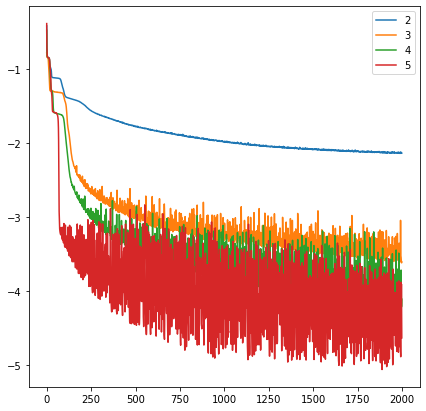

In [51]:
plt.figure(figsize=(7,7))
for i in range(4):
    plt.plot(np.log(history_all[i].history['loss'])/np.log(10),label=i+2)
plt.legend()
plt.show()

In [47]:
history_mean_val = []
history_mean = []
for this_history in history_all: 
    this_mean_val = np.sum(this_history.history['val_loss'][-20:])/20
    this_mean = np.sum(this_history.history['loss'][-20:])/20
    history_mean_val.append(this_mean_val)
    history_mean.append(this_mean)

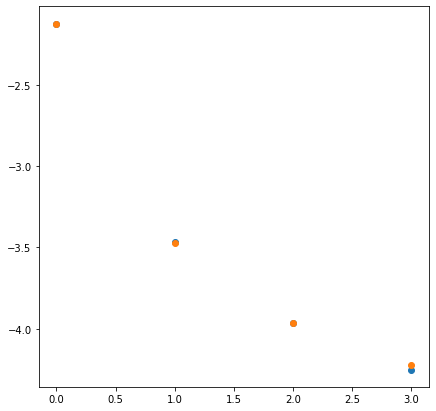

In [48]:
plt.figure(figsize=(7,7))
plt.scatter(range(4),np.log(history_mean)/np.log(10))
plt.scatter(range(4),np.log(history_mean_val)/np.log(10))
plt.show()

In [12]:
latent_dim = 3
input_dim = 5
    
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(256, activation='sigmoid')(inputs)
encoded = layers.Dense(256, activation='sigmoid')(encoded)
encoded = layers.Dense(latent_dim)(encoded)  

decoded = layers.Dense(256, activation='sigmoid')(encoded)
decoded = layers.Dense(256, activation='sigmoid')(decoded)
decoded = layers.Dense(input_dim)(decoded)  

autoencoder3d = keras.Model(inputs, decoded)
autoencoder3d.compile(optimizer='adam', loss='mse')
    
history_3d = autoencoder3d.fit(set_train, set_train, epochs=2000, batch_size=10000, shuffle=True, validation_data=(set_test,set_test))

Epoch 1/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - loss: 0.2349 - val_loss: 0.1813
Epoch 2/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.1705 - val_loss: 0.1579
Epoch 3/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.1515 - val_loss: 0.1443
Epoch 4/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.1456 - val_loss: 0.1459
Epoch 5/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.1452 - val_loss: 0.1448
Epoch 6/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.1445 - val_loss: 0.1438
Epoch 7/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - loss: 0.1436 - val_loss: 0.1435
Epoch 8/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.1431 - val_loss: 0.1427
Epoch 9/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.1426 - val_loss: 0.1407
Epoch 10/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.1391 - val_loss: 0.1352
Epoch 11/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.1322 - val_loss: 0.1227
Epoch 12/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 136/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 137/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 138/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 139/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 140/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 141/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 142/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 143/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 144/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 145/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 146/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 159m

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 270/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 271/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 272/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 273/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 274/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 275/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 276/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 277/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 278/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 279/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 280/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149m

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 404/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 405/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 406/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 407/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 408/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 409/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 410/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 411/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 412/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 413/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 414/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155m

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0011 - val_loss: 9.3924e-04
Epoch 536/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 9.5480e-04 - val_loss: 9.0934e-04
Epoch 537/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 9.8230e-04 - val_loss: 8.7086e-04
Epoch 538/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 8.9234e-04 - val_loss: 9.6650e-04
Epoch 539/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 9.8486e-04 - val_loss: 0.0010
Epoch 540/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 541/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 542/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 543/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0010 - val_loss: 9.1403e-04
Epoch 544/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 9.2249e-04 - val_loss: 0.0010
Epoch 545/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0011 - val_loss: 9.3789e-04
Epo

Epoch 663/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 9.0590e-04 - val_loss: 0.0012
Epoch 664/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0011 - val_loss: 7.7007e-04
Epoch 665/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 8.6659e-04 - val_loss: 9.8108e-04
Epoch 666/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 9.4372e-04 - val_loss: 7.6304e-04
Epoch 667/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 8.3810e-04 - val_loss: 7.5072e-04
Epoch 668/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 7.4418e-04 - val_loss: 7.4325e-04
Epoch 669/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 7.7472e-04 - val_loss: 7.5607e-04
Epoch 670/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 7.4100e-04 - val_loss: 9.2195e-04
Epoch 671/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 672/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0010 - val_loss: 8.8210e-04
Epoch 673/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - loss: 7.5355e-04 - val_loss: 9.5798e-04
Epoch 790/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - loss: 8.1912e-04 - val_loss: 6.9790e-04
Epoch 791/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 7.1769e-04 - val_loss: 0.0011
Epoch 792/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 793/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 0.0012 - val_loss: 9.6099e-04
Epoch 794/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 8.3968e-04 - val_loss: 7.0942e-04
Epoch 795/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 7.1128e-04 - val_loss: 6.4827e-04
Epoch 796/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 6.5918e-04 - val_loss: 6.0998e-04
Epoch 797/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - loss: 6.3065e-04 - val_loss: 6.4640e-04
Epoch 798/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 6.5275e-04 - val_loss: 6.4392e-04
Epoch 799/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - loss: 6.4376e-0

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - loss: 6.6312e-04 - val_loss: 6.9018e-04
Epoch 916/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - loss: 6.4220e-04 - val_loss: 5.7525e-04
Epoch 917/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 5.9529e-04 - val_loss: 6.0753e-04
Epoch 918/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 6.2030e-04 - val_loss: 8.0227e-04
Epoch 919/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 9.5066e-04 - val_loss: 6.7238e-04
Epoch 920/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 6.1100e-04 - val_loss: 6.2492e-04
Epoch 921/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 6.5722e-04 - val_loss: 5.2779e-04
Epoch 922/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 5.7132e-04 - val_loss: 5.4999e-04
Epoch 923/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 5.7396e-04 - val_loss: 6.7184e-04
Epoch 924/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 6.7827e-04 - val_loss: 7.0822e-04
Epoch 925/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step -

Epoch 1041/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 9.3353e-04 - val_loss: 0.0010
Epoch 1042/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 8.2365e-04 - val_loss: 8.3913e-04
Epoch 1043/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 7.4603e-04 - val_loss: 6.5861e-04
Epoch 1044/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 6.0075e-04 - val_loss: 4.8986e-04
Epoch 1045/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 5.7656e-04 - val_loss: 8.8160e-04
Epoch 1046/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 7.5730e-04 - val_loss: 6.3531e-04
Epoch 1047/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 7.0425e-04 - val_loss: 6.5909e-04
Epoch 1048/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 6.3935e-04 - val_loss: 5.2156e-04
Epoch 1049/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 5.3668e-04 - val_loss: 5.2977e-04
Epoch 1050/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 5.5153e-04 - val_loss: 5.1623e-04
Epoch 1051/2000
9/9 ━━━━━━━━━━━━━━

Epoch 1166/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 5.4920e-04 - val_loss: 5.0453e-04
Epoch 1167/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 5.3465e-04 - val_loss: 4.5868e-04
Epoch 1168/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 4.5834e-04 - val_loss: 4.2611e-04
Epoch 1169/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 4.4871e-04 - val_loss: 4.6704e-04
Epoch 1170/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 6.1545e-04 - val_loss: 0.0015
Epoch 1171/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0013 - val_loss: 8.8929e-04
Epoch 1172/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 7.7586e-04 - val_loss: 7.3963e-04
Epoch 1173/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 6.0945e-04 - val_loss: 4.6573e-04
Epoch 1174/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 4.7482e-04 - val_loss: 4.6662e-04
Epoch 1175/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 4.6467e-04 - val_loss: 4.2919e-04
Epoch 1176/2000
9/9 ━━━━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 4.6972e-04 - val_loss: 3.9701e-04
Epoch 1291/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 4.0536e-04 - val_loss: 4.1232e-04
Epoch 1292/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 4.3407e-04 - val_loss: 4.2921e-04
Epoch 1293/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 4.8853e-04 - val_loss: 6.0907e-04
Epoch 1294/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 5.9412e-04 - val_loss: 4.3443e-04
Epoch 1295/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 4.2518e-04 - val_loss: 3.9815e-04
Epoch 1296/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 4.2384e-04 - val_loss: 3.8945e-04
Epoch 1297/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 4.1194e-04 - val_loss: 7.3043e-04
Epoch 1298/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 7.8322e-04 - val_loss: 4.8719e-04
Epoch 1299/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 5.1131e-04 - val_loss: 4.4845e-04
Epoch 1300/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 13

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 4.6215e-04 - val_loss: 3.5620e-04
Epoch 1415/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 4.1684e-04 - val_loss: 7.5539e-04
Epoch 1416/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 6.9902e-04 - val_loss: 4.3567e-04
Epoch 1417/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 4.1423e-04 - val_loss: 3.9791e-04
Epoch 1418/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 4.1685e-04 - val_loss: 3.6016e-04
Epoch 1419/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 3.9186e-04 - val_loss: 6.5003e-04
Epoch 1420/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 5.8141e-04 - val_loss: 4.1124e-04
Epoch 1421/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 4.2171e-04 - val_loss: 3.5598e-04
Epoch 1422/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 3.5875e-04 - val_loss: 4.4664e-04
Epoch 1423/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.6101e-04 - val_loss: 4.7950e-04
Epoch 1424/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 5.1467e-04 - val_loss: 6.4323e-04
Epoch 1539/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 5.4033e-04 - val_loss: 3.6628e-04
Epoch 1540/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 3.5891e-04 - val_loss: 3.4091e-04
Epoch 1541/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 3.5113e-04 - val_loss: 3.2767e-04
Epoch 1542/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 3.6043e-04 - val_loss: 3.5034e-04
Epoch 1543/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 3.6614e-04 - val_loss: 4.1155e-04
Epoch 1544/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 3.8083e-04 - val_loss: 4.9733e-04
Epoch 1545/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 5.2607e-04 - val_loss: 3.1819e-04
Epoch 1546/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 4.3479e-04 - val_loss: 7.9179e-04
Epoch 1547/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 7.1101e-04 - val_loss: 3.7912e-04
Epoch 1548/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 3.1913e-04 - val_loss: 3.6670e-04
Epoch 1663/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 4.1357e-04 - val_loss: 7.8419e-04
Epoch 1664/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 9.4085e-04 - val_loss: 2.7029e-04
Epoch 1665/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 3.8029e-04 - val_loss: 3.2070e-04
Epoch 1666/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 3.4399e-04 - val_loss: 3.3552e-04
Epoch 1667/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 3.1845e-04 - val_loss: 3.2918e-04
Epoch 1668/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 3.3668e-04 - val_loss: 4.0194e-04
Epoch 1669/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 3.8034e-04 - val_loss: 3.1343e-04
Epoch 1670/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 3.1666e-04 - val_loss: 2.8217e-04
Epoch 1671/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 2.9333e-04 - val_loss: 2.7694e-04
Epoch 1672/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 155

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 3.3974e-04 - val_loss: 2.7285e-04
Epoch 1787/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 2.8528e-04 - val_loss: 2.5791e-04
Epoch 1788/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 2.9359e-04 - val_loss: 4.6978e-04
Epoch 1789/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 4.3294e-04 - val_loss: 2.9678e-04
Epoch 1790/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 3.9774e-04 - val_loss: 4.5998e-04
Epoch 1791/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 3.9551e-04 - val_loss: 2.5507e-04
Epoch 1792/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 2.6879e-04 - val_loss: 2.6567e-04
Epoch 1793/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 3.2895e-04 - val_loss: 2.9169e-04
Epoch 1794/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 2.9016e-04 - val_loss: 4.0658e-04
Epoch 1795/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 3.5407e-04 - val_loss: 3.0349e-04
Epoch 1796/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - loss: 2.7457e-04 - val_loss: 2.5943e-04
Epoch 1911/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 2.6910e-04 - val_loss: 3.1438e-04
Epoch 1912/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 3.1895e-04 - val_loss: 2.4321e-04
Epoch 1913/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 2.8609e-04 - val_loss: 3.0809e-04
Epoch 1914/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 4.0887e-04 - val_loss: 7.7091e-04
Epoch 1915/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 6.1811e-04 - val_loss: 3.0599e-04
Epoch 1916/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 3.1301e-04 - val_loss: 2.3641e-04
Epoch 1917/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - loss: 2.5344e-04 - val_loss: 2.2111e-04
Epoch 1918/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 2.3106e-04 - val_loss: 2.1897e-04
Epoch 1919/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 2.2952e-04 - val_loss: 2.1283e-04
Epoch 1920/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27

In [8]:
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
############################################### Clustering #########################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

In [ ]:
############################################## Local dim ###########################################################

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN

def local_dim_estimation(x,verbose = 0, var_thres = 0.95):
    data = x  

    scaler = StandardScaler()
    
    #data_scaled = scaler.fit_transform(data)

    # Do the PCA
    pca = PCA()
    pca.fit(data)

    # Explained std for each direction
    explained_variance_ratio = pca.explained_variance_ratio_

    # Summed std
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    if verbose == 1:
        print("Variance expliquée par chaque composante :", explained_variance_ratio)
        print("Variance cumulée :", cumulative_variance)
    
    # Underlying dimension
    dimension_sous_jacente = np.argmax(cumulative_variance >= var_thres) + 1 
    if verbose == 1:
        print(f"Dimension sous-jacente estimée ({var_thres*100}% de variance) : {dimension_sous_jacente}")
    return dimension_sous_jacente

def compute_local_dim(data, verbose = 0, min_dist = 0.05,increment_dist = 0.05, n_neig = 20, var_thres = 0.99):
    n_points = data.shape[0]
    all_local_dim = []
    for i in range(n_points):
        if i % 100 == 0 and verbose == 2 :
            print(i)
        elif i % 1000 == 0 and verbose == 1 :
            print(i)
        this_dist = min_dist
        n_neigh_bool = True
        while n_neigh_bool: 
            this_mask = (np.sum((data - data[i,:]) ** 2,axis=1)**.5)<this_dist
            if np.sum(this_mask) < n_neig:
                this_dist += increment_dist
            else: 
                n_neigh_bool = False
        all_local_dim.append(local_dim_estimation(data[this_mask],var_thres=var_thres))
    return all_local_dim

In [4]:
all_local_dim_5d = compute_local_dim(x_5d, verbose=2, min_dist = 0.1)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [5]:
x_5d_deco = x_5d[np.array(all_local_dim_5d)==3]

In [6]:
x_5d_deco.shape 

(89293, 5)

In [54]:
clusterer = HDBSCAN(min_cluster_size=10)
labels = clusterer.fit_predict(x_5d_deco)
data_labeled=x_5d_deco[labels!=-1] 

In [55]:
for lab_idx in range(np.max(labels)+2):
    print(x_5d_deco[labels==lab_idx-1].shape)

(6853, 5)
(82430, 5)
(10, 5)


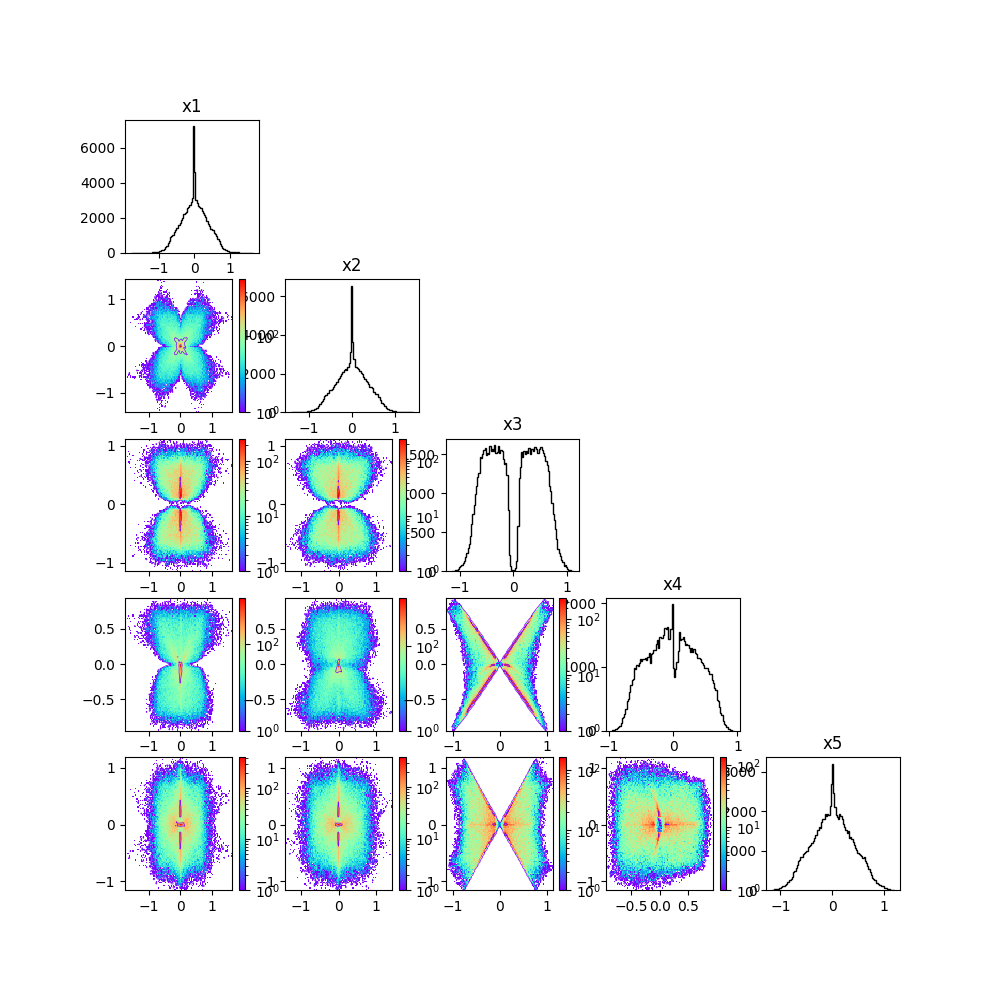

In [58]:
utils.triangular_plot(x_5d_deco,figsize=(10,10))

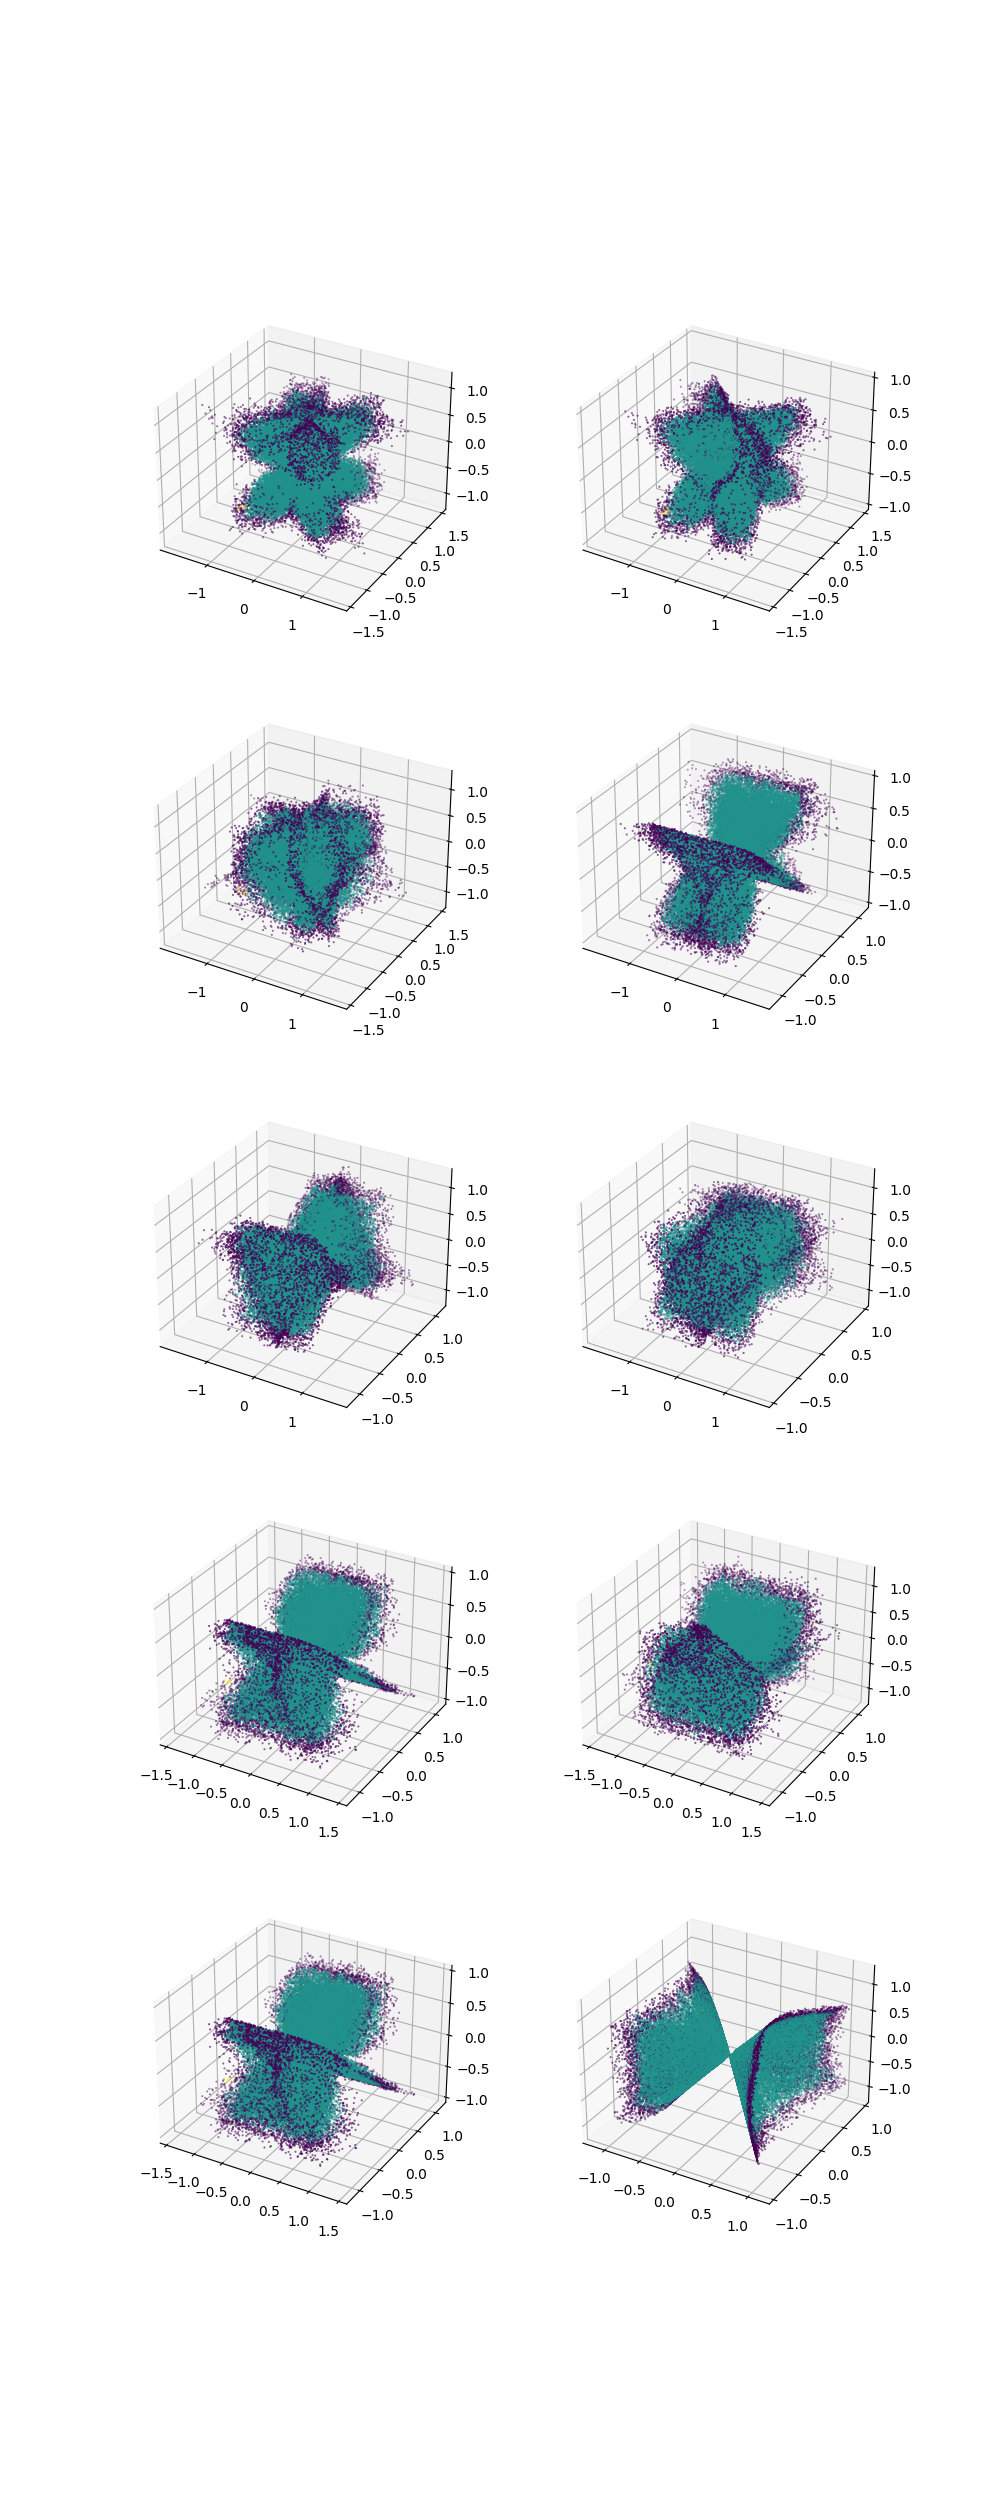

In [59]:
%matplotlib widget 

fig, axes = plt.subplots(5, 2, subplot_kw={'projection': '3d'}, figsize=(10, 25))

axes[0,0].scatter(x_5d_deco[:,0],x_5d_deco[:,1],x_5d_deco[:,2],c=labels, cmap="viridis",s=0.2)
axes[0,1].scatter(x_5d_deco[:,0],x_5d_deco[:,1],x_5d_deco[:,3],c=labels, cmap="viridis",s=0.2)
axes[1,0].scatter(x_5d_deco[:,0],x_5d_deco[:,1],x_5d_deco[:,4],c=labels, cmap="viridis",s=0.2)
axes[1,1].scatter(x_5d_deco[:,0],x_5d_deco[:,2],x_5d_deco[:,3],c=labels, cmap="viridis",s=0.2)
axes[2,0].scatter(x_5d_deco[:,0],x_5d_deco[:,2],x_5d_deco[:,4],c=labels, cmap="viridis",s=0.2)
axes[2,1].scatter(x_5d_deco[:,0],x_5d_deco[:,3],x_5d_deco[:,4],c=labels, cmap="viridis",s=0.2)
axes[3,0].scatter(x_5d_deco[:,1],x_5d_deco[:,2],x_5d_deco[:,3],c=labels, cmap="viridis",s=0.2)
axes[3,1].scatter(x_5d_deco[:,1],x_5d_deco[:,2],x_5d_deco[:,4],c=labels, cmap="viridis",s=0.2)
axes[4,0].scatter(x_5d_deco[:,1],x_5d_deco[:,2],x_5d_deco[:,3],c=labels, cmap="viridis",s=0.2)
axes[4,1].scatter(x_5d_deco[:,2],x_5d_deco[:,3],x_5d_deco[:,4],c=labels, cmap="viridis",s=0.2)
plt.show()

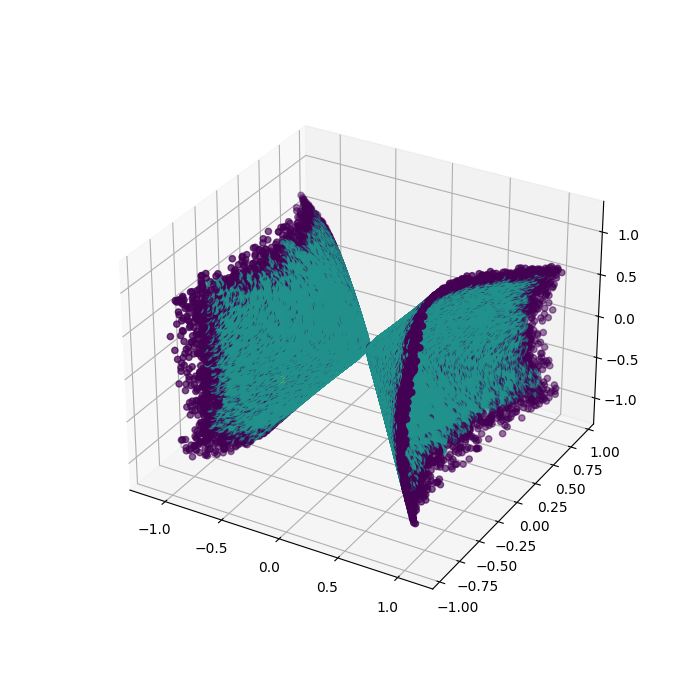

In [71]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

#ax.scatter(x_4d_test[:,1],x_4d_test[:,2],x_4d_test[:,3],s=.5)
ax.scatter(x_5d_deco[:,2],x_5d_deco[:,3],x_5d_deco[:,4],c=labels)

plt.show()

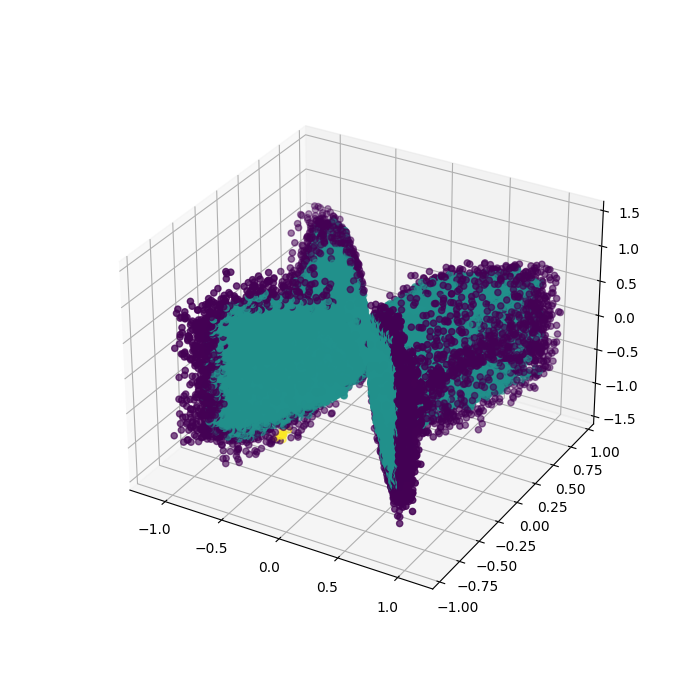

In [72]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

#ax.scatter(x_4d_test[:,1],x_4d_test[:,2],x_4d_test[:,3],s=.5)
ax.scatter(x_5d_deco[:,2],x_5d_deco[:,3],x_5d_deco[:,1],c=labels)

plt.show()

In [ ]:
####################################################################################################################
####################################################################################################################
####################################################################################################################
############################################### Symbolic Regression ################################################
####################################################################################################################
####################################################################################################################
####################################################################################################################

In [ ]:
################################################## AI Feynman ######################################################

In [6]:
import aifeynman
#importlib.reload(aifeynman)

In [66]:
x_5d_noexp = np.array([x_5d[:,0],x_5d[:,1],x_5d[:,2],np.exp(x_5d[:,3]),x_5d[:,4]]).T

In [67]:
x_5d_noexp.shape

(100000, 5)

In [68]:
np.savetxt("x_5d_28_01_25_aifeynman_noexpx8.txt",x_5d_noexp)

In [69]:
#learn x10 

aifeynman.run_aifeynman("./",
                        "x_5d_28_01_25_aifeynman_noexpx8.txt",
                        300, 
                        "persops.txt", 
                        polyfit_deg=10, 
                        NN_epochs=5000)

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve ./x_5d_28_01_25_aifeynman_noexpx8.txt_train
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       4
Functions used..........            +*-/><~\R1
 Arity            0 : 1abcd
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Shuffling mystery data..
 Searching for best fit...
     27.300319091468     -1.000272743899                      1               1             0.0000       2184025.5273             0.3697             1.1860             2.0951         80000.0000
     27.225025682808     -0.000073278

     24.608798805069      0.000011478052               cbdd<+**         3044494            21.5378       1669802.3631             0.2340             1.4059             4.1640           443.6636
     24.608146981922     -0.000053279915               bcad</*-         3103798            21.5656       1669758.1628             0.2340             1.4059             4.1680           461.8246
     24.606555478739      0.000820418983               cbad<//-         3128794            21.5772       1669650.1861             0.2374             9.7926             4.1720           461.8184
     24.605431395630      0.000002363007               bdcc*<+*         3234353            21.6250       1669573.9615             0.2340             1.4059             4.1777           465.2120
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
34.67 27.3 -1.000272743899+1
34.76 27.3 -0.000291337958*1
38.78 27.3 0.001178332155*x1
40.77 26.97 sqrt(0.000000041631+(x2*(x2/s

     24.200833981890     -0.414198275766                cc*>\>R         1766674            20.7526       1936087.4712             0.0748             0.4634             2.8323           274.8203
     21.247965065238     -1.000001540610               dcc*d\--         6015475            22.5202       1699859.7255             0.0453             0.3835             4.5877           191.0881
     21.247965065234     -1.000001540610               dcc*-d\+         7669975            22.8708       1699860.0760             0.0453             0.3835             4.5877           162.7202
     21.247965065223     -1.000001540610               dd\+cc*-        13952355            23.7340       1699860.9392             0.0453             0.3835             4.5877           114.1400
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_cos/x_5d_28_01_25_aifeynman_noexpx8.txt_train
Rejection threshold.....    10.000
Bit margin..............     0

Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
34.67 30.0 log(-0.000272706707+1)
34.67 27.24 tan(-0.000272743892+(1-1))
40.77 26.97 sqrt(0.000000041631+(x2*(x2/sqrt(((x3+1)+1)))))
57.93 26.97 sqrt(-0.499239039925+(((x2*x2)+1)/(1+1)))
58.2 26.97 sqrt(0.000494039623+(x2*(x2/(1-(x1-1)))))
62.54 24.69 sqrt(0.000011478052*(x2*(x1*(x3+(x3-1)))))
65.75 24.61 sqrt(0.000002363007*(x1*(x3+((x2*x2)-1))))

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_inverse/x_5d_28_01_25_aifeynman_noexpx8.txt_train
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       4
Functions used..........            +*-/><~\R1
 Arity            0 : 1abcd
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                       

 Searching for best fit...
     27.267630768277     -0.000274072602                      1               1             0.0000       2163986.4454             0.3462             0.9270             2.0660         79361.0000
     27.266766921977      0.001598192558                      b               3             1.5850       2163919.4747             0.3462             0.9260             2.0706         61097.0000
     27.266500936196      0.011499514178                      c               4             2.0000       2163898.7808             0.3462             0.9239             2.0712         65663.0000
     27.265967757903     -0.000590725052                     d<              15             3.9069       2163858.3741             0.3462             0.9265             2.0749         70417.5312
     27.265965770997     -0.003329619269                    ba+              38             5.2479       2163859.5575             0.3462             0.9283             2.0741         62300.8438
   

     27.309586466795     -0.000088846567                  cbb**            3069            11.5836       2184778.5009             0.4257             2.2783             2.1688         11745.4727
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_tan/x_5d_28_01_25_aifeynman_noexpx8.txt_train
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       4
Functions used..........            +*-/><~\R1
 Arity            0 : 1abcd
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Removing problematically
   2.4670718505383604        2.467071967

     25.320272060066      0.999981142955              acba-\/<+        20623438            24.2978       2025646.0626             0.2123            36.1421             2.4973            84.8938
     25.299050594224     -0.000050070753              baac/--c/        22741431            24.4388       2023948.4864             0.2042            36.2328             2.4096            84.1461
     25.299050594224     -0.000050070753              bac\<*+c/        29199959            24.7995       2023948.8470             0.2042            36.2328             2.4096            79.9122
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/translated_data_divide/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       3
Functions used..........            +*-/><~\R1
 Arity            0 : 1abc
 Arity            1 : ><~\R
 Arity            2 : +*-/
Load

     25.176349838088      0.000000041631               bbc>>R/*         2143975            21.0319       2014129.0189             0.1569             0.9916             2.9920           279.3424
     24.728943410862      2.019605440056               bb*cc\+-         8195335            22.9664       1978338.4392             0.1184             1.0264             1.9418           235.9953
     24.728943410861      2.019605440056               bb*c\-c-         8793863            23.0681       1978338.5409             0.1184             1.0264             1.9418           224.8121
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_squared/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       3
Functions used..........            +*-/><~\R1
 Arity            0 : 1abc
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loadi

     27.201314988101     -0.069529269173                  aac/-            2406            11.2324       2159387.6228             0.3167             2.4323             1.9890         51917.3516
     27.136183986222     -0.420687891185                  c<a>*            8924            13.1235       2154219.0892             0.3802            15.1773             2.0858         46876.8750
     27.132815194551     -0.418926028729                  c<a<*            9004            13.1363       2153951.6706             0.3796            15.1144             2.0898         46715.7148
     26.365722378464      1.141015250463                 bac<*-           18795            14.1981       2093057.0691             0.3662            41.2523             2.4092         39095.9180
     24.218958874179     -1.399038500658                 bc<a/-           34787            15.0863       1922637.1365            60.2713         15980.5606             4.2518         21510.9316
     21.639731858640     -1.38

     24.203305098604      0.707009235077                1>bb*-R         1028177            19.9717       1936284.3795             0.0761             0.4370             2.7488           325.3626
     23.684192216684      0.495184261041               cbb*c\--         3068504            21.5491       1894756.9264             0.0544             0.4377             1.9227           200.1466
     23.684177868345     -0.495184369199               bb*cc\+-         8195335            22.9664       1894757.1958             0.0544             0.4377             1.9227           103.4252
     23.684177868345     -0.495184369199               bb*c\-c-         8793863            23.0681       1894757.2975             0.0544             0.4377             1.9227            99.4735
     21.247975666714      0.999998459379              cbb*c\<--        36227404            25.1106       1699863.1639             0.0453             0.3835             4.5877            56.3308
     21.247975666714      0.99

     25.301350930622      1.002059093688               bac/a<-+         3025123            21.5286       2024129.6030             0.2371            36.2644             2.1746           454.2170
     25.301350930622      1.002059093688               bac/+a<-         3853283            21.8777       2024129.9521             0.2371            36.2644             2.1746           367.5981
     25.301350930622      1.002059093688               ac/ba->+         8234730            22.9733       2024131.0477             0.2371            36.2644             2.1746           197.2235
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
34.67 30.0 log(-0.000272706707+1)
34.67 27.24 tan(-0.000272743892+(1-1))
40.77 26.97 sqrt(0.000000041631+(x1*(x1/sqrt(((x2+1)+1)))))
47.32 25.32 -1.000018857045+((x2*(x1-x0))+(x0+1))
50.35 25.31 tan(0.000008723310+(x0+(x2*(x1-x0))))
50.35 25.31 tan(2.000008723310+(x0+(((x2*(x1-x0))-1)-1)))
50.73 25.3 -0.000050070753+((x1

     15.811539400680     -0.707106816609               abac/+-\         1976006            20.9142          9460.4032            55.3663          1005.2157             6.4157           170.9700
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
24.81 32.66 1/(-0.016204271998+(x1)**(-1))
34.67 30.0 log(-0.000272706707+1)
34.67 27.24 tan(-0.000272743892+(1-1))
40.77 26.97 sqrt(0.000000041631+(x1*(x1/sqrt(((x2+1)+1)))))
47.32 25.32 -1.000018857045+((x2*(x1-x0))+(x0+1))
50.35 25.31 tan(0.000008723310+(x0+(x2*(x1-x0))))
50.35 25.31 tan(2.000008723310+(x0+(((x2*(x1-x0))-1)-1)))
50.73 25.3 -0.000050070753+((x1-(x0-(x0/x2)))/x2)
63.88 24.54 sqrt(0.000164922596*(x1*(x2-((x1*x0)+1))))
111.52 24.25 -1.413177227256*(x1-((x2-1)/x0))
161.67 9.89 1.414213551821*(x1-(x0-(x0/x2)))

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_sin/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide
Re

     20.807270122030      1.400596017443               baca/\--         1808995            20.7868       1651306.5509             0.2159            50.7223             3.0639           456.2114
     20.807270122030      1.400596017443              bac/a<>-+        36015063            25.1021       1651310.8663             0.2159            50.7223             3.0639            45.6796
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
24.81 32.66 1/(-0.016204271998+(x1)**(-1))
34.67 30.0 log(-0.000272706707+1)
34.67 27.27 asin(-4.000272743895+(((1+1)+1)+1))
34.67 27.24 tan(-0.000272743892+(1-1))
40.77 26.97 sqrt(0.000000041631+(x1*(x1/sqrt(((x2+1)+1)))))
47.32 25.32 -1.000018857045+((x2*(x1-x0))+(x0+1))
47.67 25.29 asin(0.000001356762+(x0+(x2*(x1-x0))))
60.97 25.27 asin(-0.000041998093+((x1-(x0-(x0/x2)))/x2))
63.88 24.54 sqrt(0.000164922596*(x1*(x2-((x1*x0)+1))))
111.52 24.25 -1.413177227256*(x1-((x2-1)/x0))
119.99 21.48 asin(1.400596017443*

     27.373399498794     -1.000272743905                   a>a-            1010             9.9801       2189881.9400             0.4379             2.4673             2.1621         12948.5771
     27.278219984781     -0.000310245817                 a1cR-*           18022            14.1375       2182271.7363             0.4184            18.0627             2.0945         11247.5244
     26.762362148382      0.000012451980                 bac<*-           18795            14.1981       2141003.1699             0.3733            36.1417             2.3126         11002.3369
     26.003332834976     -0.000152797677                 c<a/b-          113344            16.7903       2080283.4171            42.9164         11422.1838             2.7867          2165.1235
     25.460294766052     -0.000008652939                acba-*+          161142            17.2980       2036840.8793             0.2597            36.1418             2.6120          1570.9186
     25.460294766052     -1.00

     20.685435517205                ba<E>\+          905796            19.7888        206874.1440             1.2461             0.0000             0.0689             1.1811
     20.278757423814              bbCaE\+\-       157967517            27.2351        202814.8093             0.4067             0.0000             0.0614             1.0663

Translational symmetry found for variables: 0 1
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/translated_data_multiply/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       2
Functions used..........            +*-/><~\R1
 Arity            0 : 1ab
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                  

Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_squared/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       2
Functions used..........            +*-/><~\R1
 Arity            0 : 1ab
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Removing problematically
   1.4058750182204136        1.4058750849958938E-003
       12147  out of        80000  data points discarded for being too close to zero
Shuffling mystery data..
 Searching for best fit...
    

Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
34.67 27.24 tan(-0.000272743892+(1-1))
40.59 27.24 tan(0.000016154432*((x0-1))**(-1))
44.38 27.23 sqrt(-0.947592086921+1)
55.37 26.98 sqrt(0.000310799807+(x0-(x0/sqrt(x1))))
59.73 26.96 sqrt(0.000181236754+(x0/(x1/(sqrt(x1)-1))))
64.78 24.99 sqrt(-0.000577359759*(x1-(x0+1)))
65.73 24.98 sqrt(-0.000540030500*(x1*(x1-(x0+1))))
68.06 24.61 sqrt(-0.003408946748*(x0+(x0/(x0-x1))))
72.41 24.61 sqrt(-0.003408946748*(x0*(((x0-x1))**(-1)+1)))

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_cos/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       2
Functions used..........            +*-/><~\R1
 Arity            0 : 1ab
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000

     27.172976690860      2.000145984238                 ba>-<\           31959            14.9639       2173853.0992            48.4471         12822.4058             3.0170         12453.9492
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_exp/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       2
Functions used..........            +*-/><~\R1
 Arity            0 : 1ab
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Removing problematically
   3

Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       2
Functions used..........            +*-/><~\R1
 Arity            0 : 1ab
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Shuffling mystery data..
 Searching for best fit...
     27.267003841653     -1.000272743895                      1               1             0.0000       2181360.3073             0.3462             0.9270             2.0663         80000.0000
     27.267003841653     -2.000272743895                     1>               4             2.0000       2181362.3073             0.3462             0.9270             2.0663

Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       2
Functions used..........            +*-/><~\R1
 Arity            0 : 1ab
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Removing problematically
   1.4058750182204136        1.4058750849958938E-003
       12147  out of        80000  data points discarded for being too close to zero
Shuffling mystery data..
 Searching for best fit...
     24.607895327474     -0.000577359759                   ba>-             225             7.8138       1669727.3354             0.3575            70.2537             4.1775           557.1866
     24.607

NN loss after training:  (tensor(0.9939, grad_fn=<DivBackward0>), SimpleNet(
  (linear1): Linear(in_features=2, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=64, bias=True)
  (linear5): Linear(in_features=64, out_features=1, bias=True)
)) 

Checking for symmetries...

Checking for separabilities...

Checking for compositionality...

Checking for generalized symmetry...

Translational symmetry found for variables: 0 1
Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/translated_data_minus/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply-translated_minus
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       1
Functions used..........            +*-/><~\R1
 Arity            0 : 1a
 Arity            1 : >

Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       1
Functions used..........            +*-/><~\R1
 Arity            0 : 1a
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Removing problematically
   1.4058750182204136        1.4058750849958938E-003
       12147  out of        80000  data points discarded for being too close to zero
Shuffling mystery data..
 Searching for best fit...
     24.607895327474      0.000577359759                     a>               4             2.0000       1669721.5217             0.3575            70.2537             4.1775         17191.2500
     24.6024

     24.500122069805      0.495417223057                 aa\+\~           12730            13.6359       1960023.4015             0.2020             1.0031             2.7715         19401.3984
     24.500122069805     -0.504582776943                1aa\+\-           43459            15.4074       1960025.1730             0.2020             1.0031             2.7715          7504.7344
     24.227842671402      3.000100574471                aaa+\>/           51276            15.6460       1938243.0597           435.5298        122168.9397             4.9157          6703.6143
     24.001447206821     -0.000261552225                aa\>+\~          100612            16.6184       1920132.3950             0.3335             1.3322             3.9848          4533.9048
     24.001447206821     -0.000261552225                aa\+>\~          120212            16.8752       1920132.6518             0.3335             1.3322             3.9848          3900.8354
     23.765760316230     -0.00

     27.279388655072      1.000335007015                  aa*RR            2016            10.9773       2182362.0697             1.5390           347.9418             2.3938         37648.6680
     27.271398090589      0.499522257483                  a>>\>            3376            11.7211       2181723.5683            24.1979          6403.3905             2.4254         36491.7617
     27.265469536884      1.996550597916                  a>>>\            3976            11.9571       2181249.5201            11.7658          2377.2521             2.5086         36357.7266
     27.251922906951      1.000064148260                  a\>>\            3982            11.9593       2180165.7918            47.8138         10071.0070             2.7520         36403.4258
     27.216723659588     -1.502170823865                 aa<\+\           10302            13.3306       2177351.2234             0.5435             3.0471             2.3450         33320.2109
     27.199304261327      2.00

     27.109277983914     -0.498423875144                 aaa\+/            4986            12.2837       2168754.5224             0.3888             1.3921             2.2520         25386.8457
     27.090189754987     -0.995960082348                 aa>*>\           12898            13.6549       2167228.8353             0.4687             1.9029             2.3861         18596.0410
     26.990116955268     -0.004544924423                aa>\>+\           88260            16.4295       2159225.7859             0.4093             1.3856             2.4225         14165.7451
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_sin/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply-translated_minus
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       1
Functions used..........            +*-/><~\R1
 Arity            0 : 1a
 Arity            1 : ><~\R
 

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_tan/x_5d_28_01_25_aifeynman_noexpx8.txt_train-translated_divide-translated_multiply-translated_minus
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       1
Functions used..........            +*-/><~\R1
 Arity            0 : 1a
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Shuffling mystery data..
 Searching for best fit...
     27.373399498794     -1.000272743905                      1               1             0.0000       2189871.9599             0.4379             2.4673

In [31]:
x_5d_noexp_x8 = np.array([x_5d[:,0],x_5d[:,1],x_5d[:,2],x_5d[:,4],np.exp(x_5d[:,3])]).T

In [49]:
x_5d_noexp_x2.shape

(100000, 5)

In [50]:
np.savetxt("x_5d_28_01_25_aifeynman_noexpx8_x8.txt",x_5d_noexp_x8)

In [51]:
#learn x8

start = time.time()

aifeynman.run_aifeynman("./",
                        "x_5d_28_01_25_aifeynman_noexpx8_x8.txt",
                        300, 
                        "persops.txt", 
                        polyfit_deg=10, 
                        NN_epochs=5000)

end = time.time()

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve ./x_5d_28_01_25_aifeynman_noexpx8_x8.txt_train
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       4
Functions used..........            +*-/><~\R1
 Arity            0 : 1abcd
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Shuffling mystery data..
 Searching for best fit...
     27.485298541744     -0.007997989655                      1               1             0.0000       2198823.8833             0.3975             1.5669             1.9715         80000.0000
     27.484178405455      0.964855

     28.324347581805      1.018453429131                     c~              19             4.2479       2265952.0545             1.0912             6.5073             2.2134         57970.8438
     28.247407195857      1.006267514966                   cc~*             449             8.8106       2259801.3862             1.1581             6.4976             2.2059         26954.1387
     28.151332502597      1.028638588433                  cab/*            3314            11.6944       2252118.2946           165.0901         45672.7524             2.1813         15587.2998
     27.978665390397      1.001078764498                  bac/*            3338            11.7048       2238304.9360             1.6595           293.9169             2.2227         15548.3418
     27.978665390397      1.001078764498                  acb//            4322            12.0775       2238305.3087             1.6595           293.9169             2.2227         12464.9111
     27.947977760235      1.08

     26.357851977601      0.389387733501                    a>>             132             7.0444       2108635.2026             0.2213             1.0192             2.1363          8813.3936
     26.106338272578      0.389973678051                    c>>             134             7.0661       2088514.1279             0.2493             0.8124             2.3185          9875.8809
     26.092293537947     -0.390256004398                    c<<             164             7.3576       2087390.8406             0.2489             0.8115             2.3211          8817.2500
     26.092293537947     -0.390256004398                  c<<\\           23664            14.5304       2087398.0134             0.2489             0.8115             2.3211          1337.2021
     26.044950595717      0.778340172545                 cba**>           45169            15.4630       2083611.5107             0.1329             0.5060             1.7941          1058.7251
     25.942980811716      0.45

       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Shuffling mystery data..
 Searching for best fit...
     28.975306245201      1.696627748501                      1               1             0.0000       2318024.4996             1.5003            10.2253             2.0756         80000.0000
     28.835466928736      2.710232989993                      a               2             1.0000       2306838.3543             1.5354             9.9650             2.2735         80000.0000
     28.802487968786      2.717497147541                   cc~*             449             8.8106       2304207.8481             1.6519            11.1603             2.2406         36002.5273
     28.775174069850      2.721561500044  

     25.704081214283     -0.006266898237               bdc-a/*>         6299103            22.5867       2056349.0839            46.2393         12483.6594             2.6919           199.7052
     25.704081214283     -0.006266898237               dc-ab//>        16481925            23.9744       2056350.4715            46.2393         12483.6594             2.6919           146.9507
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_inverse/x_5d_28_01_25_aifeynman_noexpx8_x8.txt_train
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       4
Functions used..........            +*-/><~\R1
 Arity            0 : 1abcd
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                               

     27.473413428422      0.009876230466                     c~              19             4.2479       2180294.3376             0.3662             0.9570             2.0148         75183.2109
     27.472991839375     -0.001967290306                    da+              40             5.3219       2180261.9543             0.3662             0.9474             2.0187         62069.6484
     27.470070869581     -0.099028618018                    da*              65             6.0224       2180030.8466             0.3665             0.9826             2.0220         66109.4766
     27.434846578371      0.356443905574                    dc*              75             6.2288       2177235.6533             0.3689             1.2201             2.0492         64187.5469
     27.434815078830     -0.356555495570                   dc~*             450             8.8138       2177235.7384             0.3689             1.2202             2.0493         54367.3828
     27.431708595471     -0.22

 Searching for best fit...
     26.366381586984      0.835764122175                      1               1             0.0000       2109310.5270             0.1589             0.4575             1.8023         80000.0000
     26.366373557572     -0.835766216776                     1~              16             4.0000       2109313.8846             0.1589             0.4575             1.8023         15496.8125
     26.350320675252      0.828825350074                   ba*>             788             9.6221       2108035.2761             0.2151             1.1648             1.9968          9146.6045
     26.296597468676      0.827977358259                   cb*>             794             9.6330       2103737.4305             0.2211             1.2013             2.0223          9488.2490
     26.290538514106     -0.828299694873                   cb*<             894             9.8041       2103252.8853             0.2210             1.2406             2.0215         10518.8252
   

     26.238654551837      0.333125678162                  1c<<-            5796            12.5008       2099104.8650             0.2401             0.9260             2.2085          2791.8997
     25.965858567839      0.994960595045                 cba**>           45169            15.4630       2077284.1485             0.1381             0.6476             1.8644          1531.9279
     25.865370745640      0.492873657182                cab/*>>          636064            19.2788       2069248.9385            81.3685         22510.9249             2.5646           325.0965
     25.803079756542      0.994497864744               cbaa+**>         3593419            21.7769       2064268.1574             0.1568             1.7141             1.9834           274.1029
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
44.77 29.89 exp(0.011075301099*x1)
45.88 29.89 exp(0.024060871723*x0)
46.49 26.59 asin(-0.164235877825+1)
46.5 26.51 (-0.0040070

     29.303112267735      1.323613157748                   cc~*             449             8.8106       2344257.7920           186.6398         31460.0977             2.5780         21111.6172
     29.282508869472      1.371142144360                  cac-*            3214            11.6502       2342612.3597           186.6414         31459.9844             2.6538         12916.2285
     29.266545363314      1.379334790524                  cbc-*            3219            11.6524       2341335.2815           186.6388         31460.0942             2.6873         12936.2891
     29.242861513238      1.414887553988                  bac/*            3338            11.7048       2339440.6258           186.6442         31459.7627             2.7031         12987.0488
     29.176605481860      1.449058776388                  bb*R~           12818            13.6459       2334142.0844           186.6410         31459.8794             2.8312          9057.9180
     29.080873006452      1.46

     25.569647197001      0.008250639734                acab-+/          172454            17.3959       2045589.1716            11.3736          1840.6488             2.5714           196.0663
     25.410262806670     -0.000346337296                ca-ba-/          741808            19.5007       2032840.5252            14.3394          2446.8149             3.0527           115.2192
     25.246379425411      1.014978707717               bb+aa\+/         8215159            22.9699       2019733.3239             0.1177             0.6473             1.9929            97.2403
     24.946843800738      0.974807666541              abc1>R/+*        18400538            24.1332       1995771.6373             0.1107             1.2092             1.8451            65.9675
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/translated_data_divide/x_5d_28_01_25_aifeynman_noexpx8_x8.txt_train-translated_divide
Rejection threshold.....    10.000
Bit 

     28.080529028541      0.976335099608                   ba*>             531             9.0526       2246451.3749           161.1836         44591.9629             2.2793          6472.7026
     28.080529028541      0.976335099608                  ba\/>            4567            12.1570       2246454.4793           161.1836         44591.9629             2.2793          2002.1184
     28.080464078999     -0.976338160612                  ba~*<            4711            12.2018       2246449.3281           161.1841         44592.1027             2.2798          2037.1178
     27.955046286175      0.984211726867                 bac-*>           26475            14.6923       2236418.3952           162.4816         44950.9407             2.3851          1434.7528
     27.918832271626      1.066103487791                 bac-/>           26987            14.7200       2233521.3017            65.6999         12972.9976             2.3270          1442.9772
     27.850389273474      1.09

     27.213485429919     -0.452986667024                      1               1             0.0000       2177078.8344             0.3547             1.3820             1.9851         80000.0000
     27.213485429919     -2.452986667024                    1>>              89             6.4757       2177085.3101             0.3547             1.3820             1.9851         17290.7637
     26.677899876289      0.536891846278                   ba~*             307             8.2621       2134240.2522           165.0898         45672.7777             2.8478         14964.2803
     26.349827060217      0.541322893297                 caa\-/           20492            14.3228       2108000.4876            27.9154          6185.1274             3.2728          1225.8380
     26.334925014292      0.554080090681                 acb+~*           22754            14.4738       2106808.4750            68.3856         18919.0084             2.3333          1154.4741
     25.643776005888      0.54

     27.536895490263      2.724949818529                acbb++*          163766            17.3213       2202968.9605            96.7062         26753.7522             2.4489          1217.7034
     27.536895490263      3.724949818529               acbb++*<         1938330            20.8864       2202972.5256            96.7062         26753.7522             2.4489           265.3406
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_exp/x_5d_28_01_25_aifeynman_noexpx8_x8.txt_train-translated_divide
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       3
Functions used..........            +*-/><~\R1
 Arity            0 : 1abc
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                  

     26.844876411954      0.999651198279                  1ba/-            2377            11.2149       2147601.3279           111.5927         30127.6938             2.9319          3079.8696
     26.706519729914      1.000330938508                  ba*>\            7879            12.9438       2136534.5222           195.1211         52702.1718             3.1104          1462.7389
     26.583356099721      0.985688464135                 bca-/>           26963            14.7187       2126683.2067            60.7436         11994.8987             2.5906           745.0631
     26.583348801179     -0.985691091555                 bac-/<           28011            14.7737       2126682.6778            60.7438         11994.9306             2.5905           742.3440
     25.717220078431      0.991034533568                 cb-a/>           71392            16.1235       2057393.7298            45.8248         12371.7422             2.6418           476.0469
     25.717220078431      0.99

     26.556211427105      0.870092351944                  acb+*            1950            10.9293       2107511.8681            59.7401         16461.2965             2.6163          4502.0117
     25.931558219338     -0.875379075642                  cb-a/            6748            12.7202       2057941.1805            40.4559         10927.9355             3.1624          2206.7849
     23.416043700026      1.991806274399                 baa\+/           19851            14.2769       1858311.5050             0.0872             0.5481             3.4253           968.8189
     23.416043700026      1.991806274399                baa\+\*          211935            17.6933       1858314.9213             0.0872             0.5481             3.4253           172.2179
     22.909490896423      2.015862913229               bcaa\++/         1734219            20.7259       1818117.9234             0.0626             0.5301             3.2229            91.2614
     22.909486203447     -2.01

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_sqrt/x_5d_28_01_25_aifeynman_noexpx8_x8.txt_train-translated_divide
Rejection threshold.....    10.000
Bit margin..............     0.000
Number of variables.....       3
Functions used..........            +*-/><~\R1
 Arity            0 : 1abc
 Arity            1 : ><~\R
 Arity            2 : +*-/
Loading mystery data....
       80000  rows read from file mystery.dat                                                                                                                                                                                                                                                     
Number of examples......   80000
Shuffling mystery data..
 Searching for best fit...
     26.485021806262     -0.004007022944                      1               1             0.0000       2118801.7445             0.1867             0.6037             1.9527         800

     28.151332502597      1.028638588433                    ba*              47             5.5546       2252112.1548           165.0901         45672.7524             2.1813         18690.7871
     28.140871805854      0.948361866387                  acb+*            1950            10.9293       2251280.6737            68.3884         18918.9706             1.9980          3498.5903
     27.995268538472      1.011122728344                  bac-*            2087            11.0272       2239632.5103           165.0878         45671.9959             2.3365          3742.1350
     27.947977760235      1.085295368220                  bac-/            2599            11.3437       2235849.5646            61.6265         12168.5835             2.2737          3396.8552
     27.933722920287      0.996848406304                 ca\a-/           35772            15.1265       2234712.9602            27.9148          6183.0823             2.4616          1232.1140
     27.202349862365      1.03

     29.142032834962     -1.400710439305                   bb*<             599             9.2264         53310.0045            58.2132          2119.4644             2.7705           857.9466
     28.844752438130     -1.720937873693                  bb*R<            7499            12.8725         52769.9247            58.2204          2119.6569             3.0430           673.9425
     28.694042803397     -1.511261275915                baa+*<\          353311            18.4306         52499.8349            62.4694          2120.5541             3.0767           510.8547
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
46.34 29.58 atan(0.241234351244+1)
46.36 29.58 atan(1.268040136845*1)
46.49 26.59 asin(-0.164235877825+1)
46.5 26.51 (-0.004007022944+1)**2
46.5 26.51 (-0.995993994411*(-1))**2
49.62 25.41 -0.000346337296+((x2-x0)/(x1-x0))
61.72 25.25 1.014978707717+((x1+x1)/(x0+(x0)**(-1)))
71.71 24.95 0.974807666541+(x0*(x1+(x2/sqrt((1

LinAlgError: Array must not contain infs or NaNs

In [ ]:
####################################################################################################################
########## implement the search for polynomials using brut force calculations and testing all possible pol #########
####################################################################################################################

In [995]:
import itertools
import numpy as np
import sympy as sp
from tqdm import tqdm 

def generate_monomials(data, list_coeff, max_order):
    n, n_samples = data.shape
    monomials = []
    monomials_expressions = []
    
    for order in range(1, max_order + 1):
        # Générer toutes les combinaisons de variables avec répétition pour former des monômes, incluant les termes croisés
        for exponents in itertools.combinations_with_replacement(range(n), order):
            for coeffs in itertools.product(list_coeff, repeat=1):  # Un seul coefficient par monôme
                # Construire le monôme
                monomial = np.ones(n_samples) * coeffs[0]
                expression_parts = []
                
                for var in exponents:
                    monomial *= data[var]
                    expression_parts.append(f"x{var}")
                
                monomials.append(monomial)
                monomials_expressions.append(f"{coeffs[0]}*" + "*".join(expression_parts))
    
    return np.array(monomials), np.array(monomials_expressions)  # Retourne un tableau de toutes les valeurs de polynômes et leurs expression

def generate_most_general_polynomials(data, list_coeff, max_order):
    n, n_samples = data.shape
    monomials = []
    monomials_expressions = []
    
    for order in range(1, max_order + 1):
        # Générer toutes les combinaisons de variables avec répétition pour former des monômes, incluant les termes croisés
        for exponents in itertools.combinations_with_replacement(range(n), order):
            for coeffs in itertools.product(list_coeff, repeat=1):  # Un seul coefficient par monôme
                # Construire le monôme
                monomial = np.ones(n_samples) * coeffs[0]
                expression_parts = []
                
                for var in exponents:
                    monomial *= data[var]
                    expression_parts.append(f"x{var}")
                
                monomials.append(monomial)
                monomials_expressions.append(f"{coeffs[0]}*" + "*".join(expression_parts))
    
    return np.array(monomials)

#def generate_polynomial_combinations(monomials, monomials_expressions, n, thres = 10**(-5)):
#    polynomial_sums = []
#    polynomial_sums_expressions = []
#    for combination in itertools.combinations(range(len(monomials)), n):
#        #print(combination)
#        summed_polynomial = sum(monomials[i] for i in combination)
#        summed_expression = " + ".join(monomials_expressions[i] for i in combination)
#        
#        if np.sum(summed_polynomial**2)<thres:
#            simplified = simplify_expressions([summed_expression])
#            if simplified == [0]:
#                continue
#            return summed_polynomial,summed_expression
#            #polynomial_sums.append(summed_polynomial)
#    return None,"nothing" 

def generate_polynomial_combinations(monomials, monomials_expressions, n, thres=10**(-5)):
    polynomial_sums = []
    polynomial_sums_expressions = []
    
    total_combinations = itertools.combinations(range(len(monomials)), n)
    total_count = sum(1 for _ in itertools.combinations(range(len(monomials)), n))  # Calcul du nombre total de combinaisons

    for combination in tqdm(itertools.combinations(range(len(monomials)), n), total=total_count, desc="Progression"):
        summed_polynomial = sum(monomials[i] for i in combination)
        summed_expression = " + ".join(monomials_expressions[i] for i in combination)
        
        if np.sum(summed_polynomial**2) < thres:
            print(summed_expression)
            simplified = simplify_expressions([summed_expression])
            if simplified == [0]:
                continue
            return summed_polynomial, summed_expression
        
    return None, "nothing"


def simplify_expressions(expression_list):
    # Définir les symboles dynamiquement
    variables = {f'x{i}': sp.symbols(f'x{i}') for i in range(10)}  # Ajustez si besoin
    
    simplified_expressions = []
    
    for expression_str in expression_list:
        # Convertir la chaîne en expression sympy
        try:
            sympy_expr = sp.sympify(expression_str, locals=variables)
            simplified_expr = sp.simplify(sympy_expr)
            simplified_expressions.append(simplified_expr)
        except Exception as e:
            print(f"Erreur lors de la simplification de {expression_str}: {e}")
            simplified_expressions.append(None)
    
    return simplified_expressions

In [996]:
# x2 x8 x10 - Sqrt[2] (x1 - x1 x8 + x2 x4 x8)

In [997]:
#+ data_raw[0,:]* data_raw[3,:]
# Exemple d'utilisation
data_raw_0 = np.random.rand(3,100000)
data_raw = np.array([data_raw_0[0,:],data_raw_0[1,:],data_raw_0[2,:],
                 (data_raw_0[0,:]**2 + data_raw_0[1,:]**2)/(data_raw_0[1,:]**2 + (data_raw_0[0,:] - data_raw_0[1,:]* data_raw_0[2,:])**2)])
data = np.array([data_raw[0,:],data_raw[1,:],data_raw[2,:],data_raw[3,:],
                 -((2**.5 * (-data_raw[0,:] + data_raw[0,:]* data_raw[3,:] 
                             - data_raw[1,:]* data_raw[2,:] * data_raw[3,:]))/(data_raw[1,:]* data_raw[3,:]))])

In [ ]:
list_coeff = [1, -1, 2, -2, 2**.5, -2**.5]
max_order = 3

In [998]:
data.shape

(5, 100000)

In [1149]:
_, mono_expressions_1 = generate_monomials(data, [1], max_order)


In [1150]:
mono_expressions_1

array(['1*x0', '1*x1', '1*x2', '1*x3', '1*x4', '1*x0*x0', '1*x0*x1',
       '1*x0*x2', '1*x0*x3', '1*x0*x4', '1*x1*x1', '1*x1*x2', '1*x1*x3',
       '1*x1*x4', '1*x2*x2', '1*x2*x3', '1*x2*x4', '1*x3*x3', '1*x3*x4',
       '1*x4*x4', '1*x0*x0*x0', '1*x0*x0*x1', '1*x0*x0*x2', '1*x0*x0*x3',
       '1*x0*x0*x4', '1*x0*x1*x1', '1*x0*x1*x2', '1*x0*x1*x3',
       '1*x0*x1*x4', '1*x0*x2*x2', '1*x0*x2*x3', '1*x0*x2*x4',
       '1*x0*x3*x3', '1*x0*x3*x4', '1*x0*x4*x4', '1*x1*x1*x1',
       '1*x1*x1*x2', '1*x1*x1*x3', '1*x1*x1*x4', '1*x1*x2*x2',
       '1*x1*x2*x3', '1*x1*x2*x4', '1*x1*x3*x3', '1*x1*x3*x4',
       '1*x1*x4*x4', '1*x2*x2*x2', '1*x2*x2*x3', '1*x2*x2*x4',
       '1*x2*x3*x3', '1*x2*x3*x4', '1*x2*x4*x4', '1*x3*x3*x3',
       '1*x3*x3*x4', '1*x3*x4*x4', '1*x4*x4*x4'], dtype='<U10')

In [1000]:
mono_expressions_1.shape

(55,)

In [1001]:
mono_values, mono_expressions = generate_monomials(data, list_coeff, max_order)


In [1002]:
# x2 x8 x10 - Sqrt[2] (x1 - x1 x8 + x2 x4 x8)

In [1003]:
print("1*x1*x3*x4" in mono_expressions)
print("-1.4142135623730951*x0" in mono_expressions)
print("1.4142135623730951*x0*x3" in mono_expressions)
print("1.4142135623730951*x1*x2*x3" in mono_expressions)

True
True
True
True


In [1152]:
mono_expressions

array(['1*x0', '-1*x0', '2*x0', '-2*x0', '1.4142135623730951*x0',
       '-1.4142135623730951*x0', '1*x1', '-1*x1', '2*x1', '-2*x1',
       '1.4142135623730951*x1', '-1.4142135623730951*x1', '1*x2', '-1*x2',
       '2*x2', '-2*x2', '1.4142135623730951*x2', '-1.4142135623730951*x2',
       '1*x3', '-1*x3', '2*x3', '-2*x3', '1.4142135623730951*x3',
       '-1.4142135623730951*x3', '1*x4', '-1*x4', '2*x4', '-2*x4',
       '1.4142135623730951*x4', '-1.4142135623730951*x4', '1*x0*x0',
       '-1*x0*x0', '2*x0*x0', '-2*x0*x0', '1.4142135623730951*x0*x0',
       '-1.4142135623730951*x0*x0', '1*x0*x1', '-1*x0*x1', '2*x0*x1',
       '-2*x0*x1', '1.4142135623730951*x0*x1',
       '-1.4142135623730951*x0*x1', '1*x0*x2', '-1*x0*x2', '2*x0*x2',
       '-2*x0*x2', '1.4142135623730951*x0*x2',
       '-1.4142135623730951*x0*x2', '1*x0*x3', '-1*x0*x3', '2*x0*x3',
       '-2*x0*x3', '1.4142135623730951*x0*x3',
       '-1.4142135623730951*x0*x3', '1*x0*x4', '-1*x0*x4', '2*x0*x4',
       '-2*x0*x4', '1.41

In [1153]:
import time 

start = time.time()

summed_poly_values, summed_poly_expressions = generate_polynomial_combinations(mono_values, mono_expressions, 3)

end = time.time()

Progression:   5%|███████▌                                                                                                                                       | 312907/5935160 [02:18<41:27, 2260.14it/s]


KeyboardInterrupt: 

In [ ]:
print(f"Total time : {int((end-start)//60)}'{int((end-start)%60)}''")

In [103]:
#print(summed_poly_values)
print(simplify_expressions([summed_poly_expressions]))

[-2*x0*x3 + 2*x0 + 2*x1*x2*x3 - 1.4142135623730951*x1*x3*x4]


In [435]:
data = np.array([x_5d[:,0],x_5d[:,1],x_5d[:,2],np.exp(x_5d[:,3]),x_5d[:,4]])
data.shape

(5, 100000)

In [436]:
list_coeff = [1, -1, 2, -2, 2**.5, -2**.5]
max_order = 3

In [437]:
mono_values, mono_expressions = generate_monomials(data, list_coeff, max_order)


In [438]:
n_comb = 2

start = time.time()

summed_poly_values, summed_poly_expressions = generate_polynomial_combinations(mono_values, mono_expressions, n_comb)

end = time.time()

Progression: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54285/54285 [00:15<00:00, 3466.66it/s]


In [439]:
print(f"Total time : {int((end-start)//60)}'{int((end-start)%60)}''")
print(simplify_expressions([summed_poly_expressions]))

Total time : 0'15''
[nothing]


In [440]:
indices = np.random.choice(data.shape[1], int(data.shape[1]/1000), replace=False)  # Sélection unique des indices


In [441]:
data_resampled = data[:,indices]
data_resampled.shape

(5, 100)

In [442]:
mono_values, mono_expressions = generate_monomials(data_resampled, list_coeff, max_order)


In [443]:
n_comb = 3

start = time.time()

summed_poly_values, summed_poly_expressions = generate_polynomial_combinations(mono_values, mono_expressions, n_comb)

end = time.time()

Progression: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5935160/5935160 [01:31<00:00, 64810.35it/s]


In [444]:
print(f"Total time : {int((end-start)//60)}'{int((end-start)%60)}''")
print(simplify_expressions([summed_poly_expressions]))
# was 1'54'' with 1000 points 

Total time : 1'32''
[nothing]


In [445]:
n_comb = 4

start = time.time()

summed_poly_values, summed_poly_expressions = generate_polynomial_combinations(mono_values, mono_expressions, n_comb)

end = time.time()
# was 5'17'' with 1000 points 

Progression:   3%|███▉                                                                                                                                    | 13936971/485199330 [04:01<2:16:20, 57610.21it/s]


In [446]:
print(f"Total time : {int((end-start)//60)}'{int((end-start)%60)}''")
print(simplify_expressions([summed_poly_expressions]))

Total time : 4'36''
[-2*x0*x3 + 2*x0 + 2*x1*x2*x3 - 1.4142135623730951*x1*x3*x4]


In [463]:
-2 * data_resampled[0,:]* data_resampled[3,:] + 2* data_resampled[0,:]+ 2* data_resampled[1,:]* data_resampled[2,:]* data_resampled[3,:] - 2**.5* data_resampled[1,:]* data_resampled[3,:]* data_resampled[4,:]


array([-3.7252903e-08, -2.9802322e-08, -5.1409006e-07, -1.1920929e-07,
       -9.0182002e-06, -1.1920929e-07, -8.4750354e-08,  5.8335809e-07,
        8.9406967e-08, -1.7881393e-07,  2.3283064e-09, -1.1175871e-07,
       -2.5145710e-08,  3.6880374e-07, -1.0058284e-07, -5.6205317e-07,
        7.5902790e-08, -4.4703484e-08,  1.7881393e-07, -3.7215068e-07,
        2.9802322e-08, -4.3679029e-07,  1.4901161e-07, -2.6818270e-08,
       -5.2433461e-07, -1.3597310e-07,  5.9604645e-08, -2.6822090e-07,
        1.3411045e-07,  3.8743019e-07,  4.8428774e-08, -3.7188784e-08,
        2.6077032e-08, -3.1320724e-11,  1.0803342e-07, -8.9034438e-07,
       -1.5832484e-07, -5.5134296e-07, -8.8039786e-05,  2.9802322e-08,
       -6.6603534e-06,  1.7657876e-06, -4.2631291e-07,  0.0000000e+00,
        7.3481351e-07,  2.9802322e-08,  1.0803342e-07, -8.9406967e-08,
        2.6263297e-07, -1.1487384e-05,  2.9802322e-08, -8.3819032e-07,
        0.0000000e+00, -2.2351742e-08,  4.2840838e-07, -2.9802322e-08,
      

In [149]:
# Works as well ! With few points 
# the problem here is that the way it is implemented requires to save big arrays and one may run out of memory

In [150]:
# Change the code so we don't store all the monomials (for memory reasons), but reconstruct them at the end

In [61]:
import itertools
import numpy as np
import sympy as sp
from tqdm import tqdm

def generate_monomial(data, coeff, exponents):
    """Génère un monôme sous forme numérique et symbolique."""
    n_samples = data.shape[1]
    monomial = np.ones(n_samples) * coeff
    expression_parts = [f"{coeff}"]
    
    for var in exponents:
        monomial *= data[var]
        expression_parts.append(f"x{var}")
    
    return monomial, "*".join(expression_parts)

def generate_polynomial_combinations(data, list_coeff, max_order, n, thres=10**(-5), monomials = "None"):
    """Génère des combinaisons de polynômes sans stocker tous les monômes en mémoire."""
    n_vars, n_samples = data.shape
    
    # Générer toutes les combinaisons possibles de monômes d'ordre ≤ max_order
    monomials = []
    monomials_expr = []
    
    for order in range(1, max_order + 1):  # Inclure tous les ordres jusqu'à max_order
        for exponents in itertools.combinations_with_replacement(range(n_vars), order):
            for coeff in list_coeff:
                monomial_values, monomial_expr = generate_monomial(data, coeff, exponents)
                monomials.append((monomial_values, monomial_expr))  # Stocker temporairement pour l'itération

                total_combinations = sum(1 for _ in itertools.combinations(monomials, n))  # Nombre total de polynômes à tester

    # Générer et tester les combinaisons de polynômes
    for poly_combination in tqdm(itertools.combinations(monomials, n), total=total_combinations, desc="Progression"):
        summed_polynomial = sum(mono[0] for mono in poly_combination)
        summed_expression = " + ".join(mono[1] for mono in poly_combination)

        if np.sum(summed_polynomial**2) < thres:
            simplified = simplify_expressions([summed_expression])
            if simplified == [0]:
                continue
            return summed_expression  # Retourne seulement l'expression du polynôme trouvé

    return None  # Si aucun polynôme valide n'est trouvé

In [125]:
data = np.array([x_5d[:,0],x_5d[:,1],x_5d[:,2],np.exp(x_5d[:,3]),x_5d[:,4]])
data.shape

(5, 100000)

In [126]:
indices = np.random.choice(data.shape[1], int(data.shape[1]/100), replace=False)  # Sélection unique des indices


In [127]:
data_resampled = data[:,indices]
data_resampled.shape

(5, 1000)

In [128]:
list_coeff = [1, -1, 2, -2, 2**.5, -2**.5]

In [139]:
max_order = 3
n = 4
thres = 1e-4

polynomial_expression = utils.generate_polynomial_combinations(data_resampled, list_coeff, max_order, n, thres)
print("Polynôme trouvé :", polynomial_expression)

Generate monomials
Count combinations


Progression:   3%|███▊                                                                                                                                  | 13936971/485199330.0 [03:24<1:55:26, 68035.15it/s]

Polynôme trouvé : 2*x0 + -2*x0*x3 + 2*x1*x2*x3 + -1.4142135623730951*x1*x3*x4


In [1018]:
##################################################################################################################
########## this time, use a grad descent on the coeff in front of all possible monomials, to make it 0 ###########
##################################################################################################################

In [25]:
import numpy as np
import pysindy as ps
from sklearn.linear_model import Lasso
from itertools import combinations_with_replacement

# Génération de données aléatoires
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-2, 2, size=(n_samples, 2))  # (x1, x2)

#y = X[:, 0]*X[:, 2] + X[:, 0]*X[:, 1]*X[:, 2]*X[:, 3] + 2*X[:, 0]*X[:, 1] - X[:, 1]**2  
y = X[:, 0] + X[:, 0]*X[:, 1]

In [26]:
import numpy as np
from scipy.optimize import minimize
from itertools import combinations_with_replacement
from sklearn.preprocessing import StandardScaler

# Génération des données
np.random.seed(42)
n_samples = 100000

X = np.random.uniform(-2, 2, size=(n_samples, 2))  # (x1, x2)
y = X[:, 0]**2 + 2*X[:, 0]*X[:, 1] - X[:, 1]**2 + 2 * X[:,0]
X_full = np.column_stack((X, y))  # Ajout de x3 = y

def polynomial_features(X, degree=2):
    """Génère une base polynomiale de degré `degree`."""
    n_samples, n_features = X.shape
    
    # Vérifier que la liste des noms de variables est bien de la bonne taille
    list_var = [f"x{i+1}" for i in range(n_features)]  # Génère x1, x2, ..., xn_features
    #["x1","x2","x4","x8","x10"]
    terms = []
    term_names = []
    
    for d in range(1, degree + 1):
        for comb in combinations_with_replacement(range(n_features), d):
            terms.append(np.prod(X[:, comb], axis=1))  # Génère les termes polynomiaux
            term_names.append([list_var[i] for i in comb])  # Génère les noms des termes

    return np.column_stack(terms), term_names


In [27]:
this_degree = 2

X_poly, poly_terms = polynomial_features(X_full, degree=this_degree)

In [28]:
# Fonction de coût de type Lasso avec contrainte
alpha = 0.1

def lasso_objective(beta):
    """Fonction de coût Lasso : ||Xβ||² + α||β||_1"""
    return np.sum((X_poly @ beta)**2) + alpha * np.sum(np.abs(beta))

# Contrainte : somme des coefficients >= 1
constraint = {
    'type': 'ineq',  # inégalité : somme des |coefficients| >= 1
    'fun': lambda beta: np.sum(np.abs(beta)) - 1
}

# Résolution avec `minimize`
beta_init = np.random.rand(X_poly.shape[1])  # Initialisation
result = minimize(lasso_objective, beta_init, constraints=[constraint], method='SLSQP')

# Extraction des coefficients
beta_opt = result.x


In [23]:
# Affichage du polynôme trouvé
print("\n🔹 Polynôme trouvé (avec contrainte) :")
equation = " + ".join(
    f"{2/0.286*coef:.3f}*{'*'.join(term)}" for coef, term in zip(beta_opt, poly_terms) if abs(coef) > 1e-2
)

monomials = [f"{'*'.join(term)}" for coef, term in zip(beta_opt, poly_terms) if abs(coef) > 1e-2]
print(f"P = {equation} ≈ 0")


🔹 Polynôme trouvé (avec contrainte) :
P = 1.998*x1 + -0.999*x3 + 0.999*x1*x1 + 1.998*x1*x2 + -0.999*x2*x2 ≈ 0


In [24]:
#x1*x3 + x1*x2*x3*x4 + 2 * x1*x2 - x1**2

In [29]:
def simplify_expressions(expression_list):
    # Définir les symboles dynamiquement
    variables = {f'x{i}': sp.symbols(f'x{i}') for i in range(10)}  # Ajustez si besoin
    
    simplified_expressions = []
    
    for expression_str in expression_list:
        # Convertir la chaîne en expression sympy
        try:
            sympy_expr = sp.sympify(expression_str, locals=variables)
            simplified_expr = sp.simplify(sympy_expr)
            simplified_expressions.append(simplified_expr)
        except Exception as e:
            print(f"Erreur lors de la simplification de {expression_str}: {e}")
            simplified_expressions.append(None)
    
    return simplified_expressions

def parse_monomials(data, monomial_list):
    """Transforme une liste de monômes sous forme de chaînes en leur représentation numérique et symbolique."""
    parsed_monomials = []
    for monomial_str in monomial_list:
        factors = monomial_str.split("*")
        monomial_values = np.ones(data.shape[1])
        for factor in factors:
            if factor.startswith("x"):
                var_index = int(factor[1:])
                monomial_values *= data[var_index]
        parsed_monomials.append((monomial_values, monomial_str))
    return parsed_monomials

def generate_polynomial_combinations_given_monomials(data, list_coeff, n, monomial_list, thres=10**(-3)):
    """Génère des combinaisons de polynômes à partir d'une liste de monômes prédéfinie."""
    # Transformer les monômes en représentations numériques
    monomials = parse_monomials(data, monomial_list)
    #print(len(monomials))
    monomials = [(mono[0] * coeff, f"{coeff}*{mono[1]}") for mono in monomials for coeff in list_coeff]
    print(monomials[0][0].shape)
    total_combinations = sum(1 for _ in itertools.combinations(monomials, n))
    
    for poly_combination in tqdm(itertools.combinations(monomials, n), total=total_combinations, desc="Progression"):
        summed_polynomial = sum(mono[0] for mono in poly_combination)
        summed_expression = " + ".join(mono[1] for mono in poly_combination)
        if np.sum(summed_polynomial**2) < thres:
            #print(str(summed_expression))
            simplified = simplify_expressions([summed_expression])
            if simplified == [0]:
                continue
            return str(simplified)  # Retourne l'expression simplifiée
            #return summed_expression
    return None  # Aucun polynôme valide trouvé

In [30]:
import time
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from itertools import combinations_with_replacement

# Génération des features polynomiales
def polynomial_features(X, degree=2):
    """Génère une base polynomiale de degré `degree`."""
    n_samples, n_features = X.shape
    list_var = [f"x{i}" for i in range(n_features)]
    #list_var = ["x1","x2","x4","x8","x10"]
    
    terms = []
    term_names = []
    
    for d in range(1, degree + 1):
        for comb in combinations_with_replacement(range(n_features), d):
            terms.append(np.prod(X[:, comb], axis=1))  # Génère les termes polynomiaux
            term_names.append([list_var[i] for i in comb])  # Génère les noms des termes

    return np.column_stack(terms), term_names

# 🔹 Génération des données
np.random.seed(42)
n_samples, n_features = 100000, 2 

#X = np.random.uniform(-2, 2, size=(n_samples, n_features))  # (x1, x2)
#y = X[:, 0]**2 + 2*X[:, 0]*X[:, 1] - X[:, 1]**2 + 2 * X[:,0]
#X_full = np.column_stack((X, y))  # Ajout de x3 = y

#indices = np.random.choice(x_5d.shape[0], n_samples, replace=False)  # Sélection unique des indices
#X_full = np.array([x_5d[indices,0],x_5d[indices,1],x_5d[indices,2],np.exp(x_5d[indices,3]),x_5d[indices,4]]).T
X_full = np.array([x_5d[:,0],x_5d[:,1],x_5d[:,2],np.exp(x_5d[:,3]),x_5d[:,4]]).T
history = []

# Construction des features polynomiales
X_poly, poly_terms = polynomial_features(X_full, degree=3)

# Conversion en tenseurs TensorFlow
X_poly_tf = tf.constant(X_poly, dtype=tf.float32)

# Initialisation des coefficients beta
beta = tf.Variable(tf.random.uniform([X_poly.shape[1]], -1, 1), dtype=tf.float32)



In [31]:
# Paramètres de l'optimisation
alpha = 1  # Poids de la pénalité L1
learning_rate = 0.01  # Taux d'apprentissage
num_epochs = 50000  # Nombre d'itérations

# Barre de progression
progress_bar = tqdm(total=num_epochs, desc="Optimisation en cours")

# Fonction de coût Lasso
def lasso_loss(beta): # change the constraint so all coef don't go to 0 
    """Fonction de coût : ||Xβ||² + α(||β||_1-10)"""
    error = tf.reduce_sum(tf.linalg.matvec(X_poly_tf, beta)**2)
    l1_penalty = alpha * tf.abs(tf.reduce_sum(tf.abs(beta))-10) 
    return error + l1_penalty

optimizer = tf.keras.optimizers.Adam(learning_rate)

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = lasso_loss(beta)
    
    gradients = tape.gradient(loss, [beta])
    optimizer.apply_gradients(zip(gradients, [beta]))

    progress_bar.update(1)
    history.append(loss)

progress_bar.close()

# Extraction des coefficients optimisés
beta_opt = beta.numpy()

print(f"Optimisation terminée ✅")
#print(f"Total time : {int((end-start)//60)}'{int((end-start)%60)}''")
#print("Coefficients optimisés :", beta_opt)


Optimisation en cours: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [14:50<00:00, 56.12it/s]

Optimisation terminée ✅


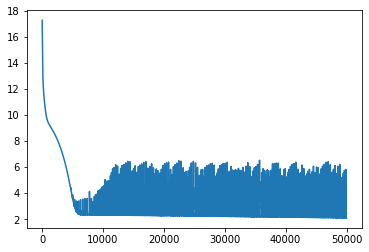

In [32]:
plt.figure()
plt.plot(np.log(history))
plt.show()

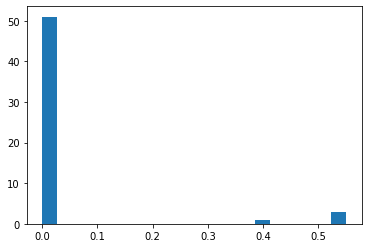

In [33]:
plt.figure()
plt.hist(abs(beta_opt),bins=20)
plt.show()

In [36]:
# Affichage du polynôme trouvé
print("\n🔹 Polynôme trouvé (avec contrainte) :")
equation = " + ".join(
    f"{1/0.390*coef:.3f}*{'*'.join(term)}" for coef, term in zip(beta_opt, poly_terms) if abs(coef) > .1
)

monomials = [f"{'*'.join(term)}" for coef, term in zip(beta_opt, poly_terms) if abs(coef) > .1]
print(f"P = {equation} ≈ 0")


🔹 Polynôme trouvé (avec contrainte) :
P = -1.412*x0 + 1.411*x0*x3 + -1.413*x1*x2*x3 + 1.000*x1*x3*x4 ≈ 0


In [40]:
x0 = X_full[:,0]
x1 = X_full[:,1]
x2 = X_full[:,2]
x3 = X_full[:,3]
x4 = X_full[:,4]

In [39]:
print(np.sum((-1.412*x0 + 1.411*x0*x3 + -1.413*x1*x2*x3 + 1.000*x1*x3*x4)**2))
print(np.sum((-2**.5*x0 + 2**.5*x0*x3 + -2**.5*x1*x2*x3 + 1*x1*x3*x4)**2))

0.6870364
0.001109621


In [52]:
print(np.sum(tf.linalg.matvec(X_poly_tf, beta)**2))
alpha * tf.abs(tf.reduce_sum(tf.abs(beta))-10) 

0.017851736


<tf.Tensor: shape=(), dtype=float32, numpy=7.9229455>

In [53]:
np.random.seed(42)
n_samples, n_features = 10000, 2 

history = []

indices = np.random.choice(X_full.shape[1], int(X_full.shape[1]/1000), replace=False)  # Sélection unique des indices

# Construction des features polynomiales
X_poly_1, poly_terms_1 = polynomial_features(X_full[indices,:], degree=5)

# Conversion en tenseurs TensorFlow
X_poly_tf_1 = tf.constant(X_poly_1, dtype=tf.float32)


In [54]:
# Initialisation des coefficients beta
beta_1 = tf.Variable(tf.random.uniform([X_poly_1.shape[1]], -1, 1), dtype=tf.float32)

history_1 = []
hist_beta_1 = []

In [55]:
#Paramètres de l'optimisation
alpha = 1  # Poids de la pénalité L1
learning_rate = 1e-2  # Taux d'apprentissage
num_epochs = 100000  # Nombre d'itérations
sum_all_beta = 10 

# Fonction de coût Lasso
def lasso_loss(beta):
    """Fonction de coût : ||Xβ||² + α(||β||_1-\lambda)"""
    error = tf.reduce_sum(tf.linalg.matvec(X_poly_tf_1, beta)**2)
    l1_penalty = alpha * tf.abs( tf.reduce_sum(tf.abs(beta))-sum_all_beta) 
    return error + l1_penalty

# Barre de progression
progress_bar = tqdm(total=num_epochs, desc="Optimisation en cours")

# Optimiseur (descente de gradient)
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Boucle d'entraînement
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = lasso_loss(beta_1)
    
    # Calcul des gradients et mise à jour
    gradients = tape.gradient(loss, [beta_1])
    optimizer.apply_gradients(zip(gradients, [beta_1]))

    # Mise à jour de la barre de progression
    progress_bar.update(1)
    history_1.append(loss)
    
    if epoch % 50 == 0: 
        hist_beta_1.append(beta_1.numpy())

progress_bar.close()

# Extraction des coefficients optimisés
beta_opt_1 = beta_1.numpy()

print(f"Optimisation terminée ✅")


Optimisation en cours: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [12:57<00:00, 128.67it/s]

Optimisation terminée ✅


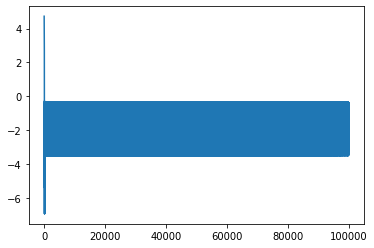

In [56]:
plt.figure()
plt.plot(np.log(history_1))
plt.show()

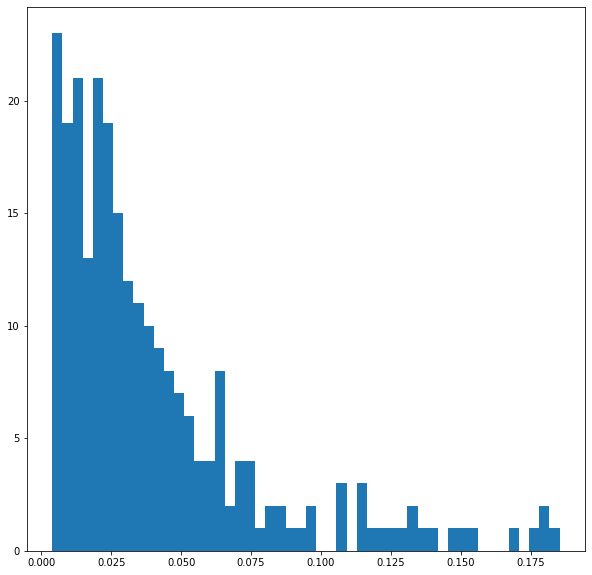

In [57]:
plt.figure(figsize=(10,10))
plt.hist(abs(beta_opt_1),bins=50)
plt.show()

In [58]:
# Affichage du polynôme trouvé
print("\n🔹 Polynôme trouvé (avec contrainte) :")
equation = " + ".join(
    f"{coef:.3f}*{'*'.join(term)}" for coef, term in zip(beta_opt_1, poly_terms_1) if abs(coef) > .001
)

monomials = [f"{'*'.join(term)}" for coef, term in zip(beta_opt_1, poly_terms_1) if abs(coef) > .001]
print(f"P = {equation} ≈ 0")


🔹 Polynôme trouvé (avec contrainte) :
P = 0.038*x0 + 0.034*x1 + -0.027*x2 + 0.074*x3 + -0.039*x4 + -0.034*x0*x0 + -0.025*x0*x1 + -0.076*x0*x2 + -0.013*x0*x3 + -0.005*x0*x4 + -0.115*x1*x1 + 0.040*x1*x2 + 0.011*x1*x3 + 0.073*x1*x4 + -0.009*x2*x2 + 0.016*x2*x3 + -0.177*x2*x4 + -0.049*x3*x3 + 0.014*x3*x4 + 0.030*x4*x4 + -0.115*x0*x0*x0 + 0.014*x0*x0*x1 + 0.015*x0*x0*x2 + 0.009*x0*x0*x3 + 0.025*x0*x0*x4 + -0.020*x0*x1*x1 + -0.030*x0*x1*x2 + 0.017*x0*x1*x3 + 0.048*x0*x1*x4 + -0.016*x0*x2*x2 + -0.006*x0*x2*x3 + -0.007*x0*x2*x4 + 0.019*x0*x3*x3 + 0.023*x0*x3*x4 + -0.019*x0*x4*x4 + -0.082*x1*x1*x1 + -0.028*x1*x1*x2 + -0.058*x1*x1*x3 + -0.030*x1*x1*x4 + 0.007*x1*x2*x2 + -0.053*x1*x2*x3 + -0.030*x1*x2*x4 + 0.018*x1*x3*x3 + 0.034*x1*x3*x4 + -0.034*x1*x4*x4 + -0.021*x2*x2*x2 + -0.007*x2*x2*x3 + -0.180*x2*x2*x4 + 0.135*x2*x3*x3 + 0.018*x2*x3*x4 + -0.123*x2*x4*x4 + -0.039*x3*x3*x3 + 0.028*x3*x3*x4 + 0.097*x3*x4*x4 + -0.057*x4*x4*x4 + 0.042*x0*x0*x0*x0 + -0.026*x0*x0*x0*x1 + 0.089*x0*x0*x0*x2 + 0.029

In [36]:
mask = (beta_opt_1)>0.001

In [39]:
np.sum(mask)
beta_opt_1.shape

(251,)

In [40]:
X_poly_2 = X_poly_1[:,mask]


# Conversion en tenseurs TensorFlow
X_poly_tf_2 = tf.constant(X_poly_2, dtype=tf.float32)

beta_2 = tf.Variable(beta_opt_1[mask], dtype=tf.float32)
history_2 = []

In [41]:
poly_terms_2 = []
for i in range(len(mask)):
    cond = mask[i]
    if cond : 
        poly_terms_2.append(poly_terms_1[i])

In [50]:
#Paramètres de l'optimisation
alpha = 1  # Poids de la pénalité L1
learning_rate = 1e-3  # Taux d'apprentissage
num_epochs = 10000  # Nombre d'itérations
sum_all_beta = 10 

# Fonction de coût Lasso
def lasso_loss(beta):
    """Fonction de coût : ||Xβ||² + α(||β||_1-\lambda)"""
    error = tf.reduce_sum(tf.linalg.matvec(X_poly_tf_2, beta)**2)
    l1_penalty = alpha * tf.abs( tf.reduce_sum(tf.abs(beta))-1.1572754)
    #l1_penalty = 
    return error + l1_penalty

# Barre de progression
progress_bar = tqdm(total=num_epochs, desc="Optimisation en cours")

# Optimiseur (descente de gradient)
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Boucle d'entraînement
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        loss = lasso_loss(beta_2)
    
    # Calcul des gradients et mise à jour
    gradients = tape.gradient(loss, [beta_2])
    optimizer.apply_gradients(zip(gradients, [beta_2]))

    # Mise à jour de la barre de progression
    progress_bar.update(1)
    history_2.append(loss)

progress_bar.close()

# Extraction des coefficients optimisés
beta_opt_2 = beta_2.numpy()

print(f"Optimisation terminée ✅")


Optimisation en cours: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:27<00:00, 114.48it/s]

Optimisation terminée ✅


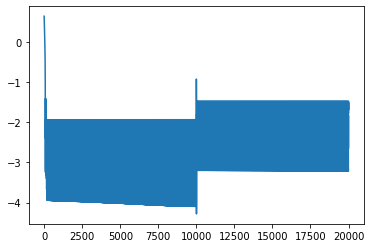

In [51]:
plt.figure()
plt.plot(np.log(history_2)/np.log(10))
plt.show()

In [52]:
# Affichage du polynôme trouvé
print("\n🔹 Polynôme trouvé (avec contrainte) :")
equation = " + ".join(
    f"{coef:.3f}*{'*'.join(term)}" for coef, term in zip(beta_opt_2, poly_terms_2) if abs(coef) > .005
)

monomials = [f"{'*'.join(term)}" for coef, term in zip(beta_opt_2, poly_terms_2) if abs(coef) > .005]
print(f"P = {equation} ≈ 0")


🔹 Polynôme trouvé (avec contrainte) :
P = 0.089*x2*x4 + 0.017*x0*x1*x1 + -0.010*x0*x3*x4 + 0.031*x2*x4*x4 + 0.048*x0*x0*x0*x3 + 0.055*x0*x1*x1*x1 + 0.023*x0*x1*x4*x4 + 0.062*x0*x2*x3*x3 + 0.022*x0*x2*x4*x4 + 0.029*x0*x3*x4*x4 + 0.008*x1*x1*x1*x3 + 0.055*x1*x1*x4*x4 + 0.044*x1*x2*x2*x3 + 0.035*x2*x2*x3*x3 + 0.014*x0*x0*x0*x0*x1 + 0.025*x0*x0*x1*x1*x4 + 0.057*x0*x1*x3*x3*x4 + 0.069*x0*x1*x4*x4*x4 + 0.016*x0*x2*x2*x3*x3 + 0.042*x1*x1*x1*x2*x3 + 0.087*x1*x2*x3*x3*x4 + 0.061*x1*x3*x4*x4*x4 + 0.027*x2*x2*x2*x2*x3 + 0.005*x2*x2*x2*x3*x4 + 0.014*x2*x2*x3*x3*x4 + -0.005*x3*x4*x4*x4*x4 ≈ 0


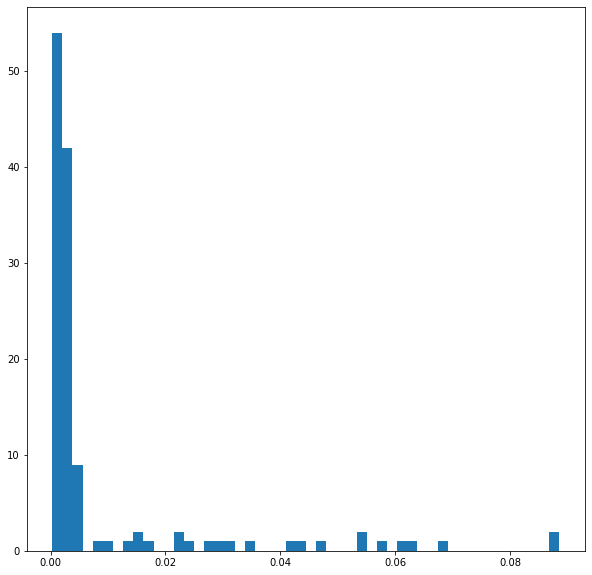

In [53]:
plt.figure(figsize=(10,10))
plt.hist(abs(beta_opt_2),bins=50)
plt.show()

In [318]:
np.sum((-0.149*x0*x1 + -0.149*x0*x0*x2 + -0.105*x0*x0*x4 + 0.149*x0*x1*x3 + -0.089*x0*x1*x4 + 0.055*x0*x2*x4 + 0.089*x0*x1*x3*x4 + -0.055*x0*x2*x3*x4 + 0.074*x0*x1*x3*x4*x4 + -0.089*x1*x1*x2*x3*x4 + 0.063*x1*x1*x3*x4*x4 + 0.055*x1*x2*x2*x3*x4 + -0.039*x1*x2*x3*x4*x4)**2)


0.028740557

In [10]:
####################################################################################################################
##################################### Implement the EQL type architecture ##########################################
####################################################################################################################

In [248]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense
import itertools
from tensorflow.keras.regularizers import Regularizer

class PairwiseProductLayer(Layer):
    def __init__(self, **kwargs):
        super(PairwiseProductLayer, self).__init__(**kwargs)

    def call(self, inputs):
        # Partie identité
        identity_part = inputs

        # squares of the inputs
        squares = [tf.expand_dims(inputs[:, i] ** 2, axis=1) for i in range(inputs.shape[1])]

        # prodcuts of the inputs 
        products = [tf.expand_dims(inputs[:, i] * inputs[:, j], axis=1) for i, j in itertools.combinations(range(inputs.shape[1]), 2)]

        # add all together
        output = tf.concat([identity_part] + squares + products, axis=1)
        return output

    def compute_output_shape(self, input_shape):
        n = input_shape[1]
        num_squares = n  # Un carré par élément
        num_products = (n * (n - 1)) // 2  # Nombre de produits croisés
        return (input_shape[0], n + num_squares + num_products)

import tensorflow as tf
from tensorflow.keras.layers import Layer
import itertools
from tensorflow.keras import backend as K
from collections import defaultdict

class WeightedPairwiseProductLayer(Layer):
    def __init__(self,n_var,pos_layer, **kwargs):
        super(WeightedPairwiseProductLayer, self).__init__(**kwargs)
        self.w = None
        self.n_var = n_var
        self.pos_layer = pos_layer
        self.to_remove = []
        
    def monomial(self):
        variables = [f"x{i}" for i in range(self.n_var)]
        prev_var = variables
        n_var_prev = len(variables)
        new_var = variables
        for i in range(self.pos_layer):
            if prev_var == self.n_var:
                identity_part = prev_var
                squares = [var1 + "*" + var1 for var1 in prev_var]
                products = [
                    prev_var[var1] + "*" + prev_var[var2] for (var1, var2) in itertools.combinations(range(len(prev_var)), 2)
                ]
                new_var = identity_part + squares + products
                prev_var = new_var
            else:
                identity_part = prev_var
                squares = [var1 + "*" + var1 for var1 in prev_var]
                products = [
                    prev_var[var1] + "*" + prev_var[var2] for (var1, var2) in itertools.combinations(range(len(prev_var)), 2)
                ]
                new_var = identity_part + squares + products
                prev_var = new_var
        return np.array(new_var)
    
    def remove_indices(self, lst, indices):
        return [val for i, val in enumerate(lst) if i not in set(indices)]

    def find_duplicate_indices(self):
        index_map = defaultdict(list)

        for i, val in enumerate(self.monomial()):
            index_map[val].append(i)
    
        return {key: indices for key, indices in index_map.items() if len(indices) > 1}
    
    def build(self, input_shape):
        dup = self.find_duplicate_indices()

        to_remove = []
        for i in dup.keys():
            to_remove += dup[i][1:]
            
        self.to_remove = to_remove
        n = len(self.remove_indices(list(self.monomial()),to_remove))
        self.output_dim = n 
        
        self.w = self.add_weight(
            shape=(n,), initializer="random_normal", trainable=True,
        )

    def call(self, inputs):
        # Partie identité pondérée
        identity_part = inputs 
        
        # Calcul des carrés pondérés
        squares = [tf.expand_dims(inputs[:,i] ** 2 , axis=1) for i in range(inputs.shape[1])]

        # Calcul des produits croisés pondérés
        products = [
            tf.expand_dims(inputs[:, i] * inputs[:, j] , axis=1)
            for (i, j) in itertools.combinations(range(inputs.shape[1]), 2)
        ]

        # Concaténer toutes les parties
        output_temp = tf.concat([identity_part] + squares + products, axis=1)
               
        to_keep = [i for i in range(output_temp.shape[1])] 
        to_keep = [i for i in to_keep if i not in self.to_remove]
        
        output = tf.gather(output_temp, to_keep, axis=1)
        output_weighted = output * self.w

        return output

    def compute_output_shape(self, input_shape):
        return (None,self.output_dim)

class ThresholdedL1Regularizer(Regularizer):
    def __init__(self, l1=0.01, threshold=1.0):
        self.l1 = l1  
        self.threshold = threshold  

    def __call__(self, weights):
        penalty = tf.maximum(tf.reduce_sum(tf.abs(weights)) - self.threshold, 0)
        return self.l1 * penalty  

    def get_config(self):  
        return {"l1": self.l1, "threshold": self.threshold}

#def lasso_loss(model, alpha=0.01, threshold=1.0):
#    def loss(y_true, y_pred):
#        regression_loss = tf.reduce_sum(tf.square(y_pred))  
#        
#        #print([w for layer in model.layers for w in layer.trainable_weights])
#        
#        weights_l1 = tf.add_n([tf.reduce_sum(tf.abs(w)) for layer in model.layers for w in layer.trainable_weights])
#
#        regularization = alpha * tf.maximum(weights_l1 - threshold, 0)
#
#        return regression_loss + regularization
#    return loss

def custom_loss(thres=0.1, lambd=0.01):
    
    def loss(y_true, y_pred):
        mse_loss = K.mean(K.square(y_true - y_pred))
        weights_penalty = 0
        
        for weight in model_cross_prod.trainable_weights:
            weights_penalty += K.sum(K.abs(K.abs(weight) - thres))
        
        return mse_loss + lambd * weights_penalty
    
    return loss



def factorial(n):
    if n == 1:
        return 1
    else: 
        return n*factorial(n-1)
def comb(k,n):
    return factorial(n)/(factorial(n-k)*factorial(k))

def dim_weighted_layer_depth(input_shape,depth):
    if depth == -1: 
        return 0
    else: 
        this_dim = input_shape
        for this_depth in range(depth): 
            int_dim = comb(2,this_dim) + 2*this_dim
            this_dim = int_dim
        return this_dim

In [249]:
x5dtf = tf.Variable(np.array([x_5d[:,0],
          x_5d[:,1],
          x_5d[:,2],
          np.exp(x_5d[:,3]),
          x_5d[:,4]]).T)

set_train, set_test = train_test_split(x5dtf.numpy(), test_size=0.1, random_state=1)

In [250]:
# Exemple d'utilisation dans un réseau de neurones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam

n_var  = 5 

def lr_schedule(epoch):
    if epoch < 200:
        return 0.01  
    else:
        return 0.001  

# Création du callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Création du modèle
model_cross_prod = Sequential([
    WeightedPairwiseProductLayer(input_shape = (5,),
                                 n_var = 5,
                                 pos_layer = 1),  
    WeightedPairwiseProductLayer(input_shape = (215,),
                                 n_var = 5,
                                 pos_layer = 2),
    Dense(1, 
          activation='linear', 
          use_bias=False, 
          kernel_regularizer=ThresholdedL1Regularizer(l1=1, threshold=10.0))  # Sortie 
])

# Compilation du modèle
optimizer = Adam(learning_rate=0.01)
#model_cross_prod.compile(optimizer=optimizer, loss=lasso_loss(model_cross_prod,0.1,10))
model_cross_prod.compile(optimizer=optimizer, loss=custom_loss(thres=1, lambd=0.1))

# Affichage du résumé
model_cross_prod.summary()

/var/folders/7f/2871v4nx3pn_dph55xj6sxq40000gn/T/ipykernel_27932/1608333236.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(WeightedPairwiseProductLayer, self).__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ weighted_pairwise_product_laye… │ (None, 20)             │            20 │
│ (WeightedPairwiseProductLayer)  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ weighted_pairwise_product_laye… │ (None, 215)            │           215 │
│ (WeightedPairwiseProductLayer)  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │           215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
for var in model_cross_prod.trainable_variables:
    print(var.name, var.shape)

variable_66 (20,)
variable_67 (215,)
kernel (215, 1)


In [252]:
history_cross_prod = model_cross_prod.fit(set_train,
                                          np.zeros(set_train.shape[0]),
                                          epochs=200,
                                          batch_size=10000,
                                          shuffle=True,
                                          validation_data=(set_test,set_test))#,
                                          #callbacks=[lr_scheduler])


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - loss: 46.6156 - val_loss: 41.6551
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 40.7503 - val_loss: 39.2674
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 38.4687 - val_loss: 37.3514
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 36.4024 - val_loss: 35.0450
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 34.2397 - val_loss: 33.0762
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 32.1959 - val_loss: 30.8252
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 29.9872 - val_loss: 28.8932
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27.9913 - val_loss: 26.6439
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 25.7169 - val_loss: 24.4418
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 23.5921 - val_loss: 22.3951
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.6184 - val_loss: 21.5037
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 

KeyboardInterrupt: 

In [ ]:
all_model = [model_cross_prod]
all_history = [history_cross_prod]
#all_model.append(model_cross_prod)
#all_history.append(history_cross_prod)

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(np.log(history_cross_prod.history["loss"])/np.log(10))
plt.plot(np.log(history_cross_prod.history["val_loss"])/np.log(10))
plt.show()

In [ ]:
last_layer_0 = all_model[0].layers[-1]
weights_last_layer_0 = last_layer_0.get_weights()


In [ ]:
plt.figure(figsize=(7,7))
plt.hist(weights_last_layer_0[0],bins=50)

plt.show()

In [314]:
#x10 x2 x8 - Sqrt[2] (x1 - x1 x8 + x2 x4 x8) == 0

In [315]:
np.sum((x_5d[:,4] * x_5d[:,1] * np.exp(x_5d[:,3]) - 2**.5 * x_5d[:,0] + 2**.5 * x_5d[:,0] * np.exp(x_5d[:,3]) - 2**.5 *x_5d[:,1]*x_5d[:,2]*np.exp(x_5d[:,3]))**2)


3.1562563e-06

In [156]:
def monomial(n_var,n_layers):
    variables = [f"x{i}" for i in range(n_var)]
    prev_var = variables
    n_var_prev = len(variables)
    new_var = variables
    for i in range(n_layers):
        if prev_var == n_var:
            identity_part = prev_var
            squares = [var1 + "*" + var1 for var1 in prev_var]
            products = [
                prev_var[var1] + "*" + prev_var[var2] for (var1, var2) in itertools.combinations(range(len(prev_var)), 2)
            ]
            new_var = identity_part + squares + products
            prev_var = new_var
        else:
            identity_part = prev_var
            squares = [var1 + "*" + var1 for var1 in prev_var]
            products = [
                prev_var[var1] + "*" + prev_var[var2] for (var1, var2) in itertools.combinations(range(len(prev_var)), 2)
            ]
            new_var = identity_part + squares + products
            prev_var = new_var
    return np.array(new_var)

In [157]:
mask = abs(weights_last_layer_0[0]) > 0.5

pol = ""
for i in range(np.sum(mask)):
    pol += monomial(5,2)[mask[:,0]][i] + " * " + str(weights_last_layer_0[0][mask][i]) + " + "
    

In [158]:
monomial(2,0)

array(['x0', 'x1'], dtype='<U2')

In [159]:
monomial(2,1)

array(['x0', 'x1', 'x0*x0', 'x1*x1', 'x0*x1'], dtype='<U5')

In [160]:
monomial(2,2)

array(['x0', 'x1', 'x0*x0', 'x1*x1', 'x0*x1', 'x0*x0', 'x1*x1',
       'x0*x0*x0*x0', 'x1*x1*x1*x1', 'x0*x1*x0*x1', 'x0*x1', 'x0*x0*x0',
       'x0*x1*x1', 'x0*x0*x1', 'x1*x0*x0', 'x1*x1*x1', 'x1*x0*x1',
       'x0*x0*x1*x1', 'x0*x0*x0*x1', 'x1*x1*x0*x1'], dtype='<U11')

In [161]:
monomial(2,3)

array(['x0', 'x1', 'x0*x0', 'x1*x1', 'x0*x1', 'x0*x0', 'x1*x1',
       'x0*x0*x0*x0', 'x1*x1*x1*x1', 'x0*x1*x0*x1', 'x0*x1', 'x0*x0*x0',
       'x0*x1*x1', 'x0*x0*x1', 'x1*x0*x0', 'x1*x1*x1', 'x1*x0*x1',
       'x0*x0*x1*x1', 'x0*x0*x0*x1', 'x1*x1*x0*x1', 'x0*x0', 'x1*x1',
       'x0*x0*x0*x0', 'x1*x1*x1*x1', 'x0*x1*x0*x1', 'x0*x0*x0*x0',
       'x1*x1*x1*x1', 'x0*x0*x0*x0*x0*x0*x0*x0',
       'x1*x1*x1*x1*x1*x1*x1*x1', 'x0*x1*x0*x1*x0*x1*x0*x1',
       'x0*x1*x0*x1', 'x0*x0*x0*x0*x0*x0', 'x0*x1*x1*x0*x1*x1',
       'x0*x0*x1*x0*x0*x1', 'x1*x0*x0*x1*x0*x0', 'x1*x1*x1*x1*x1*x1',
       'x1*x0*x1*x1*x0*x1', 'x0*x0*x1*x1*x0*x0*x1*x1',
       'x0*x0*x0*x1*x0*x0*x0*x1', 'x1*x1*x0*x1*x1*x1*x0*x1', 'x0*x1',
       'x0*x0*x0', 'x0*x1*x1', 'x0*x0*x1', 'x0*x0*x0', 'x0*x1*x1',
       'x0*x0*x0*x0*x0', 'x0*x1*x1*x1*x1', 'x0*x0*x1*x0*x1', 'x0*x0*x1',
       'x0*x0*x0*x0', 'x0*x0*x1*x1', 'x0*x0*x0*x1', 'x0*x1*x0*x0',
       'x0*x1*x1*x1', 'x0*x1*x0*x1', 'x0*x0*x0*x1*x1', 'x0*x0*x0*x0*x1',
       'x0

In [162]:
from collections import defaultdict

def find_duplicate_indices(lst):
    index_map = defaultdict(list)

    # Stocker les indices de chaque élément
    for i, val in enumerate(lst):
        index_map[val].append(i)

    # Filtrer pour ne garder que les éléments ayant des doublons
    return {key: indices for key, indices in index_map.items() if len(indices) > 1}



In [163]:
def remove_indices(lst, indices):
    return [val for i, val in enumerate(lst) if i not in set(indices)]

In [164]:
n_var = 5
n_layer = 2
dup = find_duplicate_indices(monomial(n_var,n_layer))

to_remove = []
for i in dup.keys():
    to_remove += dup[i][1:]

print(len(remove_indices(list(monomial(n_var,n_layer)),to_remove)))
print(len(list(monomial(n_var,n_layer))))

215
230


In [166]:
n_var = 5
n_layer = 2
dup = find_duplicate_indices(monomial(n_var,n_layer))

to_remove = []
for i in dup.keys():
    to_remove += dup[i][1:]

monomials_5_2 = remove_indices(list(monomial(n_var,n_layer)),to_remove)

In [178]:
S = ''
for i in range(215): 
    S += monomials_5_2[i] + " * " + str(weights_last_layer_0[0][i][0]) + ' + '

In [179]:
S

'x0 * 0.037173256 + x1 * 0.07132764 + x2 * 0.005368128 + x3 * 0.012701509 + x4 * 0.027456528 + x0*x0 * 0.016789034 + x1*x1 * 0.020637559 + x2*x2 * 0.033524107 + x3*x3 * -0.032779984 + x4*x4 * -0.03262914 + x0*x1 * 0.057838976 + x0*x2 * 0.03401708 + x0*x3 * 0.07568583 + x0*x4 * 0.07523611 + x1*x2 * 0.02172254 + x1*x3 * -0.040962275 + x1*x4 * 0.0025314777 + x2*x3 * -0.013631957 + x2*x4 * -0.0011641297 + x3*x4 * -0.06282193 + x0*x0*x0*x0 * -0.0011399027 + x1*x1*x1*x1 * 0.00041112467 + x2*x2*x2*x2 * -0.013681195 + x3*x3*x3*x3 * -0.009222892 + x4*x4*x4*x4 * -0.00573681 + x0*x1*x0*x1 * 0.08580266 + x0*x2*x0*x2 * 0.061270364 + x0*x3*x0*x3 * 0.08611026 + x0*x4*x0*x4 * -0.009819633 + x1*x2*x1*x2 * 0.009059821 + x1*x3*x1*x3 * -0.08736499 + x1*x4*x1*x4 * -0.05581449 + x2*x3*x2*x3 * -0.07358822 + x2*x4*x2*x4 * 0.020592025 + x3*x4*x3*x4 * -0.070390366 + x0*x0*x0 * -0.0008190421 + x0*x1*x1 * 0.0022455584 + x0*x2*x2 * -0.068446495 + x0*x3*x3 * -0.15800385 + x0*x4*x4 * 0.020709433 + x0*x0*x1 * -0.0013

In [ ]:
####################################################################################################################
##################################### Implement the EQL type architecture 2.0 ######################################
####################################################################################################################

In [3]:
x_5d = np.load('Points_02_04_25_m2p2init.npy')

In [294]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Input, Activation, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints
import numpy as np
from tensorflow.keras.optimizers import Adam
import re
import sympy as sp
import matplotlib.pyplot as plt
import time

def simplify_expressions(expression_list):
    variables = {f'x{i}': sp.symbols(f'x{i}') for i in range(10)}  
    
    simplified_expressions = []
    
    for expression_str in expression_list:
        try:
            sympy_expr = sp.sympify(expression_str, locals=variables)
            simplified_expr = sp.simplify(sympy_expr)
            simplified_expressions.append(simplified_expr)
        except Exception as e:
            print(f"Erreur lors de la simplification de {expression_str}: {e}")
            simplified_expressions.append(None)
    
    return simplified_expressions

class PolynomialExpansionLayerUniqueNoCopy(Layer):
    """
    Couche Keras personnalisée qui calcule tous les produits par paires
    *uniques* (y compris les carrés) des caractéristiques d'entrée.
    Cette version ne renvoie QUE les produits calculés, pas les entrées originales.

    Input shape: (batch_size, n_features_in)
    Output shape: (batch_size, n_features_in * (n_features_in + 1) // 2)
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.n_features_in = None
        self.n_features_out = None  # Représente directement le nombre de produits
        # self.num_product_features = None # Plus nécessaire car n_features_out le remplace
        self.indices_i = None
        self.indices_j = None

    def build(self, input_shape):
        if not isinstance(input_shape, tf.TensorShape):
             input_shape = tf.TensorShape(input_shape)
        if input_shape[-1] is None:
            raise ValueError("La dernière dimension de l'input ne peut pas être None.")

        self.n_features_in = int(input_shape[-1])
        # La taille de sortie est juste le nombre de produits uniques
        self.n_features_out = self.n_features_in * (self.n_features_in + 1) // 2

        indices_i_list = []
        indices_j_list = []
        # Génère les paires d'indices (i, j) où i <= j
        for i in range(self.n_features_in):
            for j in range(i, self.n_features_in):
                indices_i_list.append(i)
                indices_j_list.append(j)
        self.indices_i = tf.constant(indices_i_list, dtype=tf.int32)
        self.indices_j = tf.constant(indices_j_list, dtype=tf.int32)

        super().build(input_shape) # Important d'appeler à la fin

    def call(self, inputs):
        # Récupère les caractéristiques pour les paires (i, j)
        features_i = tf.gather(inputs, self.indices_i, axis=1)
        features_j = tf.gather(inputs, self.indices_j, axis=1)
        # Calcule les produits
        products = features_i * features_j
        # Retourne UNIQUEMENT les produits
        return products

    def compute_output_shape(self, input_shape):
        if not isinstance(input_shape, tf.TensorShape):
            input_shape = tf.TensorShape(input_shape)
        input_shape_list = input_shape.as_list()
        batch_size = input_shape_list[0] # Peut être None

        # Calcule n_features_out si ce n'est pas déjà fait (par build)
        # ou si la dimension d'entrée est connue
        calculated_n_features_out = None
        if input_shape_list[-1] is not None:
            n_features_in = int(input_shape_list[-1])
            # La sortie ne contient que les produits
            calculated_n_features_out = n_features_in * (n_features_in + 1) // 2

        # Utilise la valeur de self.n_features_out (calculée dans build) si disponible,
        # sinon utilise celle calculée ici.
        if self.n_features_out is not None:
            final_n_features_out = self.n_features_out
        else:
             final_n_features_out = calculated_n_features_out # Peut être None si input_shape[-1] est None

        output_shape = (batch_size, final_n_features_out)
        return tf.TensorShape(output_shape)

    def get_config(self):
        # Pas de paramètres de configuration supplémentaires à sauvegarder
        config = super().get_config()
        return config

class CrossProductLayer(Layer):
    """
    Couche Keras qui calcule tous les produits croisés entre deux tenseurs d'entrée.
    Input: Une liste de deux tenseurs [tensor_a, tensor_b]
           tensor_a shape: (batch_size, n_features_a)
           tensor_b shape: (batch_size, n_features_b)
    Output shape: (batch_size, n_features_a * n_features_b)
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.n_features_a = None
        self.n_features_b = None

    def build(self, input_shape):
        if not isinstance(input_shape, list) or len(input_shape) != 2:
            raise ValueError('L\'entrée de CrossProductLayer doit être une liste de deux tenseurs.')

        shape_a = tf.TensorShape(input_shape[0])
        shape_b = tf.TensorShape(input_shape[1])

        if shape_a[-1] is None or shape_b[-1] is None:
            raise ValueError("La dernière dimension des deux entrées ne peut pas être None.")

        self.n_features_a = int(shape_a[-1])
        self.n_features_b = int(shape_b[-1])

        # Pas de poids à créer pour cette couche
        super().build(input_shape)

    def call(self, inputs):
        if not isinstance(inputs, list) or len(inputs) != 2:
            raise ValueError('L\'entrée de CrossProductLayer doit être une liste de deux tenseurs.')
        tensor_a, tensor_b = inputs

        # Utiliser le broadcasting pour calculer tous les produits croisés
        # Expand tensor_a: (batch, n_a) -> (batch, n_a, 1)
        a_expanded = tf.expand_dims(tensor_a, axis=2)
        # Expand tensor_b: (batch, n_b) -> (batch, 1, n_b)
        b_expanded = tf.expand_dims(tensor_b, axis=1)

        # Multiplication broadcastée: (batch, n_a, 1) * (batch, 1, n_b) -> (batch, n_a, n_b)
        products = a_expanded * b_expanded

        # Aplatir les deux dernières dimensions pour obtenir la sortie désirée
        # (batch, n_a, n_b) -> (batch, n_a * n_b)
        output_shape = tf.shape(products) # Obtenir la shape dynamique
        batch_size = output_shape[0]
        # Utiliser -1 pour inférer automatiquement la taille aplatie
        output = tf.reshape(products, [batch_size, -1])

        return output

    def compute_output_shape(self, input_shape):
        if not isinstance(input_shape, list) or len(input_shape) != 2:
            raise ValueError('L\'entrée de CrossProductLayer doit être une liste de deux tenseurs.')

        shape_a = tf.TensorShape(input_shape[0]).as_list()
        shape_b = tf.TensorShape(input_shape[1]).as_list()

        batch_size = shape_a[0] # Assume batch sizes match

        if shape_a[-1] is None or shape_b[-1] is None:
             output_features = None
        else:
            output_features = shape_a[-1] * shape_b[-1]

        return tf.TensorShape([batch_size, output_features])

    def get_config(self):
        # Pas de configuration spécifique autre que celle de base
        config = super().get_config()
        return config
    
class PolynomialExpansionLayerUnique(Layer):
    """
    Couche Keras personnalisée qui étend les caractéristiques en ajoutant
    tous les produits par paires *uniques* (y compris les carrés)
    des caractéristiques d'entrée.
    Input shape: (batch_size, n_features_in)
    Output shape: (batch_size, n_features_in + n_features_in * (n_features_in + 1) // 2)
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.n_features_in = None
        self.n_features_out = None
        self.num_product_features = None
        self.indices_i = None
        self.indices_j = None

    def build(self, input_shape):
        if not isinstance(input_shape, tf.TensorShape):
             input_shape = tf.TensorShape(input_shape)
        if input_shape[-1] is None:
            raise ValueError("La dernière dimension de l'input ne peut pas être None.")
        self.n_features_in = int(input_shape[-1])
        self.num_product_features = self.n_features_in * (self.n_features_in + 1) // 2
        self.n_features_out = self.n_features_in + self.num_product_features
        indices_i_list = []
        indices_j_list = []
        for i in range(self.n_features_in):
            for j in range(i, self.n_features_in):
                indices_i_list.append(i)
                indices_j_list.append(j)
        self.indices_i = tf.constant(indices_i_list, dtype=tf.int32)
        self.indices_j = tf.constant(indices_j_list, dtype=tf.int32)
        super().build(input_shape)

    def call(self, inputs):
        features_i = tf.gather(inputs, self.indices_i, axis=1)
        features_j = tf.gather(inputs, self.indices_j, axis=1)
        products = features_i * features_j
        output = tf.concat([inputs, products], axis=1)
        return output

    def compute_output_shape(self, input_shape):
        if not isinstance(input_shape, tf.TensorShape):
            input_shape = tf.TensorShape(input_shape)
        input_shape_list = input_shape.as_list()
        batch_size = input_shape_list[0]
        if self.n_features_out is None and input_shape_list[-1] is not None:
            n_features_in = int(input_shape_list[-1])
            num_product_features = n_features_in * (n_features_in + 1) // 2
            n_features_out = n_features_in + num_product_features
        elif self.n_features_out is not None:
            n_features_out = self.n_features_out
        else:
            n_features_out = None
        output_shape = (batch_size, n_features_out)
        return tf.TensorShape(output_shape)

    def get_config(self):
        config = super().get_config()
        return config

class FeatureWiseDenseLayer(Layer):
    """
    Applique une transformation dense (poids + biais + activation)
    indépendamment à chaque caractéristique en entrée.
    Input shape: (batch_size, n_features)
    Output shape: (batch_size, n_features)
    """
    def __init__(self, activation=None, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs):
        super().__init__(activity_regularizer=activity_regularizer, **kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = None
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = None
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = None
        self.kernel = None
        self.bias = None

    def build(self, input_shape):
        if not isinstance(input_shape, tf.TensorShape):
            input_shape = tf.TensorShape(input_shape)
        if input_shape[-1] is None:
            raise ValueError("La dernière dimension de l'input ne peut pas être None pour build.")
        num_features = int(input_shape[-1])
        self.kernel = self.add_weight(name='kernel', shape=(num_features,), initializer=self.kernel_initializer, regularizer=self.kernel_regularizer, constraint=self.kernel_constraint, dtype=self.dtype, trainable=True)
        self.bias = None
        #self.bias = self.add_weight(name='bias', shape=(num_features,), initializer=self.bias_initializer, regularizer=self.bias_regularizer, constraint=self.bias_constraint, dtype=self.dtype, trainable=True)
        super().build(input_shape)

    def call(self, inputs):
        output = inputs * self.kernel #+ self.bias
        if self.activation is not None:
            output = self.activation(output)
        return output

    def compute_output_shape(self, input_shape):
        return tf.TensorShape(input_shape)

    def get_config(self):
        config = super().get_config()
        config.update({
            'activation': tf.keras.activations.serialize(self.activation),
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint),
        })
        return config
    
class FeatureWiseDenseLayerFixedFirst(Layer):
    """
    Applique une transformation dense (poids + activation)
    indépendamment à chaque caractéristique en entrée.
    Le poids associé à la *première* caractéristique est fixé à 0
    et n'est pas entraînable. Le biais est désactivé.

    Input shape: (batch_size, n_features)
    Output shape: (batch_size, n_features)
    """
    def __init__(self,
                 activation=None,
                 kernel_initializer='glorot_uniform',
                 # Pas de bias_initializer car le biais est désactivé
                 kernel_regularizer=None,
                 # Pas de bias_regularizer
                 activity_regularizer=None,
                 kernel_constraint=None,
                 # Pas de bias_constraint
                 **kwargs):
        super().__init__(activity_regularizer=activity_regularizer, **kwargs)
        self.activation = tf.keras.activations.get(activation)
        # Ces paramètres s'appliqueront à la partie *entraînable* du kernel
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)

        # Variables pour stocker les poids (seront créées dans build)
        self.zero_kernel = None      # Poids non entraînable pour le feature 0
        self.trainable_kernel = None # Poids entraînable pour les features 1 à n-1
        self.num_features = None     # Pour stocker le nombre de features

    def build(self, input_shape):
        if not isinstance(input_shape, tf.TensorShape):
            input_shape = tf.TensorShape(input_shape)
        if input_shape[-1] is None:
            raise ValueError("La dernière dimension de l'input ne peut pas être None pour build.")

        self.num_features = int(input_shape[-1])
        if self.num_features < 1:
             raise ValueError("Le nombre de features en entrée doit être au moins 1.")

        # 1. Créer le poids non entraînable pour le premier feature
        #    Utiliser add_weight est la bonne pratique même pour les non-entraînables
        self.zero_kernel = self.add_weight(
            name='zero_kernel',
            shape=(1,),
            initializer=initializers.Zeros(), # Initialisé à zéro
            trainable=False,                  # Non entraînable
            dtype=self.dtype
            # Pas de regularizer/constraint nécessaire pour un poids fixe
        )

        # 2. Créer les poids entraînables pour les features restants (s'il y en a)
        if self.num_features > 1:
            self.trainable_kernel = self.add_weight(
                name='trainable_kernel',
                shape=(self.num_features - 1,), # Taille n-1
                initializer=self.kernel_initializer,
                regularizer=self.kernel_regularizer,
                constraint=self.kernel_constraint,
                dtype=self.dtype,
                trainable=True # Entraînable (par défaut)
            )
        else:
            # S'il n'y a qu'un seul feature, il n'y a pas de partie entraînable
            self.trainable_kernel = None

        super().build(input_shape) # Appel final important

    def call(self, inputs):
        # Reconstruire le kernel complet
        if self.num_features == 1:
            # Si un seul feature, le kernel est juste [0.]
            effective_kernel = self.zero_kernel
        else:
            # Concaténer le zéro fixe et la partie entraînable
            effective_kernel = tf.concat([self.zero_kernel, self.trainable_kernel], axis=0)
            # Assurer la bonne shape si l'input a plus de 2 dimensions (e.g., séquences)
            # Reshape pour le broadcasting : (1, num_features) ou (1, 1, num_features) etc.
            kernel_shape = [1] * (len(inputs.shape) - 1) + [self.num_features]
            effective_kernel = tf.reshape(effective_kernel, kernel_shape)


        # Appliquer la multiplication élément par élément
        # Le broadcasting de TensorFlow s'assure que chaque feature est
        # multiplié par le poids correspondant du kernel.
        output = inputs * effective_kernel
        # Le biais est désactivé (pas de + self.bias)

        if self.activation is not None:
            output = self.activation(output)
        return output

    def compute_output_shape(self, input_shape):
        # La forme de sortie est identique à la forme d'entrée
        return tf.TensorShape(input_shape)

    def get_config(self):
        config = super().get_config()
        # Mettre à jour avec les paramètres pertinents (pour la partie entraînable)
        config.update({
            'activation': tf.keras.activations.serialize(self.activation),
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            # Pas besoin de sauvegarder les paramètres de biais
        })
        return config

class SumLayer(Layer):
    """
    Couche Keras qui somme les caractéristiques le long du dernier axe.
    N'a pas de poids, de biais, ni d'activation.

    Input shape: (batch_size, n_features)
    Output shape: (batch_size, 1)
    """
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        # Pas de poids à créer
        super().build(input_shape) # Important pour marquer comme construite

    def call(self, inputs):
        # Somme le long du dernier axe (axe des caractéristiques)
        # keepdims=True pour garder une dimension de taille 1 (output shape (batch, 1))
        return tf.reduce_sum(inputs, axis=-1, keepdims=True)

    def compute_output_shape(self, input_shape):
        input_shape = tf.TensorShape(input_shape).as_list()
        # La forme de sortie a 1 seule caractéristique
        output_shape = (input_shape[0], 1)
        return tf.TensorShape(output_shape)

    def get_config(self):
        # Pas de configuration spécifique à sauvegarder
        config = super().get_config()
        return config

class WeightsNormRegularizer(regularizers.Regularizer):
    """
    Régulariseur qui pénalise l'écart de la norme L2 des poids par rapport à une cible.
    Loss = strength * (sqrt(sum(w^2)) - target_norm)^2
    Alternative: Loss = strength * (sum(w^2) - target_sum_sq)^2
    """
    def __init__(self, strength=0.01, target_sum_sq=1.0):
        self.strength = tf.keras.backend.cast_to_floatx(strength)
        self.target_sum_sq = tf.keras.backend.cast_to_floatx(target_sum_sq)
        if self.target_sum_sq <= 0:
             raise ValueError("target_sum_sq doit être positif.")

    def __call__(self, weights):
        """Calcule la perte de régularisation."""
        sum_of_squares = tf.reduce_sum(tf.square(weights))
        regularization_loss = self.strength * tf.square(sum_of_squares - self.target_sum_sq)
        return regularization_loss

    def get_config(self):
        return {'strength': float(self.strength), 'target_sum_sq': float(self.target_sum_sq)}
    
class WeightsNormRegularizerInv(regularizers.Regularizer):
    """
    Régulariseur qui pénalise l'écart de la norme L2 des poids par rapport à une cible.
    Loss = strength / (sqrt(sum(w^2))
    """
    def __init__(self, strength=0.01):
        self.strength = tf.keras.backend.cast_to_floatx(strength)
        #self.target_sum_sq = tf.keras.backend.cast_to_floatx(target_sum_sq)
        #if self.target_sum_sq <= 0:
        #     raise ValueError("target_sum_sq doit être positif.")

    def __call__(self, weights):
        """Calcule la perte de régularisation."""
        sum_of_squares = tf.reduce_sum(tf.square(weights))
        regularization_loss = self.strength / tf.square(sum_of_squares)
        return regularization_loss

    def get_config(self):
        return {'strength': float(self.strength)}


In [214]:
x_5d.shape

(100000, 5)

In [215]:
data = x_5d[:10000,:]

In [296]:
if __name__ == "__main__":
    start = time.time()
    
    
    #####
    #n_samples = 10000
    #n_variables = 5
    #n_features = n_variables# + 1
    
    #print(f"Préparation des données: {n_samples} points, {n_features} variables.")
    #indices = np.random.choice(x_5d.shape[0], n_samples, replace=False)  # Sélection unique des indices
    #data_raw = x_5d[indices,:]
    ##data_raw = x_5d
    #num_rows = data_raw.shape[0]
    #ones_column = np.ones((num_rows, 1))

    #data = np.concatenate((ones_column, data_raw), axis=1)
    
    #y_target = np.zeros((n_samples, 1), dtype=np.float32)

    #input_layer = Input(shape=(n_features,), name="Input_Variables")
    #poly_expansion_1 = PolynomialExpansionLayerUniqueNoCopy(name="Polynomial_Expansion_1")(input_layer)
    
    #weight_regularizer = WeightsNormRegularizer(strength=1e-2,target_sum_sq=25)
    #weight_regularizer = WeightsNormRegularizerInv(strength=1e-2)
    #feature_scaling_1 = FeatureWiseDenseLayer(
    #    kernel_regularizer=weight_regularizer, 
    #    name="Polynomial_Coefficients_1"
    #)(poly_expansion_1)
    
    ##poly_expansion_2 = PolynomialExpansionLayerUniqueNoCopy(name="Polynomial_Expansion_2")(poly_expansion_1)
    
    #feature_scaling = FeatureWiseDenseLayerFixedFirst(
    #    kernel_regularizer=weight_regularizer, 
    #    name="Polynomial_Coefficients"
    #)(poly_expansion_2)
    
    #output_layer = SumLayer(name="Polynomial_Output")(feature_scaling)

    #model = Model(inputs=input_layer, outputs=output_layer)
    #####
    
    n_features = 5 
    n_samples = 10000
    input_layer = Input(shape=(n_features,), name="Input_Deg1")

    terms_deg1 = input_layer
    terms_deg2 = PolynomialExpansionLayerUniqueNoCopy(name="Products_Deg2")(terms_deg1)
    terms_deg3 = CrossProductLayer(name="CrossProducts_Deg3")([terms_deg1, terms_deg2])
    terms_deg4 = PolynomialExpansionLayerUniqueNoCopy(name="Products_Deg4")(terms_deg2)

    concatenate_layer = Concatenate(name="Concat_Deg1_Deg2_Deg3_Deg4")([
        terms_deg1,
        terms_deg2,
        terms_deg3,
        terms_deg4
    ])

    weight_regularizer = WeightsNormRegularizerInv(strength=1e-2)
    feature_scaling = FeatureWiseDenseLayer(
        kernel_regularizer=weight_regularizer, 
        name="Polynomial_Coefficients"
    )(concatenate_layer)

    output_layer = SumLayer(name="Polynomial_Output")(feature_scaling)
    # Créer le modèle d'expansion
    
    expansion_model = Model(inputs=input_layer, outputs=output_layer, name="Polynomial_Expansion_Model")
    expansion_model.summary()
    optimizer = Adam(learning_rate=1e-3)
    expansion_model.compile(optimizer=optimizer, loss='mse')

    print(f"Préparation des données: {n_samples} points, {n_features} variables.")
    indices = np.random.choice(x_5d.shape[0], n_samples, replace=False)  # Sélection unique des indices
    data = x_5d[indices,:]
    y_target = np.zeros((n_samples, 1), dtype=np.float32)
    
    print("\nDébut de l'entraînement...")
    epochs = 1000
    batch_size = int(n_samples/10)
    history = expansion_model.fit(
        data,
        y_target,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )
    print("Entraînement terminé.")
    end = time.time()
    total_time = end - start
    hours = int(int(total_time//60)//60)
    minutes = int(total_time//60-hours * 60)
    secondes = int(total_time%60)
    print(f"Total training time : {hours}h {minutes}m {secondes}s")
    

Model: "Polynomial_Expansion_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Deg1          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Products_Deg2       │ (None, 15)        │          0 │ Input_Deg1[0][0]  │
│ (PolynomialExpansi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CrossProducts_Deg3  │ (None, 75)        │          0 │ Input_Deg1[0][0], │
│ (CrossProductLayer) │                   │            │ Products_Deg2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Products_Deg4       │ (None, 120)       │          0 │ Products_Deg2[0]… │
│ (PolynomialExpansi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concat_Deg1_Deg2_D… │ (None, 215)       │          0 │ Input_Deg1[0][0], │
│ (Concatenate)       │                   │            │ Products_Deg2[0]… │
│                     │                   │            │ CrossProducts_De… │
│                     │                   │            │ Products_Deg4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Polynomial_Coeffic… │ (None, 215)       │        215 │ Concat_Deg1_Deg2… │
│ (FeatureWiseDenseL… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Polynomial_Output   │ (None, 1)         │          0 │ Polynomial_Coeff… │
│ (SumLayer)          │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 215 (860.00 B)

 Trainable params: 215 (860.00 B)

 Non-trainable params: 0 (0.00 B)

Préparation des données: 10000 points, 5 variables.

Début de l'entraînement...
Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.6019 - val_loss: 1.9852
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5672 - val_loss: 1.3348
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9628 - val_loss: 0.9751
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7124 - val_loss: 0.7127
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5014 - val_loss: 0.5259
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3850 - val_loss: 0.3909
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2868 - val_loss: 0.2985
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2233 - val_loss: 0.2416
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1751 - val_loss: 0.2018
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1483 - val_loss: 0.1734
Epoch 11/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1326 - val_loss: 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - val_loss: 0.0162
Epoch 70/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - val_loss: 0.0160
Epoch 71/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - val_loss: 0.0154
Epoch 72/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0152
Epoch 73/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - val_loss: 0.0146
Epoch 74/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - val_loss: 0.0145
Epoch 75/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - val_loss: 0.0143
Epoch 76/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - val_loss: 0.0137
Epoch 77/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0136
Epoch 78/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0133
Epoch 79/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - val_loss: 0.0132
Epoch 80/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 138/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 139/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 140/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 141/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 142/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 143/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 144/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 145/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 146/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 147/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 148/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 206/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 207/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 208/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 209/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 210/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 211/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 212/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 213/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 214/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 215/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 216/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 274/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 275/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 276/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 277/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 278/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 279/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 280/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 281/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 282/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 283/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 284/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 -

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 342/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 343/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 344/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 345/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 346/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 347/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 348/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 349/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 350/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 351/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 352/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 410/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9645e-04 - val_loss: 0.0010
Epoch 411/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9591e-04 - val_loss: 0.0010
Epoch 412/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 413/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 414/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9828e-04 - val_loss: 0.0010
Epoch 415/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9204e-04 - val_loss: 9.7414e-04
Epoch 416/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5556e-04 - val_loss: 0.0010
Epoch 417/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7915e-04 - val_loss: 9.6945e-04
Epoch 418/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5368e-04 - val_loss: 9.7481e-04
Epoch 419/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5519e-04 - val_loss: 9.7427e-04
Epoch 420/1000
9/9 ━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0296e-04 - val_loss: 7.9526e-04
Epoch 474/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7634e-04 - val_loss: 7.9233e-04
Epoch 475/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8932e-04 - val_loss: 7.9047e-04
Epoch 476/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8811e-04 - val_loss: 8.1301e-04
Epoch 477/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3037e-04 - val_loss: 8.3270e-04
Epoch 478/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3314e-04 - val_loss: 8.4496e-04
Epoch 479/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4514e-04 - val_loss: 8.4443e-04
Epoch 480/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5530e-04 - val_loss: 8.3854e-04
Epoch 481/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8169e-04 - val_loss: 8.6920e-04
Epoch 482/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6531e-04 - val_loss: 8.8248e-04
Epoch 483/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5073e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.6487e-04 - val_loss: 6.6512e-04
Epoch 538/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6151e-04 - val_loss: 6.4623e-04
Epoch 539/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4903e-04 - val_loss: 6.5592e-04
Epoch 540/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5713e-04 - val_loss: 6.6258e-04
Epoch 541/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4668e-04 - val_loss: 6.4033e-04
Epoch 542/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4977e-04 - val_loss: 6.4617e-04
Epoch 543/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4688e-04 - val_loss: 6.5631e-04
Epoch 544/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5120e-04 - val_loss: 6.4575e-04
Epoch 545/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4078e-04 - val_loss: 6.4444e-04
Epoch 546/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3423e-04 - val_loss: 6.3374e-04
Epoch 547/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3625e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5701e-04 - val_loss: 5.7300e-04
Epoch 602/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5753e-04 - val_loss: 5.5613e-04
Epoch 603/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3948e-04 - val_loss: 5.6944e-04
Epoch 604/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5139e-04 - val_loss: 5.5221e-04
Epoch 605/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3157e-04 - val_loss: 5.7086e-04
Epoch 606/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5665e-04 - val_loss: 5.4567e-04
Epoch 607/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6615e-04 - val_loss: 5.4650e-04
Epoch 608/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4200e-04 - val_loss: 5.3331e-04
Epoch 609/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4700e-04 - val_loss: 5.4859e-04
Epoch 610/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3329e-04 - val_loss: 5.5529e-04
Epoch 611/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3758e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8815e-04 - val_loss: 4.8333e-04
Epoch 666/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6475e-04 - val_loss: 4.7031e-04
Epoch 667/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6390e-04 - val_loss: 4.7900e-04
Epoch 668/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6138e-04 - val_loss: 4.7230e-04
Epoch 669/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5353e-04 - val_loss: 4.7397e-04
Epoch 670/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5579e-04 - val_loss: 4.7477e-04
Epoch 671/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5844e-04 - val_loss: 4.7402e-04
Epoch 672/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5963e-04 - val_loss: 4.5871e-04
Epoch 673/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6176e-04 - val_loss: 4.6790e-04
Epoch 674/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6231e-04 - val_loss: 4.5906e-04
Epoch 675/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9072e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3658e-04 - val_loss: 4.0678e-04
Epoch 730/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4273e-04 - val_loss: 4.4939e-04
Epoch 731/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6049e-04 - val_loss: 4.9454e-04
Epoch 732/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.2730e-04 - val_loss: 5.0069e-04
Epoch 733/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4279e-04 - val_loss: 5.0658e-04
Epoch 734/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7118e-04 - val_loss: 4.8768e-04
Epoch 735/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5512e-04 - val_loss: 4.3623e-04
Epoch 736/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3563e-04 - val_loss: 4.3380e-04
Epoch 737/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2016e-04 - val_loss: 4.2485e-04
Epoch 738/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0784e-04 - val_loss: 4.1408e-04
Epoch 739/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0492e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9709e-04 - val_loss: 4.2410e-04
Epoch 794/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9746e-04 - val_loss: 4.0881e-04
Epoch 795/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9008e-04 - val_loss: 3.6329e-04
Epoch 796/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5046e-04 - val_loss: 3.9855e-04
Epoch 797/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8188e-04 - val_loss: 3.9929e-04
Epoch 798/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8938e-04 - val_loss: 4.1783e-04
Epoch 799/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8738e-04 - val_loss: 3.9740e-04
Epoch 800/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9382e-04 - val_loss: 3.8813e-04
Epoch 801/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7117e-04 - val_loss: 3.7619e-04
Epoch 802/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5507e-04 - val_loss: 3.8526e-04
Epoch 803/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4752e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5070e-04 - val_loss: 3.4400e-04
Epoch 858/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4478e-04 - val_loss: 3.7616e-04
Epoch 859/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4470e-04 - val_loss: 3.5145e-04
Epoch 860/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3718e-04 - val_loss: 4.0315e-04
Epoch 861/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4600e-04 - val_loss: 3.2995e-04
Epoch 862/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2513e-04 - val_loss: 3.3095e-04
Epoch 863/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2637e-04 - val_loss: 3.3176e-04
Epoch 864/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1574e-04 - val_loss: 3.6232e-04
Epoch 865/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3134e-04 - val_loss: 3.3114e-04
Epoch 866/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3419e-04 - val_loss: 3.5093e-04
Epoch 867/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3910e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0212e-04 - val_loss: 3.0025e-04
Epoch 922/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8790e-04 - val_loss: 3.2658e-04
Epoch 923/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2131e-04 - val_loss: 4.3156e-04
Epoch 924/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8889e-04 - val_loss: 3.4626e-04
Epoch 925/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3259e-04 - val_loss: 3.2000e-04
Epoch 926/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1418e-04 - val_loss: 3.0794e-04
Epoch 927/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0898e-04 - val_loss: 3.1686e-04
Epoch 928/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9851e-04 - val_loss: 3.2928e-04
Epoch 929/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1696e-04 - val_loss: 3.4298e-04
Epoch 930/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9161e-04 - val_loss: 2.8979e-04
Epoch 931/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8585e-04 - va

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5968e-04 - val_loss: 2.5255e-04
Epoch 986/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5812e-04 - val_loss: 2.6774e-04
Epoch 987/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7133e-04 - val_loss: 2.6169e-04
Epoch 988/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6576e-04 - val_loss: 2.8459e-04
Epoch 989/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7747e-04 - val_loss: 3.0107e-04
Epoch 990/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7994e-04 - val_loss: 3.0449e-04
Epoch 991/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8838e-04 - val_loss: 2.9463e-04
Epoch 992/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7889e-04 - val_loss: 2.7069e-04
Epoch 993/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7665e-04 - val_loss: 2.9537e-04
Epoch 994/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2949e-04 - val_loss: 3.3543e-04
Epoch 995/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3575e-04 - va

In [297]:
#print("\nDébut de l'entraînement...")
#epochs = 100000
#batch_size = 1000
#history_1 = model.fit(
#        data,
#        y_target,
#        epochs=epochs,
#        batch_size=batch_size,
#        verbose=1
#)
#print("Entraînement terminé.")

In [298]:
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"\nPerte finale sur l'entraînement (MSE + Regularization) : {final_loss:.6f}")
print(f"Perte finale sur la validation (MSE + Regularization)   : {final_val_loss:.6f}")

data_raw = x_5d
num_rows = data_raw.shape[0]

y_pred = expansion_model.predict(data)
print(f"MSE les données d'entraînement : {np.sum(y_pred**2):.6f}")
#print(f"Prédiction absolue moyenne : {np.mean(np.abs(y_pred)):.6f}")

coefficients_layer = model.get_layer('Polynomial_Coefficients')
weights = coefficients_layer.get_weights()[0]

# Vérifier la norme des poids
final_sum_sq_weights = np.sum(weights**2)
print(f"\nSomme finale des carrés des coefficients (w_i^2) : {final_sum_sq_weights:.4f} ")
          #f"(Cible du régulariseur: {weight_regularizer.target_sum_sq:.1f})")




Perte finale sur l'entraînement (MSE + Regularization) : 0.000280
Perte finale sur la validation (MSE + Regularization)   : 0.000312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE les données d'entraînement : 1.137414

Somme finale des carrés des coefficients (w_i^2) : 18.9807 


In [299]:
total_hist_loss = history.history['loss'] #+ history_1.history['loss']# + history_2.history['loss'] + history_3.history['loss']
total_hist_valloss = history.history['val_loss'] #+ history_1.history['val_loss'] #+ history_2.history['val_loss'] + history_3.history['val_loss']


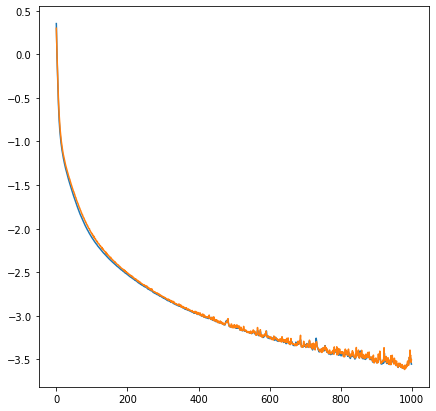

In [300]:
plt.figure(figsize=(7,7))
plt.plot(np.log(total_hist_loss)/np.log(10))
plt.plot(np.log(total_hist_valloss)/np.log(10))
plt.show()

In [288]:
labels = simplify_expressions(generate_stacked_polynomial_labels(5,2))


In [293]:
all_monomes = [f'{str(i[1])[:5]}*{i[0]}' for i in zip(labels,weights) if abs(i[1])>0.2]
pol = ''
for mon in all_monomes: 
    pol += mon + ' + '
print(pol[:-2])
print(simplify_expressions([pol[:-2]]))

-0.27*x0*x1 + 0.561*x0*x2 + -0.27*x0*x3 + 1.158*x0*x4 + 0.223*x1**2 + 0.242*x1*x2 + -0.50*x1*x3 + 0.587*x2*x3 + 0.291*x3**2 + 0.272*x0*x1 + -0.62*x0*x2 + -1.20*x0*x4 + -0.21*x0**2*x4 + 0.433*x0*x1*x3 + -0.52*x0*x1*x4 + -0.26*x0*x2*x3 + -0.20*x0*x3**2 + -0.31*x0*x3*x4 + 0.458*x0*x4**2 + -0.22*x1**2 + 0.207*x1*x2 + 0.567*x1*x3 + -0.28*x1*x4 + -0.53*x0*x1*x3 + 0.541*x0*x1*x4 + -0.32*x1**2*x3 + 0.294*x1*x2**2 + -0.62*x1*x2*x4 + -0.49*x1*x3**2 + 0.253*x1*x3*x4 + -0.58*x2*x3 + -0.30*x0**2*x2 + -0.28*x0*x2*x3 + -0.51*x2*x3*x4 + -0.24*x3**2 + 0.498*x0*x1*x3 + 0.326*x0*x2*x3 + -0.28*x0*x3**2 + 1.059*x0*x3*x4 + 0.327*x1**2*x3 + 0.502*x1*x2*x3 + 0.451*x1*x3**2 + 0.612*x2*x3*x4 + -0.51*x3**2*x4 + -0.21*x3*x4**2 + -1.11*x0*x3*x4 + -0.52*x0*x4**2 + 0.720*x1*x2*x4 + -0.50*x1*x3*x4 + 0.511*x3**2*x4 + 0.232*x3*x4**2 + -0.39*x0**2*x1*x4 + 0.449*x0**2*x3*x4 + 0.394*x0**2*x1*x4 + 0.372*x0*x1**2*x4 + 0.295*x0*x1*x3*x4 + -0.25*x0*x2**2*x4 + 0.426*x0*x2*x3*x4 + -0.44*x0**2*x3*x4 + -0.20*x0*x1*x3*x4 + -0.54*x

In [290]:
#-1.412*x0 + 1.411*x0*x3 + -1.413*x1*x2*x3 + 1.000*x1*x3*x4

In [291]:
print(2**.5)
print(3**.5)

1.4142135623730951
1.7320508075688772


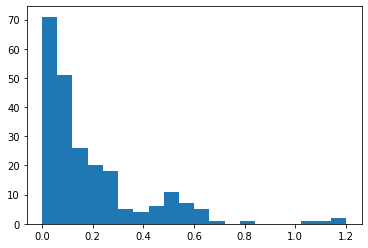

In [292]:
plt.figure()
plt.hist(abs(weights),bins=20)
plt.show()

In [82]:
x_5d[:,1]

array([ 1.5635933 , -0.02378543, -0.00402691, ...,  0.10895684,
       -0.34539515,  0.19530638], dtype=float32)

In [99]:
model_save = model 
history_save = [total_hist_loss,total_hist_valloss]

In [173]:
generate_stacked_polynomial_labels(5,2)

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0*x0',
 'x0*x1',
 'x0*x2',
 'x0*x3',
 'x0*x4',
 'x1*x1',
 'x1*x2',
 'x1*x3',
 'x1*x4',
 'x2*x2',
 'x2*x3',
 'x2*x4',
 'x3*x3',
 'x3*x4',
 'x4*x4',
 'x0*x0',
 'x0*x1',
 'x0*x2',
 'x0*x3',
 'x0*x4',
 'x0*x0*x0',
 'x0*x0*x1',
 'x0*x0*x2',
 'x0*x0*x3',
 'x0*x0*x4',
 'x0*x1*x1',
 'x0*x1*x2',
 'x0*x1*x3',
 'x0*x1*x4',
 'x0*x2*x2',
 'x0*x2*x3',
 'x0*x2*x4',
 'x0*x3*x3',
 'x0*x3*x4',
 'x0*x4*x4',
 'x1*x1',
 'x1*x2',
 'x1*x3',
 'x1*x4',
 'x1*x0*x0',
 'x1*x0*x1',
 'x1*x0*x2',
 'x1*x0*x3',
 'x1*x0*x4',
 'x1*x1*x1',
 'x1*x1*x2',
 'x1*x1*x3',
 'x1*x1*x4',
 'x1*x2*x2',
 'x1*x2*x3',
 'x1*x2*x4',
 'x1*x3*x3',
 'x1*x3*x4',
 'x1*x4*x4',
 'x2*x2',
 'x2*x3',
 'x2*x4',
 'x2*x0*x0',
 'x2*x0*x1',
 'x2*x0*x2',
 'x2*x0*x3',
 'x2*x0*x4',
 'x2*x1*x1',
 'x2*x1*x2',
 'x2*x1*x3',
 'x2*x1*x4',
 'x2*x2*x2',
 'x2*x2*x3',
 'x2*x2*x4',
 'x2*x3*x3',
 'x2*x3*x4',
 'x2*x4*x4',
 'x3*x3',
 'x3*x4',
 'x3*x0*x0',
 'x3*x0*x1',
 'x3*x0*x2',
 'x3*x0*x3',
 'x3*x0*x4',
 'x3*x1*x1',
 'x3*x1*x2',

In [250]:
def generate_stacked_polynomial_labels(initial_n_features, num_expansion_layers, term_prefix="x"):
    old_features = [term_prefix + str(i) for i in range(initial_n_features)]
    for layer in range(num_expansion_layers):
        input_dim = len(old_features)
        new_features = old_features
        for i in range(input_dim):
            for j in range(i,input_dim):
                new_features.append(old_features[i] + "*" + old_features[j])
        old_features = new_features
    return old_features

In [251]:
generate_stacked_polynomial_labels(5,2)

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0*x0',
 'x0*x1',
 'x0*x2',
 'x0*x3',
 'x0*x4',
 'x1*x1',
 'x1*x2',
 'x1*x3',
 'x1*x4',
 'x2*x2',
 'x2*x3',
 'x2*x4',
 'x3*x3',
 'x3*x4',
 'x4*x4',
 'x0*x0',
 'x0*x1',
 'x0*x2',
 'x0*x3',
 'x0*x4',
 'x0*x0*x0',
 'x0*x0*x1',
 'x0*x0*x2',
 'x0*x0*x3',
 'x0*x0*x4',
 'x0*x1*x1',
 'x0*x1*x2',
 'x0*x1*x3',
 'x0*x1*x4',
 'x0*x2*x2',
 'x0*x2*x3',
 'x0*x2*x4',
 'x0*x3*x3',
 'x0*x3*x4',
 'x0*x4*x4',
 'x1*x1',
 'x1*x2',
 'x1*x3',
 'x1*x4',
 'x1*x0*x0',
 'x1*x0*x1',
 'x1*x0*x2',
 'x1*x0*x3',
 'x1*x0*x4',
 'x1*x1*x1',
 'x1*x1*x2',
 'x1*x1*x3',
 'x1*x1*x4',
 'x1*x2*x2',
 'x1*x2*x3',
 'x1*x2*x4',
 'x1*x3*x3',
 'x1*x3*x4',
 'x1*x4*x4',
 'x2*x2',
 'x2*x3',
 'x2*x4',
 'x2*x0*x0',
 'x2*x0*x1',
 'x2*x0*x2',
 'x2*x0*x3',
 'x2*x0*x4',
 'x2*x1*x1',
 'x2*x1*x2',
 'x2*x1*x3',
 'x2*x1*x4',
 'x2*x2*x2',
 'x2*x2*x3',
 'x2*x2*x4',
 'x2*x3*x3',
 'x2*x3*x4',
 'x2*x4*x4',
 'x3*x3',
 'x3*x4',
 'x3*x0*x0',
 'x3*x0*x1',
 'x3*x0*x2',
 'x3*x0*x3',
 'x3*x0*x4',
 'x3*x1*x1',
 'x3*x1*x2',

In [252]:
len(generate_stacked_polynomial_labels(5,2))

230

In [301]:
def generate_polynomial_labels(n_original_features, term_prefix="x"):
    """
    Génère une liste de chaînes de caractères représentant les monômes
    dans l'ordre exact produit par l'architecture Keras parallèle:
    Deg1 + Deg2 (produits uniques de Deg1) + Deg3 (produits croisés Deg1*Deg2) + Deg4 (produits uniques de Deg2).

    Args:
        n_original_features (int): Le nombre de variables d'entrée initiales (ex: 5 pour x0 à x4).
        term_prefix (str, optional): Le préfixe à utiliser pour les variables. Defaults to "x".

    Returns:
        list: Une liste de chaînes de caractères représentant les monômes.
              Ex: ['x0', 'x1', 'x0*x0', 'x0*x1', 'x1*x1', 'x0*x0*x0', ...]
    """
    if n_original_features <= 0:
        return []

    # --- 1. Générer les labels de Degré 1 ---
    labels_deg1 = [f"{term_prefix}{i}" for i in range(n_original_features)]
    # print(f"Generated Deg1 Labels ({len(labels_deg1)}): {labels_deg1[:5]}...") # Debug

    # --- 2. Générer les labels de Degré 2 (Produits uniques de Deg1) ---
    #    Imite PolynomialExpansionLayerUniqueNoCopy(labels_deg1)
    labels_deg2 = []
    for i in range(len(labels_deg1)):
        for j in range(i, len(labels_deg1)):
            # Concaténer les labels avec '*'
            labels_deg2.append(f"{labels_deg1[i]}*{labels_deg1[j]}")
    # print(f"Generated Deg2 Labels ({len(labels_deg2)}): {labels_deg2[:5]}...") # Debug


    # --- 3. Générer les labels de Degré 3 (Produits croisés Deg1 * Deg2) ---
    #    Imite CrossProductLayer([labels_deg1, labels_deg2])
    #    L'ordre est important: itérer sur deg1 puis deg2
    labels_deg3 = []
    for label1 in labels_deg1:
        for label2 in labels_deg2:
             # Concaténer les labels avec '*'
            labels_deg3.append(f"{label1}*{label2}")
    # print(f"Generated Deg3 Labels ({len(labels_deg3)}): {labels_deg3[:5]}...") # Debug

    # --- 4. Générer les labels de Degré 4 (Produits uniques de Deg2) ---
    #    Imite PolynomialExpansionLayerUniqueNoCopy(labels_deg2)
    labels_deg4 = []
    for i in range(len(labels_deg2)):
        for j in range(i, len(labels_deg2)):
            # Concaténer les labels avec '*'
            labels_deg4.append(f"{labels_deg2[i]}*{labels_deg2[j]}")
    # print(f"Generated Deg4 Labels ({len(labels_deg4)}): {labels_deg4[:5]}...") # Debug


    # --- 5. Concaténer toutes les listes dans le bon ordre ---
    all_labels = labels_deg1 + labels_deg2 + labels_deg3 + labels_deg4

    # Calcul de la taille attendue (vérification)
    n_deg1 = n_original_features
    n_deg2 = n_deg1 * (n_deg1 + 1) // 2
    n_deg3 = n_deg1 * n_deg2
    n_deg4 = n_deg2 * (n_deg2 + 1) // 2
    expected_total_len = n_deg1 + n_deg2 + n_deg3 + n_deg4
    if len(all_labels) != expected_total_len:
        print(f"Attention : La longueur calculée ({len(all_labels)}) "
              f"ne correspond pas à la longueur attendue ({expected_total_len}) !")

    return all_labels

In [303]:
if __name__ == "__main__":
    num_vars = 2 # Exemple simple avec x0, x1
    monomial_labels = generate_polynomial_labels(num_vars)

    print(f"Nombre total de monômes générés pour {num_vars} variables: {len(monomial_labels)}")
    print("\nListe des monômes générés (dans l'ordre) :")
    for i, label in enumerate(monomial_labels):
        print(f"{i}: {label}")

    print("-" * 20)

    # Vérification avec le calcul manuel pour n=2:
    # Deg1: x0, x1 (2)
    # Deg2: x0*x0, x0*x1, x1*x1 (3)
    # Deg3: x0*(x0*x0), x0*(x0*x1), x0*(x1*x1), x1*(x0*x0), x1*(x0*x1), x1*(x1*x1) (2*3=6)
    # Deg4: (x0*x0)*(x0*x0), (x0*x0)*(x0*x1), (x0*x0)*(x1*x1), (x0*x1)*(x0*x1), (x0*x1)*(x1*x1), (x1*x1)*(x1*x1) (3*4/2=6)
    # Total: 2 + 3 + 6 + 6 = 17. Cela correspond.

    num_vars_5 = 5 # Exemple avec 5 variables
    monomial_labels_5 = generate_polynomial_labels(num_vars_5)
    print(f"\nNombre total de monômes générés pour {num_vars_5} variables: {len(monomial_labels_5)}")
    # Calcul attendu pour n=5:
    # n1 = 5
    # n2 = 5*6/2 = 15
    # n3 = 5 * 15 = 75
    # n4 = 15*16/2 = 120
    # Total = 5 + 15 + 75 + 120 = 215
    print(f"(Attendu: {5+15+75+120})")
    # print("\nPremiers et derniers monômes pour n=5:")
    # print(monomial_labels_5[:10])
    # print("...")
    # print(monomial_labels_5[-10:])

Nombre total de monômes générés pour 2 variables: 17

Liste des monômes générés (dans l'ordre) :
0: x0
1: x1
2: x0*x0
3: x0*x1
4: x1*x1
5: x0*x0*x0
6: x0*x0*x1
7: x0*x1*x1
8: x1*x0*x0
9: x1*x0*x1
10: x1*x1*x1
11: x0*x0*x0*x0
12: x0*x0*x0*x1
13: x0*x0*x1*x1
14: x0*x1*x0*x1
15: x0*x1*x1*x1
16: x1*x1*x1*x1
--------------------

Nombre total de monômes générés pour 5 variables: 215
(Attendu: 215)
